In [1]:
import atd2022
import torch
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sktime.performance_metrics.forecasting import (
    MeanAbsoluteScaledError,
    MeanSquaredError,
)
import my_mod as util
from models import CnnForecaster
from tools import dotdict

In [2]:
import torch
torch.cuda.is_available()

True

# Small Scale Test for GPU support

In [3]:
torch.cuda.set_device(2) 

In [4]:
args = dotdict()
args.epochs=40
args.lr=0.001
args.batch_size = 4
args.d_model = 2048

In [5]:
truth = atd2022.io.read_csv()

In [6]:
test = truth[["AA", "AC"]]

In [7]:
lispCNN = CnnForecaster(args)

In [33]:
lispCNN.fit(data=test)

0
epochs 1/40
train_loss 65.90036010742188
epochs 2/40
train_loss 62.43232345581055
epochs 3/40
train_loss 55.9425048828125
epochs 4/40
train_loss 52.730995178222656
epochs 5/40
train_loss 53.12398910522461
epochs 6/40
train_loss 50.668182373046875
epochs 7/40
train_loss 49.827857971191406
epochs 8/40
train_loss 47.613525390625
epochs 9/40
train_loss 48.447410583496094
epochs 10/40
train_loss 46.728668212890625
epochs 11/40
train_loss 48.4893684387207
epochs 12/40
train_loss 45.65201950073242
epochs 13/40
train_loss 45.070579528808594
epochs 14/40
train_loss 43.59865188598633
epochs 15/40
train_loss 45.353431701660156
epochs 16/40
train_loss 43.429569244384766
epochs 17/40
train_loss 41.22129440307617
epochs 18/40
train_loss 45.040626525878906
epochs 19/40
train_loss 40.31342315673828
epochs 20/40
train_loss 41.924095153808594
epochs 21/40
train_loss 39.536293029785156
epochs 22/40
train_loss 41.854888916015625
epochs 23/40
train_loss 39.0735969543457
epochs 24/40
train_loss 41.1960754

In [34]:
res=lispCNN.predict(test.tail(4).index)

In [35]:
res

AA                                                     \
                        1    2    3     4    5    6    7    8    9    10   11   
2018-01-15/2018-01-21  7.0  6.0  7.0  31.0  6.0 -0.0  1.0  1.0  1.0  1.0  0.0   
2018-01-22/2018-01-28  7.0  2.0  6.0  16.0  6.0 -0.0  1.0  1.0  0.0  0.0  2.0   
2018-01-29/2018-02-04  6.0  4.0  7.0  25.0  4.0  0.0  1.0  1.0  1.0  0.0  2.0   
2018-02-05/2018-02-11  5.0  4.0  6.0  26.0  3.0  1.0  1.0  1.0  1.0  0.0  2.0   

                                                                      AC  \
                        12   13   14   15   16   17   18   19   20    1    
2018-01-15/2018-01-21  1.0  0.0  0.0  0.0  0.0  2.0  1.0  2.0  0.0  25.0   
2018-01-22/2018-01-28  0.0  0.0  0.0  0.0  0.0  0.0  2.0  1.0  0.0  13.0   
2018-01-29/2018-02-04  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  11.0   
2018-02-05/2018-02-11  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   8.0   

                                                                             \
                         2     3     4     5    6    7    8    9    10   11   
2018-01-15/2018-01-21  10.0  18.0  72.0  11.0  3.0  5.0  7.0  3.0  3.0  7.0   
2018-01-22/2018-01-28   8.0  14.0  46.0   8.0  1.0  1.0  3.0  1.0  2.0  4.0   
2018-01-29/2018-02-04   7.0  10.0  53.0   8.0 -0.0  1.0  2.0  1.0  1.0  3.0   
2018-02-05/2018-02-11   4.0   7.0  27.0   4.0 -0.0  1.0  1.0  0.0  0.0  2.0   

                                                                    
                        12   13   14   15   16   17   18   19   20  
2018-01-15/2018-01-21  7.0  1.0  0.0  0.0  0.0  4.0  1.0  2.0  0.0  
2018-01-22/2018-01-28  1.0  0.0  0.0  0.0  0.0  1.0  2.0  2.0  0.0  
2018-01-29/2018-02-04  1.0  0.0  0.0  0.0  0.0 -0.0  2.0  2.0  0.0  
2018-02-05/2018-02-11  0.0  0.0  0.0  0.0  0.0 -0.0  2.0  1.0  0.0

# Full Scale Test

In [3]:
torch.cuda.set_device(2) 

In [9]:
args = dotdict()
args.epochs=45
args.lr=0.0008
args.batch_size = 90
args.d_model = 1024

In [10]:
lispCNN = CnnForecaster(args)

In [11]:
 # Load data
truth = atd2022.io.read_csv()

# Subset the data for the sake of making this fast.
# Remove if you want to run the example on the entire dataset.
truth = truth.head(108)

# Experiment Parameters
window = 100
num_predict = 4
gap = 0
slide = 1

# Create a dataset `Splitter` object for generating train/test splits
splitter = atd2022.backtest.Splitter(
    truth,
    window,
    num_predict,
    gap,
    slide,
    expanding=True,
) 

In [12]:
 # Populate a list of models that support the `atd2022.forecasters.Forecaster` protocol
# with which will we generate historical forecasts
models = [
    lispCNN,
    atd2022.forecasters.PredictMeanForecaster(),
    atd2022.forecasters.ExponentiallyWeightedMovingAverage(),
]

# Compute historical forecasts for all models
predictions = [
    atd2022.backtest.historical_forecast(model, splitter, verbose=True)
    for model in models
]

<models.CnnForecaster object at 0x7fec14e24e80>:   0%|          | 0/5 [00:00<?, ?it/s]

0
epochs 1/45
train_loss 66.68694305419922
epochs 2/45
train_loss 64.37385559082031
epochs 3/45
train_loss 54.993629455566406
epochs 4/45
train_loss 50.51884460449219
epochs 5/45
train_loss 47.673187255859375
epochs 6/45
train_loss 44.25173568725586
epochs 7/45
train_loss 41.25930404663086
epochs 8/45
train_loss 39.568153381347656
epochs 9/45
train_loss 38.16204071044922
epochs 10/45
train_loss 36.463539123535156
epochs 11/45
train_loss 35.23716735839844
epochs 12/45
train_loss 34.45821762084961
epochs 13/45
train_loss 33.604068756103516
epochs 14/45
train_loss 32.84862518310547
epochs 15/45
train_loss 32.347190856933594
epochs 16/45
train_loss 31.813817977905273
epochs 17/45
train_loss 31.155576705932617
epochs 18/45
train_loss 30.551809310913086
epochs 19/45
train_loss 29.97679328918457
epochs 20/45
train_loss 29.373624801635742
epochs 21/45
train_loss 28.841140747070312
epochs 22/45
train_loss 28.390663146972656
epochs 23/45
train_loss 27.954204559326172
epochs 24/45
train_loss 27.5

epochs 27/45
train_loss 2366.9765625
epochs 28/45
train_loss 2344.48046875
epochs 29/45
train_loss 2325.140869140625
epochs 30/45
train_loss 2308.368408203125
epochs 31/45
train_loss 2292.502197265625
epochs 32/45
train_loss 2275.2099609375
epochs 33/45
train_loss 2256.57568359375
epochs 34/45
train_loss 2237.14990234375
epochs 35/45
train_loss 2217.865234375
epochs 36/45
train_loss 2200.073974609375
epochs 37/45
train_loss 2183.369873046875
epochs 38/45
train_loss 2166.572509765625
epochs 39/45
train_loss 2149.541015625
epochs 40/45
train_loss 2132.218994140625
epochs 41/45
train_loss 2115.170166015625
epochs 42/45
train_loss 2098.943359375
epochs 43/45
train_loss 2083.185546875
epochs 44/45
train_loss 2068.151611328125
epochs 45/45
train_loss 2053.33154296875
5
epochs 1/45
train_loss 52015.546875
epochs 2/45
train_loss 32072.505859375
epochs 3/45
train_loss 23224.447265625
epochs 4/45
train_loss 14911.13671875
epochs 5/45
train_loss 8796.2451171875
epochs 6/45
train_loss 5774.9492187

epochs 6/45
train_loss 1019.1669921875
epochs 7/45
train_loss 872.33642578125
epochs 8/45
train_loss 824.07177734375
epochs 9/45
train_loss 807.1162109375
epochs 10/45
train_loss 808.9295654296875
epochs 11/45
train_loss 825.2249755859375
epochs 12/45
train_loss 817.8580322265625
epochs 13/45
train_loss 778.4434814453125
epochs 14/45
train_loss 732.7208251953125
epochs 15/45
train_loss 698.3713989257812
epochs 16/45
train_loss 675.5134887695312
epochs 17/45
train_loss 664.338134765625
epochs 18/45
train_loss 662.94189453125
epochs 19/45
train_loss 662.5841064453125
epochs 20/45
train_loss 657.7898559570312
epochs 21/45
train_loss 649.6331787109375
epochs 22/45
train_loss 639.8574829101562
epochs 23/45
train_loss 629.0757446289062
epochs 24/45
train_loss 619.7898559570312
epochs 25/45
train_loss 613.0716552734375
epochs 26/45
train_loss 607.8658447265625
epochs 27/45
train_loss 603.185302734375
epochs 28/45
train_loss 598.3953857421875
epochs 29/45
train_loss 592.7797241210938
epochs 30

epochs 34/45
train_loss 24635.8046875
epochs 35/45
train_loss 24002.01953125
epochs 36/45
train_loss 23377.404296875
epochs 37/45
train_loss 22759.30859375
epochs 38/45
train_loss 22175.171875
epochs 39/45
train_loss 21591.98046875
epochs 40/45
train_loss 20997.880859375
epochs 41/45
train_loss 20406.0703125
epochs 42/45
train_loss 19825.810546875
epochs 43/45
train_loss 19249.25
epochs 44/45
train_loss 18692.517578125
epochs 45/45
train_loss 18136.296875
14
epochs 1/45
train_loss 30.189960479736328
epochs 2/45
train_loss 24.82061767578125
epochs 3/45
train_loss 21.785337448120117
epochs 4/45
train_loss 18.144813537597656
epochs 5/45
train_loss 15.525594711303711
epochs 6/45
train_loss 13.659711837768555
epochs 7/45
train_loss 11.980146408081055
epochs 8/45
train_loss 10.699151039123535
epochs 9/45
train_loss 10.088550567626953
epochs 10/45
train_loss 9.754558563232422
epochs 11/45
train_loss 9.45024585723877
epochs 12/45
train_loss 9.307074546813965
epochs 13/45
train_loss 9.209650039

epochs 7/45
train_loss 538.959716796875
epochs 8/45
train_loss 582.3319091796875
epochs 9/45
train_loss 637.98583984375
epochs 10/45
train_loss 637.3270263671875
epochs 11/45
train_loss 592.0355224609375
epochs 12/45
train_loss 540.8413696289062
epochs 13/45
train_loss 501.18017578125
epochs 14/45
train_loss 476.615234375
epochs 15/45
train_loss 468.899169921875
epochs 16/45
train_loss 473.8892822265625
epochs 17/45
train_loss 479.53497314453125
epochs 18/45
train_loss 476.92462158203125
epochs 19/45
train_loss 467.7278137207031
epochs 20/45
train_loss 457.3463134765625
epochs 21/45
train_loss 448.27740478515625
epochs 22/45
train_loss 441.66229248046875
epochs 23/45
train_loss 438.48565673828125
epochs 24/45
train_loss 437.92376708984375
epochs 25/45
train_loss 437.62030029296875
epochs 26/45
train_loss 435.9161682128906
epochs 27/45
train_loss 433.0888671875
epochs 28/45
train_loss 429.744140625
epochs 29/45
train_loss 426.2755126953125
epochs 30/45
train_loss 423.34893798828125
epoc

epochs 31/45
train_loss 14570.6181640625
epochs 32/45
train_loss 14488.490234375
epochs 33/45
train_loss 14407.7529296875
epochs 34/45
train_loss 14325.279296875
epochs 35/45
train_loss 14232.958984375
epochs 36/45
train_loss 14131.556640625
epochs 37/45
train_loss 14037.947265625
epochs 38/45
train_loss 13956.3408203125
epochs 39/45
train_loss 13876.005859375
epochs 40/45
train_loss 13790.294921875
epochs 41/45
train_loss 13699.0712890625
epochs 42/45
train_loss 13602.8125
epochs 43/45
train_loss 13509.65234375
epochs 44/45
train_loss 13422.7685546875
epochs 45/45
train_loss 13339.6796875
23
epochs 1/45
train_loss 3080.25
epochs 2/45
train_loss 2360.2900390625
epochs 3/45
train_loss 1800.304443359375
epochs 4/45
train_loss 1366.025634765625
epochs 5/45
train_loss 1060.95166015625
epochs 6/45
train_loss 797.96240234375
epochs 7/45
train_loss 621.7744750976562
epochs 8/45
train_loss 538.95849609375
epochs 9/45
train_loss 506.55535888671875
epochs 10/45
train_loss 513.701416015625
epochs

epochs 8/45
train_loss 874.8123779296875
epochs 9/45
train_loss 850.180908203125
epochs 10/45
train_loss 849.0587158203125
epochs 11/45
train_loss 838.942138671875
epochs 12/45
train_loss 822.6292724609375
epochs 13/45
train_loss 811.0044555664062
epochs 14/45
train_loss 799.7910766601562
epochs 15/45
train_loss 783.9337158203125
epochs 16/45
train_loss 767.49365234375
epochs 17/45
train_loss 755.1825561523438
epochs 18/45
train_loss 745.8485107421875
epochs 19/45
train_loss 736.1630859375
epochs 20/45
train_loss 726.2548828125
epochs 21/45
train_loss 717.2349243164062
epochs 22/45
train_loss 708.855712890625
epochs 23/45
train_loss 699.43994140625
epochs 24/45
train_loss 690.12890625
epochs 25/45
train_loss 681.6689453125
epochs 26/45
train_loss 673.2772827148438
epochs 27/45
train_loss 664.2874755859375
epochs 28/45
train_loss 655.1560668945312
epochs 29/45
train_loss 646.7532348632812
epochs 30/45
train_loss 638.292236328125
epochs 31/45
train_loss 629.5430908203125
epochs 32/45
tra

epochs 28/45
train_loss 6845.1865234375
epochs 29/45
train_loss 6782.8603515625
epochs 30/45
train_loss 6729.697265625
epochs 31/45
train_loss 6690.74169921875
epochs 32/45
train_loss 6664.29541015625
epochs 33/45
train_loss 6640.525390625
epochs 34/45
train_loss 6612.33251953125
epochs 35/45
train_loss 6581.01806640625
epochs 36/45
train_loss 6549.77099609375
epochs 37/45
train_loss 6519.1015625
epochs 38/45
train_loss 6488.57763671875
epochs 39/45
train_loss 6458.61474609375
epochs 40/45
train_loss 6429.021484375
epochs 41/45
train_loss 6399.66015625
epochs 42/45
train_loss 6370.3427734375
epochs 43/45
train_loss 6341.87841796875
epochs 44/45
train_loss 6314.16748046875
epochs 45/45
train_loss 6286.404296875
32
epochs 1/45
train_loss 2545.801513671875
epochs 2/45
train_loss 1932.94921875
epochs 3/45
train_loss 1524.975830078125
epochs 4/45
train_loss 1260.9697265625
epochs 5/45
train_loss 1051.4896240234375
epochs 6/45
train_loss 918.2708740234375
epochs 7/45
train_loss 833.475097656

36
epochs 1/45
train_loss 9332.15234375
epochs 2/45
train_loss 6685.0478515625
epochs 3/45
train_loss 5351.177734375
epochs 4/45
train_loss 4407.2138671875
epochs 5/45
train_loss 4212.5224609375
epochs 6/45
train_loss 4141.6884765625
epochs 7/45
train_loss 4028.85498046875
epochs 8/45
train_loss 3899.84765625
epochs 9/45
train_loss 3748.5390625
epochs 10/45
train_loss 3588.243896484375
epochs 11/45
train_loss 3467.4677734375
epochs 12/45
train_loss 3390.41552734375
epochs 13/45
train_loss 3319.76318359375
epochs 14/45
train_loss 3233.976318359375
epochs 15/45
train_loss 3141.777587890625
epochs 16/45
train_loss 3053.0458984375
epochs 17/45
train_loss 2968.84228515625
epochs 18/45
train_loss 2892.658447265625
epochs 19/45
train_loss 2825.797119140625
epochs 20/45
train_loss 2760.7685546875
epochs 21/45
train_loss 2691.91357421875
epochs 22/45
train_loss 2621.4150390625
epochs 23/45
train_loss 2553.35009765625
epochs 24/45
train_loss 2487.89599609375
epochs 25/45
train_loss 2424.96191406

epochs 29/45
train_loss 14469.0166015625
epochs 30/45
train_loss 14410.17578125
epochs 31/45
train_loss 14363.794921875
epochs 32/45
train_loss 14318.318359375
epochs 33/45
train_loss 14268.3662109375
epochs 34/45
train_loss 14209.0
epochs 35/45
train_loss 14147.3046875
epochs 36/45
train_loss 14092.833984375
epochs 37/45
train_loss 14042.818359375
epochs 38/45
train_loss 13994.3173828125
epochs 39/45
train_loss 13946.736328125
epochs 40/45
train_loss 13897.84375
epochs 41/45
train_loss 13848.0556640625
epochs 42/45
train_loss 13800.4755859375
epochs 43/45
train_loss 13755.8671875
epochs 44/45
train_loss 13714.9931640625
epochs 45/45
train_loss 13677.162109375
41
epochs 1/45
train_loss 2623.3759765625
epochs 2/45
train_loss 1948.64208984375
epochs 3/45
train_loss 1373.99169921875
epochs 4/45
train_loss 1049.3934326171875
epochs 5/45
train_loss 880.48779296875
epochs 6/45
train_loss 774.8800048828125
epochs 7/45
train_loss 785.2581787109375
epochs 8/45
train_loss 814.155029296875
epochs

epochs 10/45
train_loss 152.26925659179688
epochs 11/45
train_loss 138.80355834960938
epochs 12/45
train_loss 129.06919860839844
epochs 13/45
train_loss 124.78878784179688
epochs 14/45
train_loss 124.41020965576172
epochs 15/45
train_loss 123.9456558227539
epochs 16/45
train_loss 121.49415588378906
epochs 17/45
train_loss 117.81019592285156
epochs 18/45
train_loss 113.669921875
epochs 19/45
train_loss 109.89534759521484
epochs 20/45
train_loss 107.31501007080078
epochs 21/45
train_loss 105.5001220703125
epochs 22/45
train_loss 103.70843505859375
epochs 23/45
train_loss 101.72794342041016
epochs 24/45
train_loss 99.40074157714844
epochs 25/45
train_loss 96.95921325683594
epochs 26/45
train_loss 94.74292755126953
epochs 27/45
train_loss 92.70675659179688
epochs 28/45
train_loss 90.76123046875
epochs 29/45
train_loss 88.79459381103516
epochs 30/45
train_loss 86.73551940917969
epochs 31/45
train_loss 84.70230102539062
epochs 32/45
train_loss 82.72764587402344
epochs 33/45
train_loss 80.822

epochs 28/45
train_loss 507.4379577636719
epochs 29/45
train_loss 504.6410217285156
epochs 30/45
train_loss 502.27093505859375
epochs 31/45
train_loss 499.7850036621094
epochs 32/45
train_loss 497.1536865234375
epochs 33/45
train_loss 494.6017150878906
epochs 34/45
train_loss 492.1596374511719
epochs 35/45
train_loss 489.78997802734375
epochs 36/45
train_loss 487.55694580078125
epochs 37/45
train_loss 485.49285888671875
epochs 38/45
train_loss 483.493896484375
epochs 39/45
train_loss 481.4305419921875
epochs 40/45
train_loss 479.3292236328125
epochs 41/45
train_loss 477.28582763671875
epochs 42/45
train_loss 475.3277282714844
epochs 43/45
train_loss 473.39825439453125
epochs 44/45
train_loss 471.5074462890625
epochs 45/45
train_loss 469.6894836425781
50
epochs 1/45
train_loss 0.06478389352560043
epochs 2/45
train_loss 0.01039375551044941
epochs 3/45
train_loss 0.025335514917969704
epochs 4/45
train_loss 0.016959190368652344
epochs 5/45
train_loss 0.004818643443286419
epochs 6/45
train_

54
epochs 1/45
train_loss 38.286598205566406
epochs 2/45
train_loss 33.32332229614258
epochs 3/45
train_loss 29.356056213378906
epochs 4/45
train_loss 26.48906707763672
epochs 5/45
train_loss 24.68431282043457
epochs 6/45
train_loss 23.0551815032959
epochs 7/45
train_loss 22.05696678161621
epochs 8/45
train_loss 21.69504737854004
epochs 9/45
train_loss 21.321392059326172
epochs 10/45
train_loss 20.983612060546875
epochs 11/45
train_loss 20.672042846679688
epochs 12/45
train_loss 20.217082977294922
epochs 13/45
train_loss 19.788959503173828
epochs 14/45
train_loss 19.41671371459961
epochs 15/45
train_loss 19.023170471191406
epochs 16/45
train_loss 18.680551528930664
epochs 17/45
train_loss 18.364837646484375
epochs 18/45
train_loss 18.023948669433594
epochs 19/45
train_loss 17.706851959228516
epochs 20/45
train_loss 17.387388229370117
epochs 21/45
train_loss 17.048288345336914
epochs 22/45
train_loss 16.69747543334961
epochs 23/45
train_loss 16.332582473754883
epochs 24/45
train_loss 15

epochs 19/45
train_loss 788.422119140625
epochs 20/45
train_loss 778.0823364257812
epochs 21/45
train_loss 765.366455078125
epochs 22/45
train_loss 751.180419921875
epochs 23/45
train_loss 735.8405151367188
epochs 24/45
train_loss 721.37158203125
epochs 25/45
train_loss 708.8338623046875
epochs 26/45
train_loss 698.2103271484375
epochs 27/45
train_loss 689.740478515625
epochs 28/45
train_loss 681.0817260742188
epochs 29/45
train_loss 671.3531494140625
epochs 30/45
train_loss 661.0826416015625
epochs 31/45
train_loss 651.7449951171875
epochs 32/45
train_loss 642.89501953125
epochs 33/45
train_loss 634.17626953125
epochs 34/45
train_loss 625.4984741210938
epochs 35/45
train_loss 617.2149047851562
epochs 36/45
train_loss 608.9420776367188
epochs 37/45
train_loss 600.0496215820312
epochs 38/45
train_loss 591.8391723632812
epochs 39/45
train_loss 584.3483276367188
epochs 40/45
train_loss 576.7828979492188
epochs 41/45
train_loss 569.09521484375
epochs 42/45
train_loss 561.6466674804688
epoc

epochs 35/45
train_loss 3104.129638671875
epochs 36/45
train_loss 3003.154296875
epochs 37/45
train_loss 2903.93017578125
epochs 38/45
train_loss 2806.1064453125
epochs 39/45
train_loss 2710.8486328125
epochs 40/45
train_loss 2616.872314453125
epochs 41/45
train_loss 2524.1640625
epochs 42/45
train_loss 2435.4931640625
epochs 43/45
train_loss 2346.787109375
epochs 44/45
train_loss 2260.8173828125
epochs 45/45
train_loss 2178.126953125
63
epochs 1/45
train_loss 764782.9375
epochs 2/45
train_loss 527895.5
epochs 3/45
train_loss 411001.25
epochs 4/45
train_loss 297748.0
epochs 5/45
train_loss 242098.3125
epochs 6/45
train_loss 221275.125
epochs 7/45
train_loss 212324.46875
epochs 8/45
train_loss 212738.0625
epochs 9/45
train_loss 217257.15625
epochs 10/45
train_loss 215299.640625
epochs 11/45
train_loss 206539.6875
epochs 12/45
train_loss 197792.65625
epochs 13/45
train_loss 192270.078125
epochs 14/45
train_loss 188534.921875
epochs 15/45
train_loss 185232.921875
epochs 16/45
train_loss 1

epochs 16/45
train_loss 745.0786743164062
epochs 17/45
train_loss 720.4385986328125
epochs 18/45
train_loss 697.54931640625
epochs 19/45
train_loss 674.3740234375
epochs 20/45
train_loss 652.1356201171875
epochs 21/45
train_loss 629.6434936523438
epochs 22/45
train_loss 606.7825927734375
epochs 23/45
train_loss 583.4151611328125
epochs 24/45
train_loss 561.8863525390625
epochs 25/45
train_loss 541.755126953125
epochs 26/45
train_loss 521.7914428710938
epochs 27/45
train_loss 501.74664306640625
epochs 28/45
train_loss 482.8226318359375
epochs 29/45
train_loss 464.92596435546875
epochs 30/45
train_loss 447.1514892578125
epochs 31/45
train_loss 430.89654541015625
epochs 32/45
train_loss 415.6098937988281
epochs 33/45
train_loss 400.53778076171875
epochs 34/45
train_loss 386.39251708984375
epochs 35/45
train_loss 373.1812744140625
epochs 36/45
train_loss 360.473876953125
epochs 37/45
train_loss 348.2291259765625
epochs 38/45
train_loss 337.0284423828125
epochs 39/45
train_loss 326.49884033

epochs 32/45
train_loss 1366.422119140625
epochs 33/45
train_loss 1358.4432373046875
epochs 34/45
train_loss 1350.327392578125
epochs 35/45
train_loss 1342.06298828125
epochs 36/45
train_loss 1333.5159912109375
epochs 37/45
train_loss 1325.4637451171875
epochs 38/45
train_loss 1318.2802734375
epochs 39/45
train_loss 1311.52587890625
epochs 40/45
train_loss 1304.9564208984375
epochs 41/45
train_loss 1298.3822021484375
epochs 42/45
train_loss 1291.6103515625
epochs 43/45
train_loss 1284.73486328125
epochs 44/45
train_loss 1278.01611328125
epochs 45/45
train_loss 1271.32373046875
72
epochs 1/45
train_loss 5.76142692565918
epochs 2/45
train_loss 4.947075843811035
epochs 3/45
train_loss 4.280594825744629
epochs 4/45
train_loss 3.8834338188171387
epochs 5/45
train_loss 3.676243543624878
epochs 6/45
train_loss 3.509219169616699
epochs 7/45
train_loss 3.427664041519165
epochs 8/45
train_loss 3.4038567543029785
epochs 9/45
train_loss 3.3561906814575195
epochs 10/45
train_loss 3.3069570064544678

epochs 3/45
train_loss 438.78143310546875
epochs 4/45
train_loss 304.6860046386719
epochs 5/45
train_loss 203.0144500732422
epochs 6/45
train_loss 149.67578125
epochs 7/45
train_loss 127.56332397460938
epochs 8/45
train_loss 122.27359771728516
epochs 9/45
train_loss 125.60102844238281
epochs 10/45
train_loss 130.176025390625
epochs 11/45
train_loss 130.2713623046875
epochs 12/45
train_loss 125.42301940917969
epochs 13/45
train_loss 118.80497741699219
epochs 14/45
train_loss 113.41932678222656
epochs 15/45
train_loss 110.21247863769531
epochs 16/45
train_loss 108.5507583618164
epochs 17/45
train_loss 107.4865493774414
epochs 18/45
train_loss 106.55321502685547
epochs 19/45
train_loss 105.67526245117188
epochs 20/45
train_loss 104.8395767211914
epochs 21/45
train_loss 103.98460388183594
epochs 22/45
train_loss 103.12152862548828
epochs 23/45
train_loss 102.36296081542969
epochs 24/45
train_loss 101.7691650390625
epochs 25/45
train_loss 101.27774810791016
epochs 26/45
train_loss 100.79999

epochs 19/45
train_loss 1381623.0
epochs 20/45
train_loss 1367420.375
epochs 21/45
train_loss 1351394.875
epochs 22/45
train_loss 1335681.5
epochs 23/45
train_loss 1321552.25
epochs 24/45
train_loss 1307981.75
epochs 25/45
train_loss 1294429.0
epochs 26/45
train_loss 1281338.125
epochs 27/45
train_loss 1268216.75
epochs 28/45
train_loss 1254674.5
epochs 29/45
train_loss 1241355.875
epochs 30/45
train_loss 1228086.0
epochs 31/45
train_loss 1214871.0
epochs 32/45
train_loss 1201494.625
epochs 33/45
train_loss 1188210.375
epochs 34/45
train_loss 1175072.875
epochs 35/45
train_loss 1162069.375
epochs 36/45
train_loss 1149182.5
epochs 37/45
train_loss 1136147.625
epochs 38/45
train_loss 1122844.75
epochs 39/45
train_loss 1109456.125
epochs 40/45
train_loss 1096146.5
epochs 41/45
train_loss 1082904.375
epochs 42/45
train_loss 1069808.375
epochs 43/45
train_loss 1056753.875
epochs 44/45
train_loss 1043576.125
epochs 45/45
train_loss 1030141.75
81
epochs 1/45
train_loss 4121.884765625
epochs 2

epochs 43/45
train_loss 5013.1435546875
epochs 44/45
train_loss 5003.4814453125
epochs 45/45
train_loss 4994.8017578125
85
epochs 1/45
train_loss 226.93948364257812
epochs 2/45
train_loss 153.47113037109375
epochs 3/45
train_loss 101.105224609375
epochs 4/45
train_loss 70.24141693115234
epochs 5/45
train_loss 55.393898010253906
epochs 6/45
train_loss 50.85144805908203
epochs 7/45
train_loss 53.65252685546875
epochs 8/45
train_loss 55.65747833251953
epochs 9/45
train_loss 54.712425231933594
epochs 10/45
train_loss 51.647056579589844
epochs 11/45
train_loss 47.770389556884766
epochs 12/45
train_loss 45.0156364440918
epochs 13/45
train_loss 43.73725128173828
epochs 14/45
train_loss 43.17163848876953
epochs 15/45
train_loss 42.803184509277344
epochs 16/45
train_loss 42.391876220703125
epochs 17/45
train_loss 41.685462951660156
epochs 18/45
train_loss 40.81312561035156
epochs 19/45
train_loss 40.02330780029297
epochs 20/45
train_loss 39.35790252685547
epochs 21/45
train_loss 38.772758483886

epochs 16/45
train_loss 70084.21875
epochs 17/45
train_loss 65658.3125
epochs 18/45
train_loss 65574.9375
epochs 19/45
train_loss 67868.515625
epochs 20/45
train_loss 70228.0078125
epochs 21/45
train_loss 71037.3671875
epochs 22/45
train_loss 70265.8046875
epochs 23/45
train_loss 68514.3125
epochs 24/45
train_loss 66366.359375
epochs 25/45
train_loss 64501.84375
epochs 26/45
train_loss 63351.0078125
epochs 27/45
train_loss 62919.8984375
epochs 28/45
train_loss 63073.375
epochs 29/45
train_loss 63449.8515625
epochs 30/45
train_loss 63573.72265625
epochs 31/45
train_loss 63300.2109375
epochs 32/45
train_loss 62772.01953125
epochs 33/45
train_loss 62223.1796875
epochs 34/45
train_loss 61865.828125
epochs 35/45
train_loss 61727.19921875
epochs 36/45
train_loss 61703.515625
epochs 37/45
train_loss 61695.97265625
epochs 38/45
train_loss 61630.796875
epochs 39/45
train_loss 61499.5078125
epochs 40/45
train_loss 61332.1875
epochs 41/45
train_loss 61153.953125
epochs 42/45
train_loss 60994.3359

epochs 34/45
train_loss 29415.453125
epochs 35/45
train_loss 29079.62890625
epochs 36/45
train_loss 28764.529296875
epochs 37/45
train_loss 28453.58203125
epochs 38/45
train_loss 28151.01171875
epochs 39/45
train_loss 27856.95703125
epochs 40/45
train_loss 27573.484375
epochs 41/45
train_loss 27304.681640625
epochs 42/45
train_loss 27046.505859375
epochs 43/45
train_loss 26795.494140625
epochs 44/45
train_loss 26555.74609375
epochs 45/45
train_loss 26323.861328125
94
epochs 1/45
train_loss 4250.83984375
epochs 2/45
train_loss 3072.81005859375
epochs 3/45
train_loss 2312.843017578125
epochs 4/45
train_loss 1683.622314453125
epochs 5/45
train_loss 1435.0531005859375
epochs 6/45
train_loss 1353.63818359375
epochs 7/45
train_loss 1352.2474365234375
epochs 8/45
train_loss 1397.603759765625
epochs 9/45
train_loss 1399.700439453125
epochs 10/45
train_loss 1336.419677734375
epochs 11/45
train_loss 1263.361328125
epochs 12/45
train_loss 1213.6182861328125
epochs 13/45
train_loss 1184.5300292968

epochs 11/45
train_loss 1338.90771484375
epochs 12/45
train_loss 1297.179931640625
epochs 13/45
train_loss 1210.416015625
epochs 14/45
train_loss 1129.6636962890625
epochs 15/45
train_loss 1073.533447265625
epochs 16/45
train_loss 1043.5482177734375
epochs 17/45
train_loss 1035.4716796875
epochs 18/45
train_loss 1036.1929931640625
epochs 19/45
train_loss 1033.5556640625
epochs 20/45
train_loss 1025.506591796875
epochs 21/45
train_loss 1012.6871337890625
epochs 22/45
train_loss 995.7313232421875
epochs 23/45
train_loss 978.4669799804688
epochs 24/45
train_loss 964.0841064453125
epochs 25/45
train_loss 952.5477294921875
epochs 26/45
train_loss 943.1734619140625
epochs 27/45
train_loss 935.3888549804688
epochs 28/45
train_loss 927.4933471679688
epochs 29/45
train_loss 919.0712890625
epochs 30/45
train_loss 910.5096435546875
epochs 31/45
train_loss 902.4086303710938
epochs 32/45
train_loss 895.33935546875
epochs 33/45
train_loss 889.4409790039062
epochs 34/45
train_loss 884.0836181640625
e

epochs 27/45
train_loss 1.724961757659912
epochs 28/45
train_loss 1.7136785984039307
epochs 29/45
train_loss 1.7017054557800293
epochs 30/45
train_loss 1.6893229484558105
epochs 31/45
train_loss 1.6768267154693604
epochs 32/45
train_loss 1.66398024559021
epochs 33/45
train_loss 1.649777889251709
epochs 34/45
train_loss 1.6358534097671509
epochs 35/45
train_loss 1.6222662925720215
epochs 36/45
train_loss 1.6068669557571411
epochs 37/45
train_loss 1.591625690460205
epochs 38/45
train_loss 1.5759166479110718
epochs 39/45
train_loss 1.559402585029602
epochs 40/45
train_loss 1.542514681816101
epochs 41/45
train_loss 1.525707483291626
epochs 42/45
train_loss 1.5079295635223389
epochs 43/45
train_loss 1.490164041519165
epochs 44/45
train_loss 1.4712952375411987
epochs 45/45
train_loss 1.4525554180145264
103
epochs 1/45
train_loss 13481.400390625
epochs 2/45
train_loss 10011.859375
epochs 3/45
train_loss 7617.85400390625
epochs 4/45
train_loss 6338.86572265625
epochs 5/45
train_loss 5332.71679

epochs 8/45
train_loss 2.965419054031372
epochs 9/45
train_loss 2.923126697540283
epochs 10/45
train_loss 2.8706722259521484
epochs 11/45
train_loss 2.807614803314209
epochs 12/45
train_loss 2.765162467956543
epochs 13/45
train_loss 2.7080554962158203
epochs 14/45
train_loss 2.657954216003418
epochs 15/45
train_loss 2.617673635482788
epochs 16/45
train_loss 2.572601556777954
epochs 17/45
train_loss 2.5341601371765137
epochs 18/45
train_loss 2.4972751140594482
epochs 19/45
train_loss 2.458601713180542
epochs 20/45
train_loss 2.4261529445648193
epochs 21/45
train_loss 2.391847610473633
epochs 22/45
train_loss 2.359595537185669
epochs 23/45
train_loss 2.3269429206848145
epochs 24/45
train_loss 2.296222448348999
epochs 25/45
train_loss 2.2669379711151123
epochs 26/45
train_loss 2.2374210357666016
epochs 27/45
train_loss 2.209185838699341
epochs 28/45
train_loss 2.1819632053375244
epochs 29/45
train_loss 2.1560263633728027
epochs 30/45
train_loss 2.130260705947876
epochs 31/45
train_loss 2.

epochs 32/45
train_loss 133851.90625
epochs 33/45
train_loss 133198.859375
epochs 34/45
train_loss 132519.0
epochs 35/45
train_loss 131965.765625
epochs 36/45
train_loss 131601.0
epochs 37/45
train_loss 131300.125
epochs 38/45
train_loss 130965.7890625
epochs 39/45
train_loss 130574.890625
epochs 40/45
train_loss 130140.375
epochs 41/45
train_loss 129722.015625
epochs 42/45
train_loss 129334.90625
epochs 43/45
train_loss 128956.6796875
epochs 44/45
train_loss 128570.140625
epochs 45/45
train_loss 128175.609375
112
epochs 1/45
train_loss 3852064.0
epochs 2/45
train_loss 2602842.0
epochs 3/45
train_loss 1725655.0
epochs 4/45
train_loss 1134331.0
epochs 5/45
train_loss 839977.0
epochs 6/45
train_loss 630059.9375
epochs 7/45
train_loss 519897.1875
epochs 8/45
train_loss 499142.40625
epochs 9/45
train_loss 489285.375
epochs 10/45
train_loss 485869.1875
epochs 11/45
train_loss 488943.0
epochs 12/45
train_loss 476595.125
epochs 13/45
train_loss 448934.96875
epochs 14/45
train_loss 425056.6875

epochs 25/45
train_loss 46944.59375
epochs 26/45
train_loss 46851.60546875
epochs 27/45
train_loss 46357.72265625
epochs 28/45
train_loss 45733.41796875
epochs 29/45
train_loss 45285.72265625
epochs 30/45
train_loss 45103.8125
epochs 31/45
train_loss 45086.9453125
epochs 32/45
train_loss 45094.40234375
epochs 33/45
train_loss 45024.5625
epochs 34/45
train_loss 44860.78515625
epochs 35/45
train_loss 44650.16015625
epochs 36/45
train_loss 44469.140625
epochs 37/45
train_loss 44352.51171875
epochs 38/45
train_loss 44288.50390625
epochs 39/45
train_loss 44240.30859375
epochs 40/45
train_loss 44173.23046875
epochs 41/45
train_loss 44078.265625
epochs 42/45
train_loss 43970.12109375
epochs 43/45
train_loss 43870.7890625
epochs 44/45
train_loss 43785.84375
epochs 45/45
train_loss 43712.59375
117
epochs 1/45
train_loss 6965.599609375
epochs 2/45
train_loss 4434.81103515625
epochs 3/45
train_loss 3031.49169921875
epochs 4/45
train_loss 1782.6064453125
epochs 5/45
train_loss 1119.3193359375
epoc

epochs 45/45
train_loss 18814.818359375
121
epochs 1/45
train_loss 0.06645643711090088
epochs 2/45
train_loss 0.038804493844509125
epochs 3/45
train_loss 0.03655748441815376
epochs 4/45
train_loss 0.038909368216991425
epochs 5/45
train_loss 0.03486896678805351
epochs 6/45
train_loss 0.031726352870464325
epochs 7/45
train_loss 0.031076129525899887
epochs 8/45
train_loss 0.03176641836762428
epochs 9/45
train_loss 0.03218912333250046
epochs 10/45
train_loss 0.03175566345453262
epochs 11/45
train_loss 0.031077392399311066
epochs 12/45
train_loss 0.0307447612285614
epochs 13/45
train_loss 0.03078002855181694
epochs 14/45
train_loss 0.030914735049009323
epochs 15/45
train_loss 0.030949346721172333
epochs 16/45
train_loss 0.03084605745971203
epochs 17/45
train_loss 0.030685391277074814
epochs 18/45
train_loss 0.03057350218296051
epochs 19/45
train_loss 0.030553951859474182
epochs 20/45
train_loss 0.030589774250984192
epochs 21/45
train_loss 0.03060593083500862
epochs 22/45
train_loss 0.030569

epochs 22/45
train_loss 0.006382628343999386
epochs 23/45
train_loss 0.006396625190973282
epochs 24/45
train_loss 0.006387453991919756
epochs 25/45
train_loss 0.006371227093040943
epochs 26/45
train_loss 0.006366620771586895
epochs 27/45
train_loss 0.006370036397129297
epochs 28/45
train_loss 0.0063685886561870575
epochs 29/45
train_loss 0.0063608610071241856
epochs 30/45
train_loss 0.006355794612318277
epochs 31/45
train_loss 0.006357723381370306
epochs 32/45
train_loss 0.006361610721796751
epochs 33/45
train_loss 0.006361984182149172
epochs 34/45
train_loss 0.006359865888953209
epochs 35/45
train_loss 0.006358821410685778
epochs 36/45
train_loss 0.006359050050377846
epochs 37/45
train_loss 0.0063584232702851295
epochs 38/45
train_loss 0.006356734316796064
epochs 39/45
train_loss 0.006355809513479471
epochs 40/45
train_loss 0.006356367375701666
epochs 41/45
train_loss 0.006357207894325256
epochs 42/45
train_loss 0.00635731965303421
epochs 43/45
train_loss 0.006357018370181322
epochs 4

epochs 40/45
train_loss 2537.244140625
epochs 41/45
train_loss 2524.120849609375
epochs 42/45
train_loss 2511.013916015625
epochs 43/45
train_loss 2498.080078125
epochs 44/45
train_loss 2485.55224609375
epochs 45/45
train_loss 2473.378662109375
130
epochs 1/45
train_loss 1692.8485107421875
epochs 2/45
train_loss 1208.133056640625
epochs 3/45
train_loss 951.0211791992188
epochs 4/45
train_loss 695.0731201171875
epochs 5/45
train_loss 543.5745239257812
epochs 6/45
train_loss 480.91204833984375
epochs 7/45
train_loss 451.3876647949219
epochs 8/45
train_loss 437.81707763671875
epochs 9/45
train_loss 431.67401123046875
epochs 10/45
train_loss 418.1728210449219
epochs 11/45
train_loss 397.45550537109375
epochs 12/45
train_loss 380.3421936035156
epochs 13/45
train_loss 370.64031982421875
epochs 14/45
train_loss 363.7953796386719
epochs 15/45
train_loss 355.95098876953125
epochs 16/45
train_loss 347.455810546875
epochs 17/45
train_loss 339.36083984375
epochs 18/45
train_loss 331.29425048828125

epochs 15/45
train_loss 752.0881958007812
epochs 16/45
train_loss 726.755126953125
epochs 17/45
train_loss 703.4855346679688
epochs 18/45
train_loss 687.1394653320312
epochs 19/45
train_loss 679.0968017578125
epochs 20/45
train_loss 676.6681518554688
epochs 21/45
train_loss 675.6217041015625
epochs 22/45
train_loss 673.1981811523438
epochs 23/45
train_loss 668.793701171875
epochs 24/45
train_loss 663.208740234375
epochs 25/45
train_loss 657.1476440429688
epochs 26/45
train_loss 651.4366455078125
epochs 27/45
train_loss 646.6914672851562
epochs 28/45
train_loss 643.0233154296875
epochs 29/45
train_loss 640.0650634765625
epochs 30/45
train_loss 637.2798461914062
epochs 31/45
train_loss 634.4291381835938
epochs 32/45
train_loss 631.4127807617188
epochs 33/45
train_loss 628.1828002929688
epochs 34/45
train_loss 624.8804321289062
epochs 35/45
train_loss 621.679443359375
epochs 36/45
train_loss 618.698974609375
epochs 37/45
train_loss 615.90380859375
epochs 38/45
train_loss 613.1530151367188

epochs 31/45
train_loss 0.013581537641584873
epochs 32/45
train_loss 0.01357290893793106
epochs 33/45
train_loss 0.013565316796302795
epochs 34/45
train_loss 0.013560219667851925
epochs 35/45
train_loss 0.013557725585997105
epochs 36/45
train_loss 0.013556592166423798
epochs 37/45
train_loss 0.013555563054978848
epochs 38/45
train_loss 0.01355371531099081
epochs 39/45
train_loss 0.013551028445363045
epochs 40/45
train_loss 0.013547804206609726
epochs 41/45
train_loss 0.013544593937695026
epochs 42/45
train_loss 0.01354165654629469
epochs 43/45
train_loss 0.013538917526602745
epochs 44/45
train_loss 0.013536211103200912
epochs 45/45
train_loss 0.013533400371670723
139
epochs 1/45
train_loss 23.28325080871582
epochs 2/45
train_loss 20.21221923828125
epochs 3/45
train_loss 17.510303497314453
epochs 4/45
train_loss 16.12535858154297
epochs 5/45
train_loss 14.998847961425781
epochs 6/45
train_loss 14.347599029541016
epochs 7/45
train_loss 14.225093841552734
epochs 8/45
train_loss 13.8553180

epochs 6/45
train_loss 163.15499877929688
epochs 7/45
train_loss 150.12693786621094
epochs 8/45
train_loss 143.17872619628906
epochs 9/45
train_loss 138.2977294921875
epochs 10/45
train_loss 133.36102294921875
epochs 11/45
train_loss 130.2338409423828
epochs 12/45
train_loss 128.154541015625
epochs 13/45
train_loss 125.54952239990234
epochs 14/45
train_loss 122.57772827148438
epochs 15/45
train_loss 119.70372009277344
epochs 16/45
train_loss 116.79735565185547
epochs 17/45
train_loss 113.91824340820312
epochs 18/45
train_loss 111.47988891601562
epochs 19/45
train_loss 109.41455078125
epochs 20/45
train_loss 107.40907287597656
epochs 21/45
train_loss 105.50410461425781
epochs 22/45
train_loss 103.73121643066406
epochs 23/45
train_loss 101.99259185791016
epochs 24/45
train_loss 100.33370208740234
epochs 25/45
train_loss 98.75401306152344
epochs 26/45
train_loss 97.17950439453125
epochs 27/45
train_loss 95.62994384765625
epochs 28/45
train_loss 94.16580963134766
epochs 29/45
train_loss 92

epochs 22/45
train_loss 1.2048192024230957
epochs 23/45
train_loss 1.1834347248077393
epochs 24/45
train_loss 1.1623451709747314
epochs 25/45
train_loss 1.1399592161178589
epochs 26/45
train_loss 1.1180286407470703
epochs 27/45
train_loss 1.0955837965011597
epochs 28/45
train_loss 1.073333501815796
epochs 29/45
train_loss 1.0509949922561646
epochs 30/45
train_loss 1.02860426902771
epochs 31/45
train_loss 1.0062330961227417
epochs 32/45
train_loss 0.9844398498535156
epochs 33/45
train_loss 0.9617958664894104
epochs 34/45
train_loss 0.9408582448959351
epochs 35/45
train_loss 0.9197759628295898
epochs 36/45
train_loss 0.8995565176010132
epochs 37/45
train_loss 0.8800197839736938
epochs 38/45
train_loss 0.8603756427764893
epochs 39/45
train_loss 0.8421878814697266
epochs 40/45
train_loss 0.8245722055435181
epochs 41/45
train_loss 0.8076938986778259
epochs 42/45
train_loss 0.7915643453598022
epochs 43/45
train_loss 0.7757834196090698
epochs 44/45
train_loss 0.7609503269195557
epochs 45/45
t

epochs 38/45
train_loss 20.80879783630371
epochs 39/45
train_loss 20.323877334594727
epochs 40/45
train_loss 19.868091583251953
epochs 41/45
train_loss 19.43250846862793
epochs 42/45
train_loss 19.013172149658203
epochs 43/45
train_loss 18.61145782470703
epochs 44/45
train_loss 18.23427963256836
epochs 45/45
train_loss 17.87942123413086
152
epochs 1/45
train_loss 6781.26171875
epochs 2/45
train_loss 4548.35498046875
epochs 3/45
train_loss 4130.96435546875
epochs 4/45
train_loss 3394.369140625
epochs 5/45
train_loss 2744.0224609375
epochs 6/45
train_loss 2329.499267578125
epochs 7/45
train_loss 2045.574462890625
epochs 8/45
train_loss 1828.332763671875
epochs 9/45
train_loss 1673.074462890625
epochs 10/45
train_loss 1586.887451171875
epochs 11/45
train_loss 1557.81787109375
epochs 12/45
train_loss 1555.453857421875
epochs 13/45
train_loss 1554.1805419921875
epochs 14/45
train_loss 1544.8890380859375
epochs 15/45
train_loss 1529.29052734375
epochs 16/45
train_loss 1508.057861328125
epoch

epochs 15/45
train_loss 216.91519165039062
epochs 16/45
train_loss 211.56689453125
epochs 17/45
train_loss 207.0893096923828
epochs 18/45
train_loss 203.27838134765625
epochs 19/45
train_loss 199.69712829589844
epochs 20/45
train_loss 196.4306640625
epochs 21/45
train_loss 193.57235717773438
epochs 22/45
train_loss 190.93202209472656
epochs 23/45
train_loss 188.28713989257812
epochs 24/45
train_loss 185.60374450683594
epochs 25/45
train_loss 182.910888671875
epochs 26/45
train_loss 180.1870880126953
epochs 27/45
train_loss 177.52105712890625
epochs 28/45
train_loss 175.07394409179688
epochs 29/45
train_loss 172.84596252441406
epochs 30/45
train_loss 170.73216247558594
epochs 31/45
train_loss 168.68629455566406
epochs 32/45
train_loss 166.629638671875
epochs 33/45
train_loss 164.55224609375
epochs 34/45
train_loss 162.52545166015625
epochs 35/45
train_loss 160.6396942138672
epochs 36/45
train_loss 158.82455444335938
epochs 37/45
train_loss 157.067138671875
epochs 38/45
train_loss 155.33

epochs 31/45
train_loss 1417.169921875
epochs 32/45
train_loss 1389.773193359375
epochs 33/45
train_loss 1361.464111328125
epochs 34/45
train_loss 1334.849365234375
epochs 35/45
train_loss 1310.9892578125
epochs 36/45
train_loss 1289.25537109375
epochs 37/45
train_loss 1268.430908203125
epochs 38/45
train_loss 1247.4468994140625
epochs 39/45
train_loss 1226.4327392578125
epochs 40/45
train_loss 1205.85498046875
epochs 41/45
train_loss 1186.0040283203125
epochs 42/45
train_loss 1166.842529296875
epochs 43/45
train_loss 1148.4130859375
epochs 44/45
train_loss 1130.328125
epochs 45/45
train_loss 1113.14697265625
161
epochs 1/45
train_loss 3415.509033203125
epochs 2/45
train_loss 2624.1474609375
epochs 3/45
train_loss 2024.69677734375
epochs 4/45
train_loss 1596.59228515625
epochs 5/45
train_loss 1409.3216552734375
epochs 6/45
train_loss 1312.836669921875
epochs 7/45
train_loss 1285.89599609375
epochs 8/45
train_loss 1306.1875
epochs 9/45
train_loss 1294.37548828125
epochs 10/45
train_loss

epochs 14/45
train_loss 15.477149963378906
epochs 15/45
train_loss 15.123573303222656
epochs 16/45
train_loss 14.779552459716797
epochs 17/45
train_loss 14.42448616027832
epochs 18/45
train_loss 14.054834365844727
epochs 19/45
train_loss 13.69961166381836
epochs 20/45
train_loss 13.366438865661621
epochs 21/45
train_loss 13.035093307495117
epochs 22/45
train_loss 12.697992324829102
epochs 23/45
train_loss 12.373697280883789
epochs 24/45
train_loss 12.06300163269043
epochs 25/45
train_loss 11.754964828491211
epochs 26/45
train_loss 11.456199645996094
epochs 27/45
train_loss 11.172135353088379
epochs 28/45
train_loss 10.900686264038086
epochs 29/45
train_loss 10.63304328918457
epochs 30/45
train_loss 10.381012916564941
epochs 31/45
train_loss 10.144458770751953
epochs 32/45
train_loss 9.912952423095703
epochs 33/45
train_loss 9.699159622192383
epochs 34/45
train_loss 9.488149642944336
epochs 35/45
train_loss 9.291421890258789
epochs 36/45
train_loss 9.106209754943848
epochs 37/45
train_l

epochs 30/45
train_loss 361.79736328125
epochs 31/45
train_loss 351.4528503417969
epochs 32/45
train_loss 341.2061767578125
epochs 33/45
train_loss 330.883056640625
epochs 34/45
train_loss 320.7976379394531
epochs 35/45
train_loss 310.806396484375
epochs 36/45
train_loss 301.16912841796875
epochs 37/45
train_loss 291.6261901855469
epochs 38/45
train_loss 282.2701721191406
epochs 39/45
train_loss 273.3166198730469
epochs 40/45
train_loss 264.646728515625
epochs 41/45
train_loss 256.25341796875
epochs 42/45
train_loss 248.22393798828125
epochs 43/45
train_loss 240.5242919921875
epochs 44/45
train_loss 233.1017608642578
epochs 45/45
train_loss 225.9901123046875
170
epochs 1/45
train_loss 2781663.0
epochs 2/45
train_loss 1671991.875
epochs 3/45
train_loss 1079915.0
epochs 4/45
train_loss 504920.1875
epochs 5/45
train_loss 256053.84375
epochs 6/45
train_loss 203897.84375
epochs 7/45
train_loss 207549.3125
epochs 8/45
train_loss 219918.71875
epochs 9/45
train_loss 206566.03125
epochs 10/45
t

epochs 17/45
train_loss 191.70852661132812
epochs 18/45
train_loss 186.6865234375
epochs 19/45
train_loss 181.99655151367188
epochs 20/45
train_loss 176.78179931640625
epochs 21/45
train_loss 171.9158477783203
epochs 22/45
train_loss 167.52542114257812
epochs 23/45
train_loss 163.27975463867188
epochs 24/45
train_loss 159.49105834960938
epochs 25/45
train_loss 155.4637451171875
epochs 26/45
train_loss 151.341064453125
epochs 27/45
train_loss 147.21942138671875
epochs 28/45
train_loss 143.3827667236328
epochs 29/45
train_loss 139.82688903808594
epochs 30/45
train_loss 136.3101043701172
epochs 31/45
train_loss 132.74334716796875
epochs 32/45
train_loss 129.16529846191406
epochs 33/45
train_loss 125.78083801269531
epochs 34/45
train_loss 122.53271484375
epochs 35/45
train_loss 119.30239868164062
epochs 36/45
train_loss 116.09273529052734
epochs 37/45
train_loss 113.07243347167969
epochs 38/45
train_loss 110.15289306640625
epochs 39/45
train_loss 107.19215393066406
epochs 40/45
train_loss 

epochs 33/45
train_loss 12288.951171875
epochs 34/45
train_loss 12275.224609375
epochs 35/45
train_loss 12262.462890625
epochs 36/45
train_loss 12235.146484375
epochs 37/45
train_loss 12194.97265625
epochs 38/45
train_loss 12151.67578125
epochs 39/45
train_loss 12111.83984375
epochs 40/45
train_loss 12077.224609375
epochs 41/45
train_loss 12046.416015625
epochs 42/45
train_loss 12016.80078125
epochs 43/45
train_loss 11986.126953125
epochs 44/45
train_loss 11954.1494140625
epochs 45/45
train_loss 11923.1474609375
179
epochs 1/45
train_loss 15915.486328125
epochs 2/45
train_loss 10332.912109375
epochs 3/45
train_loss 7670.8984375
epochs 4/45
train_loss 5183.17578125
epochs 5/45
train_loss 4128.61474609375
epochs 6/45
train_loss 3901.245849609375
epochs 7/45
train_loss 3989.08251953125
epochs 8/45
train_loss 4111.29541015625
epochs 9/45
train_loss 4079.537109375
epochs 10/45
train_loss 3886.4990234375
epochs 11/45
train_loss 3658.4296875
epochs 12/45
train_loss 3503.46875
epochs 13/45
tra

epochs 8/45
train_loss 2.260331630706787
epochs 9/45
train_loss 2.174124240875244
epochs 10/45
train_loss 2.1186869144439697
epochs 11/45
train_loss 2.079252243041992
epochs 12/45
train_loss 2.024868965148926
epochs 13/45
train_loss 1.9734156131744385
epochs 14/45
train_loss 1.9245684146881104
epochs 15/45
train_loss 1.8730839490890503
epochs 16/45
train_loss 1.8307569026947021
epochs 17/45
train_loss 1.7928431034088135
epochs 18/45
train_loss 1.7538477182388306
epochs 19/45
train_loss 1.7188177108764648
epochs 20/45
train_loss 1.6859740018844604
epochs 21/45
train_loss 1.6537827253341675
epochs 22/45
train_loss 1.6254371404647827
epochs 23/45
train_loss 1.5983830690383911
epochs 24/45
train_loss 1.5716021060943604
epochs 25/45
train_loss 1.5461941957473755
epochs 26/45
train_loss 1.5212764739990234
epochs 27/45
train_loss 1.4987653493881226
epochs 28/45
train_loss 1.4778660535812378
epochs 29/45
train_loss 1.4574732780456543
epochs 30/45
train_loss 1.4375635385513306
epochs 31/45
trai

epochs 32/45
train_loss 2207.0732421875
epochs 33/45
train_loss 2201.6142578125
epochs 34/45
train_loss 2195.80810546875
epochs 35/45
train_loss 2189.89794921875
epochs 36/45
train_loss 2183.92724609375
epochs 37/45
train_loss 2178.140380859375
epochs 38/45
train_loss 2172.47509765625
epochs 39/45
train_loss 2166.98095703125
epochs 40/45
train_loss 2161.74658203125
epochs 41/45
train_loss 2156.201171875
epochs 42/45
train_loss 2150.3525390625
epochs 43/45
train_loss 2144.510498046875
epochs 44/45
train_loss 2138.8349609375
epochs 45/45
train_loss 2133.45947265625
188
epochs 1/45
train_loss 10382.890625
epochs 2/45
train_loss 7608.32861328125
epochs 3/45
train_loss 5338.173828125
epochs 4/45
train_loss 3894.9638671875
epochs 5/45
train_loss 2846.900634765625
epochs 6/45
train_loss 1944.5576171875
epochs 7/45
train_loss 1452.865234375
epochs 8/45
train_loss 1189.10693359375
epochs 9/45
train_loss 1089.1561279296875
epochs 10/45
train_loss 1144.217041015625
epochs 11/45
train_loss 1164.97

epochs 5/45
train_loss 11763.4501953125
epochs 6/45
train_loss 9049.0634765625
epochs 7/45
train_loss 7538.2802734375
epochs 8/45
train_loss 7020.5732421875
epochs 9/45
train_loss 7268.03125
epochs 10/45
train_loss 7663.4404296875
epochs 11/45
train_loss 7783.6123046875
epochs 12/45
train_loss 7573.4453125
epochs 13/45
train_loss 7135.64697265625
epochs 14/45
train_loss 6621.77001953125
epochs 15/45
train_loss 6182.6123046875
epochs 16/45
train_loss 5919.0595703125
epochs 17/45
train_loss 5840.51513671875
epochs 18/45
train_loss 5871.18310546875
epochs 19/45
train_loss 5906.1337890625
epochs 20/45
train_loss 5893.810546875
epochs 21/45
train_loss 5836.265625
epochs 22/45
train_loss 5749.53515625
epochs 23/45
train_loss 5649.5849609375
epochs 24/45
train_loss 5559.71337890625
epochs 25/45
train_loss 5497.6181640625
epochs 26/45
train_loss 5463.158203125
epochs 27/45
train_loss 5445.0869140625
epochs 28/45
train_loss 5427.2392578125
epochs 29/45
train_loss 5401.283203125
epochs 30/45
tra

epochs 23/45
train_loss 1.7153759002685547
epochs 24/45
train_loss 1.6639044284820557
epochs 25/45
train_loss 1.6171901226043701
epochs 26/45
train_loss 1.574500322341919
epochs 27/45
train_loss 1.5291268825531006
epochs 28/45
train_loss 1.4886596202850342
epochs 29/45
train_loss 1.4522185325622559
epochs 30/45
train_loss 1.4137063026428223
epochs 31/45
train_loss 1.3800151348114014
epochs 32/45
train_loss 1.347110390663147
epochs 33/45
train_loss 1.3150899410247803
epochs 34/45
train_loss 1.2859281301498413
epochs 35/45
train_loss 1.2577139139175415
epochs 36/45
train_loss 1.2313005924224854
epochs 37/45
train_loss 1.206465244293213
epochs 38/45
train_loss 1.1828546524047852
epochs 39/45
train_loss 1.159904956817627
epochs 40/45
train_loss 1.138361930847168
epochs 41/45
train_loss 1.1171997785568237
epochs 42/45
train_loss 1.0978407859802246
epochs 43/45
train_loss 1.07792067527771
epochs 44/45
train_loss 1.0599366426467896
epochs 45/45
train_loss 1.0416522026062012
197
epochs 1/45
tr

epochs 10/45
train_loss 1535.6998291015625
epochs 11/45
train_loss 1477.9656982421875
epochs 12/45
train_loss 1433.1776123046875
epochs 13/45
train_loss 1385.1881103515625
epochs 14/45
train_loss 1340.5908203125
epochs 15/45
train_loss 1305.468505859375
epochs 16/45
train_loss 1274.493896484375
epochs 17/45
train_loss 1250.2763671875
epochs 18/45
train_loss 1240.2276611328125
epochs 19/45
train_loss 1240.4891357421875
epochs 20/45
train_loss 1238.8857421875
epochs 21/45
train_loss 1228.84423828125
epochs 22/45
train_loss 1212.91357421875
epochs 23/45
train_loss 1196.826904296875
epochs 24/45
train_loss 1184.573974609375
epochs 25/45
train_loss 1178.1441650390625
epochs 26/45
train_loss 1175.772216796875
epochs 27/45
train_loss 1173.5584716796875
epochs 28/45
train_loss 1169.242919921875
epochs 29/45
train_loss 1163.27734375
epochs 30/45
train_loss 1156.705322265625
epochs 31/45
train_loss 1150.264892578125
epochs 32/45
train_loss 1144.57958984375
epochs 33/45
train_loss 1139.7495117187

epochs 30/45
train_loss 231.82681274414062
epochs 31/45
train_loss 228.62222290039062
epochs 32/45
train_loss 225.5482635498047
epochs 33/45
train_loss 222.43641662597656
epochs 34/45
train_loss 219.23472595214844
epochs 35/45
train_loss 215.92071533203125
epochs 36/45
train_loss 212.586181640625
epochs 37/45
train_loss 209.36865234375
epochs 38/45
train_loss 206.1920623779297
epochs 39/45
train_loss 203.00096130371094
epochs 40/45
train_loss 199.76341247558594
epochs 41/45
train_loss 196.5785675048828
epochs 42/45
train_loss 193.4771270751953
epochs 43/45
train_loss 190.43734741210938
epochs 44/45
train_loss 187.4268798828125
epochs 45/45
train_loss 184.4338836669922
206
epochs 1/45
train_loss 886577.625
epochs 2/45
train_loss 518889.15625
epochs 3/45
train_loss 380281.9375
epochs 4/45
train_loss 220080.390625
epochs 5/45
train_loss 111377.109375
epochs 6/45
train_loss 63673.8203125
epochs 7/45
train_loss 51582.16796875
epochs 8/45
train_loss 57423.16796875
epochs 9/45
train_loss 6675

epochs 5/45
train_loss 3150.29931640625
epochs 6/45
train_loss 2398.781005859375
epochs 7/45
train_loss 1943.7894287109375
epochs 8/45
train_loss 1679.1104736328125
epochs 9/45
train_loss 1541.904541015625
epochs 10/45
train_loss 1490.8819580078125
epochs 11/45
train_loss 1478.3736572265625
epochs 12/45
train_loss 1460.7030029296875
epochs 13/45
train_loss 1426.5372314453125
epochs 14/45
train_loss 1386.6474609375
epochs 15/45
train_loss 1349.612060546875
epochs 16/45
train_loss 1318.712158203125
epochs 17/45
train_loss 1294.32568359375
epochs 18/45
train_loss 1275.8851318359375
epochs 19/45
train_loss 1261.658935546875
epochs 20/45
train_loss 1248.986083984375
epochs 21/45
train_loss 1236.245361328125
epochs 22/45
train_loss 1224.4766845703125
epochs 23/45
train_loss 1214.821533203125
epochs 24/45
train_loss 1206.80810546875
epochs 25/45
train_loss 1199.114013671875
epochs 26/45
train_loss 1191.2581787109375
epochs 27/45
train_loss 1183.3017578125
epochs 28/45
train_loss 1175.35278320

epochs 29/45
train_loss 7982.8251953125
epochs 30/45
train_loss 8017.3505859375
epochs 31/45
train_loss 8016.6162109375
epochs 32/45
train_loss 7965.83740234375
epochs 33/45
train_loss 7898.82421875
epochs 34/45
train_loss 7839.54296875
epochs 35/45
train_loss 7799.99755859375
epochs 36/45
train_loss 7783.0849609375
epochs 37/45
train_loss 7776.14697265625
epochs 38/45
train_loss 7765.71875
epochs 39/45
train_loss 7748.646484375
epochs 40/45
train_loss 7727.048828125
epochs 41/45
train_loss 7702.533203125
epochs 42/45
train_loss 7679.01953125
epochs 43/45
train_loss 7658.455078125
epochs 44/45
train_loss 7640.525390625
epochs 45/45
train_loss 7624.1259765625
215
epochs 1/45
train_loss 144.90512084960938
epochs 2/45
train_loss 104.20198822021484
epochs 3/45
train_loss 76.42442321777344
epochs 4/45
train_loss 58.64583206176758
epochs 5/45
train_loss 44.86846923828125
epochs 6/45
train_loss 36.24969482421875
epochs 7/45
train_loss 30.105823516845703
epochs 8/45
train_loss 26.3593101501464

epochs 6/45
train_loss 910896.1875
epochs 7/45
train_loss 864555.9375
epochs 8/45
train_loss 859747.875
epochs 9/45
train_loss 851846.4375
epochs 10/45
train_loss 813053.3125
epochs 11/45
train_loss 774411.875
epochs 12/45
train_loss 758132.5
epochs 13/45
train_loss 747889.5
epochs 14/45
train_loss 731630.8125
epochs 15/45
train_loss 716308.625
epochs 16/45
train_loss 707575.5
epochs 17/45
train_loss 701614.125
epochs 18/45
train_loss 696374.0
epochs 19/45
train_loss 693961.875
epochs 20/45
train_loss 691472.125
epochs 21/45
train_loss 685358.8125
epochs 22/45
train_loss 677970.25
epochs 23/45
train_loss 673129.75
epochs 24/45
train_loss 670465.875
epochs 25/45
train_loss 668053.375
epochs 26/45
train_loss 666150.8125
epochs 27/45
train_loss 663955.9375
epochs 28/45
train_loss 660815.125
epochs 29/45
train_loss 657795.125
epochs 30/45
train_loss 655776.625
epochs 31/45
train_loss 653606.1875
epochs 32/45
train_loss 651216.75
epochs 33/45
train_loss 648913.375
epochs 34/45
train_loss 64

epochs 30/45
train_loss 14251.81640625
epochs 31/45
train_loss 14208.556640625
epochs 32/45
train_loss 14174.216796875
epochs 33/45
train_loss 14138.037109375
epochs 34/45
train_loss 14097.5322265625
epochs 35/45
train_loss 14056.35546875
epochs 36/45
train_loss 14017.447265625
epochs 37/45
train_loss 13980.4931640625
epochs 38/45
train_loss 13943.0126953125
epochs 39/45
train_loss 13905.517578125
epochs 40/45
train_loss 13869.03515625
epochs 41/45
train_loss 13833.865234375
epochs 42/45
train_loss 13800.189453125
epochs 43/45
train_loss 13767.734375
epochs 44/45
train_loss 13735.6826171875
epochs 45/45
train_loss 13703.181640625
224
epochs 1/45
train_loss 9279.40234375
epochs 2/45
train_loss 6812.8935546875
epochs 3/45
train_loss 5148.85498046875
epochs 4/45
train_loss 4076.642822265625
epochs 5/45
train_loss 3473.391845703125
epochs 6/45
train_loss 3011.16357421875
epochs 7/45
train_loss 2756.56640625
epochs 8/45
train_loss 2693.05419921875
epochs 9/45
train_loss 2680.94384765625
epo

228
epochs 1/45
train_loss 303.35699462890625
epochs 2/45
train_loss 270.662109375
epochs 3/45
train_loss 245.90457153320312
epochs 4/45
train_loss 223.877197265625
epochs 5/45
train_loss 211.4331817626953
epochs 6/45
train_loss 202.1623077392578
epochs 7/45
train_loss 194.88787841796875
epochs 8/45
train_loss 192.02053833007812
epochs 9/45
train_loss 191.88302612304688
epochs 10/45
train_loss 190.994140625
epochs 11/45
train_loss 189.32235717773438
epochs 12/45
train_loss 187.36477661132812
epochs 13/45
train_loss 184.89102172851562
epochs 14/45
train_loss 182.34796142578125
epochs 15/45
train_loss 180.31890869140625
epochs 16/45
train_loss 178.7774658203125
epochs 17/45
train_loss 177.3524932861328
epochs 18/45
train_loss 175.970947265625
epochs 19/45
train_loss 174.6445770263672
epochs 20/45
train_loss 173.28912353515625
epochs 21/45
train_loss 171.83450317382812
epochs 22/45
train_loss 170.36273193359375
epochs 23/45
train_loss 168.92401123046875
epochs 24/45
train_loss 167.5247497

epochs 23/45
train_loss 268469.4375
epochs 24/45
train_loss 266284.28125
epochs 25/45
train_loss 264665.28125
epochs 26/45
train_loss 262776.28125
epochs 27/45
train_loss 260343.1875
epochs 28/45
train_loss 257353.4375
epochs 29/45
train_loss 254168.40625
epochs 30/45
train_loss 251381.5
epochs 31/45
train_loss 249187.9375
epochs 32/45
train_loss 247224.390625
epochs 33/45
train_loss 245116.59375
epochs 34/45
train_loss 242765.46875
epochs 35/45
train_loss 240211.5625
epochs 36/45
train_loss 237613.34375
epochs 37/45
train_loss 235234.84375
epochs 38/45
train_loss 233068.46875
epochs 39/45
train_loss 230976.796875
epochs 40/45
train_loss 228882.09375
epochs 41/45
train_loss 226765.25
epochs 42/45
train_loss 224577.59375
epochs 43/45
train_loss 222446.875
epochs 44/45
train_loss 220434.6875
epochs 45/45
train_loss 218411.09375
233
epochs 1/45
train_loss 75.98807525634766
epochs 2/45
train_loss 69.7770767211914
epochs 3/45
train_loss 65.75839233398438
epochs 4/45
train_loss 62.8089485168

epochs 6/45
train_loss 25914.27734375
epochs 7/45
train_loss 23366.677734375
epochs 8/45
train_loss 22782.04296875
epochs 9/45
train_loss 23272.763671875
epochs 10/45
train_loss 23816.375
epochs 11/45
train_loss 24060.97265625
epochs 12/45
train_loss 23859.767578125
epochs 13/45
train_loss 23167.50390625
epochs 14/45
train_loss 22257.48828125
epochs 15/45
train_loss 21471.24609375
epochs 16/45
train_loss 20950.431640625
epochs 17/45
train_loss 20645.125
epochs 18/45
train_loss 20479.40625
epochs 19/45
train_loss 20382.306640625
epochs 20/45
train_loss 20276.54296875
epochs 21/45
train_loss 20104.69921875
epochs 22/45
train_loss 19879.2578125
epochs 23/45
train_loss 19651.939453125
epochs 24/45
train_loss 19450.814453125
epochs 25/45
train_loss 19273.9765625
epochs 26/45
train_loss 19116.814453125
epochs 27/45
train_loss 18974.74609375
epochs 28/45
train_loss 18838.52734375
epochs 29/45
train_loss 18700.876953125
epochs 30/45
train_loss 18564.65625
epochs 31/45
train_loss 18430.078125
e

242
epochs 1/45
train_loss 832.0436401367188
epochs 2/45
train_loss 641.825439453125
epochs 3/45
train_loss 516.0989990234375
epochs 4/45
train_loss 410.1488037109375
epochs 5/45
train_loss 354.6385498046875
epochs 6/45
train_loss 325.8599853515625
epochs 7/45
train_loss 313.8239440917969
epochs 8/45
train_loss 314.3038330078125
epochs 9/45
train_loss 315.3904113769531
epochs 10/45
train_loss 309.0879211425781
epochs 11/45
train_loss 299.1647033691406
epochs 12/45
train_loss 290.7762756347656
epochs 13/45
train_loss 284.81817626953125
epochs 14/45
train_loss 280.3902893066406
epochs 15/45
train_loss 277.172119140625
epochs 16/45
train_loss 274.6646728515625
epochs 17/45
train_loss 271.5792236328125
epochs 18/45
train_loss 267.544677734375
epochs 19/45
train_loss 263.65496826171875
epochs 20/45
train_loss 260.32476806640625
epochs 21/45
train_loss 257.35137939453125
epochs 22/45
train_loss 254.7142333984375
epochs 23/45
train_loss 252.46041870117188
epochs 24/45
train_loss 250.209869384

epochs 19/45
train_loss 8.565767288208008
epochs 20/45
train_loss 8.418340682983398
epochs 21/45
train_loss 8.286711692810059
epochs 22/45
train_loss 8.157516479492188
epochs 23/45
train_loss 8.020959854125977
epochs 24/45
train_loss 7.887758255004883
epochs 25/45
train_loss 7.7579545974731445
epochs 26/45
train_loss 7.631539821624756
epochs 27/45
train_loss 7.512877941131592
epochs 28/45
train_loss 7.395482063293457
epochs 29/45
train_loss 7.278426647186279
epochs 30/45
train_loss 7.163991451263428
epochs 31/45
train_loss 7.052781581878662
epochs 32/45
train_loss 6.945185661315918
epochs 33/45
train_loss 6.838175296783447
epochs 34/45
train_loss 6.733453273773193
epochs 35/45
train_loss 6.630160808563232
epochs 36/45
train_loss 6.52988862991333
epochs 37/45
train_loss 6.430846691131592
epochs 38/45
train_loss 6.332239151000977
epochs 39/45
train_loss 6.233672142028809
epochs 40/45
train_loss 6.134720802307129
epochs 41/45
train_loss 6.035632610321045
epochs 42/45
train_loss 5.93927192

epochs 39/45
train_loss 656.2152099609375
epochs 40/45
train_loss 651.8869018554688
epochs 41/45
train_loss 647.5902099609375
epochs 42/45
train_loss 643.275146484375
epochs 43/45
train_loss 638.9028930664062
epochs 44/45
train_loss 634.5380249023438
epochs 45/45
train_loss 630.2465209960938
251
epochs 1/45
train_loss 57420.2265625
epochs 2/45
train_loss 44662.1171875
epochs 3/45
train_loss 34997.34375
epochs 4/45
train_loss 28514.6484375
epochs 5/45
train_loss 24162.826171875
epochs 6/45
train_loss 21016.91796875
epochs 7/45
train_loss 19544.8203125
epochs 8/45
train_loss 19054.921875
epochs 9/45
train_loss 18559.66015625
epochs 10/45
train_loss 17990.611328125
epochs 11/45
train_loss 17305.767578125
epochs 12/45
train_loss 16515.93359375
epochs 13/45
train_loss 15853.8642578125
epochs 14/45
train_loss 15391.7412109375
epochs 15/45
train_loss 15038.6748046875
epochs 16/45
train_loss 14737.158203125
epochs 17/45
train_loss 14430.30859375
epochs 18/45
train_loss 14072.044921875
epochs 1

epochs 8/45
train_loss 150.46087646484375
epochs 9/45
train_loss 158.74859619140625
epochs 10/45
train_loss 154.817138671875
epochs 11/45
train_loss 143.17962646484375
epochs 12/45
train_loss 131.60157775878906
epochs 13/45
train_loss 124.30199432373047
epochs 14/45
train_loss 121.35725402832031
epochs 15/45
train_loss 120.93556213378906
epochs 16/45
train_loss 121.20449829101562
epochs 17/45
train_loss 120.85078430175781
epochs 18/45
train_loss 119.27883911132812
epochs 19/45
train_loss 116.92741394042969
epochs 20/45
train_loss 114.81200408935547
epochs 21/45
train_loss 113.5261459350586
epochs 22/45
train_loss 112.90260314941406
epochs 23/45
train_loss 112.49729919433594
epochs 24/45
train_loss 111.98663330078125
epochs 25/45
train_loss 111.26507568359375
epochs 26/45
train_loss 110.35557556152344
epochs 27/45
train_loss 109.41242980957031
epochs 28/45
train_loss 108.64018249511719
epochs 29/45
train_loss 108.09523010253906
epochs 30/45
train_loss 107.6641616821289
epochs 31/45
trai

epochs 30/45
train_loss 6033.93115234375
epochs 31/45
train_loss 6026.88671875
epochs 32/45
train_loss 6015.75341796875
epochs 33/45
train_loss 5995.2646484375
epochs 34/45
train_loss 5970.9306640625
epochs 35/45
train_loss 5945.25732421875
epochs 36/45
train_loss 5919.85693359375
epochs 37/45
train_loss 5898.619140625
epochs 38/45
train_loss 5882.587890625
epochs 39/45
train_loss 5866.80029296875
epochs 40/45
train_loss 5848.060546875
epochs 41/45
train_loss 5828.658203125
epochs 42/45
train_loss 5810.37841796875
epochs 43/45
train_loss 5793.00634765625
epochs 44/45
train_loss 5776.67724609375
epochs 45/45
train_loss 5761.52880859375
0
epochs 1/45
train_loss 71.44256591796875
epochs 2/45
train_loss 64.40818786621094
epochs 3/45
train_loss 56.95631408691406
epochs 4/45
train_loss 50.199241638183594
epochs 5/45
train_loss 46.691375732421875
epochs 6/45
train_loss 44.22486114501953
epochs 7/45
train_loss 41.84004211425781
epochs 8/45
train_loss 40.21194839477539
epochs 9/45
train_loss 39

epochs 11/45
train_loss 3047.19873046875
epochs 12/45
train_loss 3046.54638671875
epochs 13/45
train_loss 2977.94287109375
epochs 14/45
train_loss 2862.61865234375
epochs 15/45
train_loss 2751.39404296875
epochs 16/45
train_loss 2671.7587890625
epochs 17/45
train_loss 2615.960693359375
epochs 18/45
train_loss 2574.208740234375
epochs 19/45
train_loss 2546.837646484375
epochs 20/45
train_loss 2527.2666015625
epochs 21/45
train_loss 2500.718017578125
epochs 22/45
train_loss 2464.9990234375
epochs 23/45
train_loss 2428.59130859375
epochs 24/45
train_loss 2393.998779296875
epochs 25/45
train_loss 2361.1728515625
epochs 26/45
train_loss 2332.0712890625
epochs 27/45
train_loss 2307.646484375
epochs 28/45
train_loss 2284.61279296875
epochs 29/45
train_loss 2261.704345703125
epochs 30/45
train_loss 2240.35498046875
epochs 31/45
train_loss 2219.322021484375
epochs 32/45
train_loss 2197.69384765625
epochs 33/45
train_loss 2176.092041015625
epochs 34/45
train_loss 2154.8369140625
epochs 35/45
tra

epochs 35/45
train_loss 8.606395721435547
epochs 36/45
train_loss 8.487800598144531
epochs 37/45
train_loss 8.377490997314453
epochs 38/45
train_loss 8.267694473266602
epochs 39/45
train_loss 8.164850234985352
epochs 40/45
train_loss 8.063117027282715
epochs 41/45
train_loss 7.968531608581543
epochs 42/45
train_loss 7.874827861785889
epochs 43/45
train_loss 7.786944389343262
epochs 44/45
train_loss 7.702630519866943
epochs 45/45
train_loss 7.626018047332764
9
epochs 1/45
train_loss 4575.3818359375
epochs 2/45
train_loss 3283.4638671875
epochs 3/45
train_loss 2276.103759765625
epochs 4/45
train_loss 1659.7418212890625
epochs 5/45
train_loss 1259.4071044921875
epochs 6/45
train_loss 984.175537109375
epochs 7/45
train_loss 857.3111572265625
epochs 8/45
train_loss 786.8135986328125
epochs 9/45
train_loss 786.3265380859375
epochs 10/45
train_loss 823.1605224609375
epochs 11/45
train_loss 831.554931640625
epochs 12/45
train_loss 812.7354736328125
epochs 13/45
train_loss 769.1173706054688
epo

epochs 16/45
train_loss 33875.1796875
epochs 17/45
train_loss 33147.078125
epochs 18/45
train_loss 32804.76953125
epochs 19/45
train_loss 32631.96875
epochs 20/45
train_loss 32445.462890625
epochs 21/45
train_loss 32070.09375
epochs 22/45
train_loss 31542.921875
epochs 23/45
train_loss 30919.990234375
epochs 24/45
train_loss 30291.23828125
epochs 25/45
train_loss 29744.16796875
epochs 26/45
train_loss 29295.48828125
epochs 27/45
train_loss 28947.1171875
epochs 28/45
train_loss 28627.83984375
epochs 29/45
train_loss 28276.345703125
epochs 30/45
train_loss 27870.93359375
epochs 31/45
train_loss 27436.7578125
epochs 32/45
train_loss 27008.388671875
epochs 33/45
train_loss 26588.013671875
epochs 34/45
train_loss 26180.490234375
epochs 35/45
train_loss 25787.642578125
epochs 36/45
train_loss 25405.578125
epochs 37/45
train_loss 25010.275390625
epochs 38/45
train_loss 24602.734375
epochs 39/45
train_loss 24186.94921875
epochs 40/45
train_loss 23779.6796875
epochs 41/45
train_loss 23384.55859

epochs 36/45
train_loss 228.49276733398438
epochs 37/45
train_loss 227.15682983398438
epochs 38/45
train_loss 225.81468200683594
epochs 39/45
train_loss 224.47540283203125
epochs 40/45
train_loss 223.08953857421875
epochs 41/45
train_loss 221.68788146972656
epochs 42/45
train_loss 220.26144409179688
epochs 43/45
train_loss 218.8882293701172
epochs 44/45
train_loss 217.50738525390625
epochs 45/45
train_loss 216.11944580078125
18
epochs 1/45
train_loss 4384.1494140625
epochs 2/45
train_loss 2923.8095703125
epochs 3/45
train_loss 1947.9007568359375
epochs 4/45
train_loss 1211.79248046875
epochs 5/45
train_loss 789.28466796875
epochs 6/45
train_loss 586.943115234375
epochs 7/45
train_loss 576.1395263671875
epochs 8/45
train_loss 668.8881225585938
epochs 9/45
train_loss 712.129638671875
epochs 10/45
train_loss 689.0005493164062
epochs 11/45
train_loss 626.90625
epochs 12/45
train_loss 555.9183349609375
epochs 13/45
train_loss 510.660400390625
epochs 14/45
train_loss 499.7737731933594
epochs

epochs 15/45
train_loss 18669.779296875
epochs 16/45
train_loss 18448.693359375
epochs 17/45
train_loss 18107.712890625
epochs 18/45
train_loss 17689.1328125
epochs 19/45
train_loss 17374.13671875
epochs 20/45
train_loss 17224.294921875
epochs 21/45
train_loss 17127.638671875
epochs 22/45
train_loss 16997.833984375
epochs 23/45
train_loss 16842.14453125
epochs 24/45
train_loss 16682.61328125
epochs 25/45
train_loss 16515.080078125
epochs 26/45
train_loss 16355.6669921875
epochs 27/45
train_loss 16231.10546875
epochs 28/45
train_loss 16130.525390625
epochs 29/45
train_loss 16026.189453125
epochs 30/45
train_loss 15917.84375
epochs 31/45
train_loss 15816.4228515625
epochs 32/45
train_loss 15718.19140625
epochs 33/45
train_loss 15620.087890625
epochs 34/45
train_loss 15523.72265625
epochs 35/45
train_loss 15427.328125
epochs 36/45
train_loss 15332.841796875
epochs 37/45
train_loss 15242.078125
epochs 38/45
train_loss 15155.619140625
epochs 39/45
train_loss 15068.3896484375
epochs 40/45
tr

epochs 38/45
train_loss 10592.111328125
epochs 39/45
train_loss 10330.3681640625
epochs 40/45
train_loss 10084.42578125
epochs 41/45
train_loss 9841.6162109375
epochs 42/45
train_loss 9589.9140625
epochs 43/45
train_loss 9345.501953125
epochs 44/45
train_loss 9114.896484375
epochs 45/45
train_loss 8882.16015625
27
epochs 1/45
train_loss 2106.4873046875
epochs 2/45
train_loss 1611.416015625
epochs 3/45
train_loss 1324.99951171875
epochs 4/45
train_loss 1074.149169921875
epochs 5/45
train_loss 955.1741943359375
epochs 6/45
train_loss 897.0350341796875
epochs 7/45
train_loss 864.1439208984375
epochs 8/45
train_loss 860.67041015625
epochs 9/45
train_loss 859.6129150390625
epochs 10/45
train_loss 838.8667602539062
epochs 11/45
train_loss 813.3108520507812
epochs 12/45
train_loss 796.063720703125
epochs 13/45
train_loss 783.4424438476562
epochs 14/45
train_loss 770.6697998046875
epochs 15/45
train_loss 758.8118896484375
epochs 16/45
train_loss 749.7757568359375
epochs 17/45
train_loss 741.30

epochs 11/45
train_loss 9845.6259765625
epochs 12/45
train_loss 9183.349609375
epochs 13/45
train_loss 8270.28125
epochs 14/45
train_loss 7490.0673828125
epochs 15/45
train_loss 7075.8896484375
epochs 16/45
train_loss 6952.5166015625
epochs 17/45
train_loss 6961.220703125
epochs 18/45
train_loss 7010.46435546875
epochs 19/45
train_loss 7030.2236328125
epochs 20/45
train_loss 6960.83447265625
epochs 21/45
train_loss 6809.6708984375
epochs 22/45
train_loss 6644.943359375
epochs 23/45
train_loss 6519.0517578125
epochs 24/45
train_loss 6438.1513671875
epochs 25/45
train_loss 6394.23876953125
epochs 26/45
train_loss 6375.369140625
epochs 27/45
train_loss 6358.6064453125
epochs 28/45
train_loss 6326.4140625
epochs 29/45
train_loss 6280.9599609375
epochs 30/45
train_loss 6231.52099609375
epochs 31/45
train_loss 6182.57861328125
epochs 32/45
train_loss 6138.9189453125
epochs 33/45
train_loss 6103.50537109375
epochs 34/45
train_loss 6071.8525390625
epochs 35/45
train_loss 6039.44384765625
epoch

epochs 31/45
train_loss 3270.041748046875
epochs 32/45
train_loss 3229.73095703125
epochs 33/45
train_loss 3188.07177734375
epochs 34/45
train_loss 3145.56103515625
epochs 35/45
train_loss 3103.35888671875
epochs 36/45
train_loss 3061.4814453125
epochs 37/45
train_loss 3019.444091796875
epochs 38/45
train_loss 2977.264892578125
epochs 39/45
train_loss 2934.56005859375
epochs 40/45
train_loss 2892.02685546875
epochs 41/45
train_loss 2848.6953125
epochs 42/45
train_loss 2804.013916015625
epochs 43/45
train_loss 2760.3154296875
epochs 44/45
train_loss 2715.77880859375
epochs 45/45
train_loss 2671.65234375
36
epochs 1/45
train_loss 9031.4541015625
epochs 2/45
train_loss 6449.17578125
epochs 3/45
train_loss 4810.18994140625
epochs 4/45
train_loss 4253.2880859375
epochs 5/45
train_loss 4049.107666015625
epochs 6/45
train_loss 3897.77783203125
epochs 7/45
train_loss 3750.072265625
epochs 8/45
train_loss 3588.277099609375
epochs 9/45
train_loss 3471.59912109375
epochs 10/45
train_loss 3383.894

epochs 12/45
train_loss 18714.880859375
epochs 13/45
train_loss 18475.03515625
epochs 14/45
train_loss 17673.4765625
epochs 15/45
train_loss 16538.40234375
epochs 16/45
train_loss 15577.982421875
epochs 17/45
train_loss 15090.05078125
epochs 18/45
train_loss 14956.662109375
epochs 19/45
train_loss 14931.2939453125
epochs 20/45
train_loss 14922.0478515625
epochs 21/45
train_loss 14917.8876953125
epochs 22/45
train_loss 14864.23046875
epochs 23/45
train_loss 14726.43359375
epochs 24/45
train_loss 14555.6484375
epochs 25/45
train_loss 14412.302734375
epochs 26/45
train_loss 14294.25
epochs 27/45
train_loss 14183.5400390625
epochs 28/45
train_loss 14093.400390625
epochs 29/45
train_loss 14033.2373046875
epochs 30/45
train_loss 13983.0625
epochs 31/45
train_loss 13929.8125
epochs 32/45
train_loss 13871.5078125
epochs 33/45
train_loss 13808.19140625
epochs 34/45
train_loss 13739.626953125
epochs 35/45
train_loss 13674.705078125
epochs 36/45
train_loss 13622.580078125
epochs 37/45
train_loss 

epochs 38/45
train_loss 1330.63818359375
epochs 39/45
train_loss 1321.64306640625
epochs 40/45
train_loss 1312.777099609375
epochs 41/45
train_loss 1303.927734375
epochs 42/45
train_loss 1294.9561767578125
epochs 43/45
train_loss 1285.96337890625
epochs 44/45
train_loss 1277.0113525390625
epochs 45/45
train_loss 1268.2969970703125
45
epochs 1/45
train_loss 727.3767700195312
epochs 2/45
train_loss 529.5341796875
epochs 3/45
train_loss 410.42498779296875
epochs 4/45
train_loss 293.698486328125
epochs 5/45
train_loss 217.99107360839844
epochs 6/45
train_loss 175.12469482421875
epochs 7/45
train_loss 149.97659301757812
epochs 8/45
train_loss 142.0904998779297
epochs 9/45
train_loss 148.3905792236328
epochs 10/45
train_loss 152.9700927734375
epochs 11/45
train_loss 149.41079711914062
epochs 12/45
train_loss 142.41432189941406
epochs 13/45
train_loss 134.90017700195312
epochs 14/45
train_loss 127.31314086914062
epochs 15/45
train_loss 121.39247131347656
epochs 16/45
train_loss 118.3610305786

epochs 13/45
train_loss 653.3392333984375
epochs 14/45
train_loss 609.185546875
epochs 15/45
train_loss 584.7271118164062
epochs 16/45
train_loss 570.7459716796875
epochs 17/45
train_loss 559.8793334960938
epochs 18/45
train_loss 551.5393676757812
epochs 19/45
train_loss 546.2489624023438
epochs 20/45
train_loss 541.7941284179688
epochs 21/45
train_loss 535.7601318359375
epochs 22/45
train_loss 528.3172607421875
epochs 23/45
train_loss 521.5730590820312
epochs 24/45
train_loss 516.3939208984375
epochs 25/45
train_loss 511.98614501953125
epochs 26/45
train_loss 507.8730163574219
epochs 27/45
train_loss 504.5352478027344
epochs 28/45
train_loss 502.3756103515625
epochs 29/45
train_loss 500.59637451171875
epochs 30/45
train_loss 498.17120361328125
epochs 31/45
train_loss 495.04522705078125
epochs 32/45
train_loss 491.9107971191406
epochs 33/45
train_loss 489.2780456542969
epochs 34/45
train_loss 487.1664733886719
epochs 35/45
train_loss 485.37335205078125
epochs 36/45
train_loss 483.69964

epochs 31/45
train_loss 44742.47265625
epochs 32/45
train_loss 44399.03515625
epochs 33/45
train_loss 44087.66015625
epochs 34/45
train_loss 43798.0625
epochs 35/45
train_loss 43525.2265625
epochs 36/45
train_loss 43265.41015625
epochs 37/45
train_loss 43026.67578125
epochs 38/45
train_loss 42819.8984375
epochs 39/45
train_loss 42632.13671875
epochs 40/45
train_loss 42457.04296875
epochs 41/45
train_loss 42293.44140625
epochs 42/45
train_loss 42137.3125
epochs 43/45
train_loss 41987.8125
epochs 44/45
train_loss 41847.22265625
epochs 45/45
train_loss 41712.5234375
54
epochs 1/45
train_loss 37.8935546875
epochs 2/45
train_loss 33.42620849609375
epochs 3/45
train_loss 29.69013214111328
epochs 4/45
train_loss 26.666614532470703
epochs 5/45
train_loss 24.759754180908203
epochs 6/45
train_loss 23.029481887817383
epochs 7/45
train_loss 21.629961013793945
epochs 8/45
train_loss 20.893129348754883
epochs 9/45
train_loss 20.482683181762695
epochs 10/45
train_loss 20.15380096435547
epochs 11/45
t

epochs 6/45
train_loss 1174.860595703125
epochs 7/45
train_loss 1050.3826904296875
epochs 8/45
train_loss 973.2265625
epochs 9/45
train_loss 941.9102172851562
epochs 10/45
train_loss 930.1995849609375
epochs 11/45
train_loss 923.47607421875
epochs 12/45
train_loss 912.645263671875
epochs 13/45
train_loss 890.8046875
epochs 14/45
train_loss 862.724609375
epochs 15/45
train_loss 837.6865234375
epochs 16/45
train_loss 817.3007202148438
epochs 17/45
train_loss 799.3335571289062
epochs 18/45
train_loss 784.0875244140625
epochs 19/45
train_loss 772.2183837890625
epochs 20/45
train_loss 762.762939453125
epochs 21/45
train_loss 754.1029052734375
epochs 22/45
train_loss 745.468017578125
epochs 23/45
train_loss 735.3365478515625
epochs 24/45
train_loss 724.3002319335938
epochs 25/45
train_loss 713.3316040039062
epochs 26/45
train_loss 703.2742919921875
epochs 27/45
train_loss 694.2816772460938
epochs 28/45
train_loss 686.1304931640625
epochs 29/45
train_loss 678.0967407226562
epochs 30/45
train_

epochs 22/45
train_loss 4589.9873046875
epochs 23/45
train_loss 4514.28759765625
epochs 24/45
train_loss 4439.81640625
epochs 25/45
train_loss 4365.23583984375
epochs 26/45
train_loss 4289.5068359375
epochs 27/45
train_loss 4212.3564453125
epochs 28/45
train_loss 4132.57568359375
epochs 29/45
train_loss 4052.044921875
epochs 30/45
train_loss 3969.47900390625
epochs 31/45
train_loss 3887.10986328125
epochs 32/45
train_loss 3803.29296875
epochs 33/45
train_loss 3719.7841796875
epochs 34/45
train_loss 3635.458984375
epochs 35/45
train_loss 3551.025146484375
epochs 36/45
train_loss 3466.3134765625
epochs 37/45
train_loss 3381.80908203125
epochs 38/45
train_loss 3298.260986328125
epochs 39/45
train_loss 3214.53955078125
epochs 40/45
train_loss 3133.2001953125
epochs 41/45
train_loss 3050.76953125
epochs 42/45
train_loss 2969.431396484375
epochs 43/45
train_loss 2889.98974609375
epochs 44/45
train_loss 2811.95654296875
epochs 45/45
train_loss 2735.346435546875
63
epochs 1/45
train_loss 63190

epochs 4/45
train_loss 1202.0892333984375
epochs 5/45
train_loss 1105.640380859375
epochs 6/45
train_loss 1002.0447387695312
epochs 7/45
train_loss 939.2656860351562
epochs 8/45
train_loss 924.4736938476562
epochs 9/45
train_loss 906.4392700195312
epochs 10/45
train_loss 879.9267578125
epochs 11/45
train_loss 854.30126953125
epochs 12/45
train_loss 824.0690307617188
epochs 13/45
train_loss 790.0738525390625
epochs 14/45
train_loss 763.677734375
epochs 15/45
train_loss 745.0820922851562
epochs 16/45
train_loss 726.7384033203125
epochs 17/45
train_loss 708.5936279296875
epochs 18/45
train_loss 692.4309692382812
epochs 19/45
train_loss 674.6533203125
epochs 20/45
train_loss 655.9728393554688
epochs 21/45
train_loss 638.85693359375
epochs 22/45
train_loss 622.0426025390625
epochs 23/45
train_loss 605.5272216796875
epochs 24/45
train_loss 590.1028442382812
epochs 25/45
train_loss 574.378173828125
epochs 26/45
train_loss 558.705322265625
epochs 27/45
train_loss 544.260986328125
epochs 28/45


epochs 20/45
train_loss 1513.940185546875
epochs 21/45
train_loss 1491.9287109375
epochs 22/45
train_loss 1477.2318115234375
epochs 23/45
train_loss 1464.472412109375
epochs 24/45
train_loss 1450.1043701171875
epochs 25/45
train_loss 1435.94970703125
epochs 26/45
train_loss 1424.0535888671875
epochs 27/45
train_loss 1413.5728759765625
epochs 28/45
train_loss 1403.763427734375
epochs 29/45
train_loss 1394.7164306640625
epochs 30/45
train_loss 1385.7275390625
epochs 31/45
train_loss 1375.8421630859375
epochs 32/45
train_loss 1365.6243896484375
epochs 33/45
train_loss 1355.972412109375
epochs 34/45
train_loss 1346.87451171875
epochs 35/45
train_loss 1338.0587158203125
epochs 36/45
train_loss 1329.64208984375
epochs 37/45
train_loss 1321.59228515625
epochs 38/45
train_loss 1313.56494140625
epochs 39/45
train_loss 1305.5089111328125
epochs 40/45
train_loss 1297.53759765625
epochs 41/45
train_loss 1289.641357421875
epochs 42/45
train_loss 1281.789306640625
epochs 43/45
train_loss 1274.151611

epochs 38/45
train_loss 0.48745930194854736
epochs 39/45
train_loss 0.4736356735229492
epochs 40/45
train_loss 0.46834564208984375
epochs 41/45
train_loss 0.452464759349823
epochs 42/45
train_loss 0.448405385017395
epochs 43/45
train_loss 0.43218469619750977
epochs 44/45
train_loss 0.4291122257709503
epochs 45/45
train_loss 0.41404151916503906
76
epochs 1/45
train_loss 1023.366455078125
epochs 2/45
train_loss 725.1734619140625
epochs 3/45
train_loss 541.4724731445312
epochs 4/45
train_loss 372.2025146484375
epochs 5/45
train_loss 252.70849609375
epochs 6/45
train_loss 179.0827178955078
epochs 7/45
train_loss 138.51744079589844
epochs 8/45
train_loss 123.11804962158203
epochs 9/45
train_loss 125.66743469238281
epochs 10/45
train_loss 134.91908264160156
epochs 11/45
train_loss 140.0116424560547
epochs 12/45
train_loss 137.41177368164062
epochs 13/45
train_loss 129.93736267089844
epochs 14/45
train_loss 121.77024841308594
epochs 15/45
train_loss 115.37129974365234
epochs 16/45
train_loss 

epochs 7/45
train_loss 1698337.0
epochs 8/45
train_loss 1646562.0
epochs 9/45
train_loss 1613282.25
epochs 10/45
train_loss 1595134.875
epochs 11/45
train_loss 1560597.25
epochs 12/45
train_loss 1500534.875
epochs 13/45
train_loss 1438026.0
epochs 14/45
train_loss 1384382.5
epochs 15/45
train_loss 1340469.375
epochs 16/45
train_loss 1311574.25
epochs 17/45
train_loss 1291498.5
epochs 18/45
train_loss 1273201.5
epochs 19/45
train_loss 1257808.25
epochs 20/45
train_loss 1242223.5
epochs 21/45
train_loss 1223747.625
epochs 22/45
train_loss 1205459.625
epochs 23/45
train_loss 1187719.0
epochs 24/45
train_loss 1172451.75
epochs 25/45
train_loss 1161023.25
epochs 26/45
train_loss 1150497.5
epochs 27/45
train_loss 1138949.875
epochs 28/45
train_loss 1125740.25
epochs 29/45
train_loss 1111743.875
epochs 30/45
train_loss 1099457.5
epochs 31/45
train_loss 1087919.875
epochs 32/45
train_loss 1077233.125
epochs 33/45
train_loss 1066114.625
epochs 34/45
train_loss 1055124.0
epochs 35/45
train_loss 

epochs 33/45
train_loss 5006.22119140625
epochs 34/45
train_loss 4995.85107421875
epochs 35/45
train_loss 4983.84765625
epochs 36/45
train_loss 4972.126953125
epochs 37/45
train_loss 4964.4091796875
epochs 38/45
train_loss 4961.013671875
epochs 39/45
train_loss 4957.1396484375
epochs 40/45
train_loss 4951.1572265625
epochs 41/45
train_loss 4943.8125
epochs 42/45
train_loss 4936.10302734375
epochs 43/45
train_loss 4928.8681640625
epochs 44/45
train_loss 4922.748046875
epochs 45/45
train_loss 4917.7001953125
85
epochs 1/45
train_loss 241.63681030273438
epochs 2/45
train_loss 169.07284545898438
epochs 3/45
train_loss 118.78904724121094
epochs 4/45
train_loss 82.91948699951172
epochs 5/45
train_loss 65.51383209228516
epochs 6/45
train_loss 55.56788635253906
epochs 7/45
train_loss 53.304466247558594
epochs 8/45
train_loss 56.70696258544922
epochs 9/45
train_loss 57.943153381347656
epochs 10/45
train_loss 55.856502532958984
epochs 11/45
train_loss 52.657188415527344
epochs 12/45
train_loss 4

epochs 4/45
train_loss 324641.375
epochs 5/45
train_loss 217821.375
epochs 6/45
train_loss 145473.6875
epochs 7/45
train_loss 98152.734375
epochs 8/45
train_loss 88591.296875
epochs 9/45
train_loss 97977.515625
epochs 10/45
train_loss 106295.6640625
epochs 11/45
train_loss 108037.8125
epochs 12/45
train_loss 100361.375
epochs 13/45
train_loss 86010.4296875
epochs 14/45
train_loss 73330.625
epochs 15/45
train_loss 67240.25
epochs 16/45
train_loss 65940.96875
epochs 17/45
train_loss 66814.2734375
epochs 18/45
train_loss 68454.7265625
epochs 19/45
train_loss 69421.2421875
epochs 20/45
train_loss 68726.9375
epochs 21/45
train_loss 66806.046875
epochs 22/45
train_loss 64728.3125
epochs 23/45
train_loss 63057.703125
epochs 24/45
train_loss 62043.10546875
epochs 25/45
train_loss 61824.15625
epochs 26/45
train_loss 62089.9140625
epochs 27/45
train_loss 62286.984375
epochs 28/45
train_loss 62155.41015625
epochs 29/45
train_loss 61721.5625
epochs 30/45
train_loss 61133.75
epochs 31/45
train_loss

epochs 22/45
train_loss 37432.125
epochs 23/45
train_loss 36763.62109375
epochs 24/45
train_loss 36148.50390625
epochs 25/45
train_loss 35584.015625
epochs 26/45
train_loss 35085.71875
epochs 27/45
train_loss 34623.14453125
epochs 28/45
train_loss 34150.7734375
epochs 29/45
train_loss 33659.98828125
epochs 30/45
train_loss 33157.5078125
epochs 31/45
train_loss 32654.96484375
epochs 32/45
train_loss 32170.08203125
epochs 33/45
train_loss 31719.048828125
epochs 34/45
train_loss 31307.42578125
epochs 35/45
train_loss 30921.728515625
epochs 36/45
train_loss 30552.125
epochs 37/45
train_loss 30191.96484375
epochs 38/45
train_loss 29842.931640625
epochs 39/45
train_loss 29505.607421875
epochs 40/45
train_loss 29181.787109375
epochs 41/45
train_loss 28870.33984375
epochs 42/45
train_loss 28572.46484375
epochs 43/45
train_loss 28293.98828125
epochs 44/45
train_loss 28029.376953125
epochs 45/45
train_loss 27777.9453125
94
epochs 1/45
train_loss 5135.578125
epochs 2/45
train_loss 3760.5671386718

epochs 44/45
train_loss 1151.16748046875
epochs 45/45
train_loss 1141.403564453125
98
epochs 1/45
train_loss 8527.224609375
epochs 2/45
train_loss 5831.1787109375
epochs 3/45
train_loss 4000.548583984375
epochs 4/45
train_loss 2468.27587890625
epochs 5/45
train_loss 1715.7681884765625
epochs 6/45
train_loss 1398.38623046875
epochs 7/45
train_loss 1333.2779541015625
epochs 8/45
train_loss 1415.047119140625
epochs 9/45
train_loss 1444.966552734375
epochs 10/45
train_loss 1353.43115234375
epochs 11/45
train_loss 1231.050537109375
epochs 12/45
train_loss 1145.1534423828125
epochs 13/45
train_loss 1098.4178466796875
epochs 14/45
train_loss 1073.21142578125
epochs 15/45
train_loss 1062.488037109375
epochs 16/45
train_loss 1055.90234375
epochs 17/45
train_loss 1042.645263671875
epochs 18/45
train_loss 1023.087890625
epochs 19/45
train_loss 1006.2947387695312
epochs 20/45
train_loss 995.1657104492188
epochs 21/45
train_loss 985.6353759765625
epochs 22/45
train_loss 975.9219970703125
epochs 23/

epochs 15/45
train_loss 1.7855546474456787
epochs 16/45
train_loss 1.7746700048446655
epochs 17/45
train_loss 1.7636332511901855
epochs 18/45
train_loss 1.7531851530075073
epochs 19/45
train_loss 1.7415059804916382
epochs 20/45
train_loss 1.7289440631866455
epochs 21/45
train_loss 1.7177993059158325
epochs 22/45
train_loss 1.7047629356384277
epochs 23/45
train_loss 1.6910690069198608
epochs 24/45
train_loss 1.6784934997558594
epochs 25/45
train_loss 1.6637142896652222
epochs 26/45
train_loss 1.6495893001556396
epochs 27/45
train_loss 1.6349554061889648
epochs 28/45
train_loss 1.6183807849884033
epochs 29/45
train_loss 1.6038093566894531
epochs 30/45
train_loss 1.586460828781128
epochs 31/45
train_loss 1.5711023807525635
epochs 32/45
train_loss 1.5523778200149536
epochs 33/45
train_loss 1.536976933479309
epochs 34/45
train_loss 1.5167162418365479
epochs 35/45
train_loss 1.502746820449829
epochs 36/45
train_loss 1.4807699918746948
epochs 37/45
train_loss 1.4713765382766724
epochs 38/45
t

epochs 40/45
train_loss 42285.6328125
epochs 41/45
train_loss 42067.54296875
epochs 42/45
train_loss 41853.4453125
epochs 43/45
train_loss 41643.80078125
epochs 44/45
train_loss 41437.0703125
epochs 45/45
train_loss 41233.36328125
107
epochs 1/45
train_loss 4.613962173461914
epochs 2/45
train_loss 4.304596424102783
epochs 3/45
train_loss 3.903095245361328
epochs 4/45
train_loss 3.6872754096984863
epochs 5/45
train_loss 3.4866790771484375
epochs 6/45
train_loss 3.283881187438965
epochs 7/45
train_loss 3.173987865447998
epochs 8/45
train_loss 3.1008362770080566
epochs 9/45
train_loss 3.0320870876312256
epochs 10/45
train_loss 3.0002596378326416
epochs 11/45
train_loss 2.9517035484313965
epochs 12/45
train_loss 2.9063894748687744
epochs 13/45
train_loss 2.8661856651306152
epochs 14/45
train_loss 2.8134446144104004
epochs 15/45
train_loss 2.766763687133789
epochs 16/45
train_loss 2.722968339920044
epochs 17/45
train_loss 2.6783175468444824
epochs 18/45
train_loss 2.6407721042633057
epochs 

epochs 17/45
train_loss 141760.15625
epochs 18/45
train_loss 138688.46875
epochs 19/45
train_loss 137184.0625
epochs 20/45
train_loss 136973.25
epochs 21/45
train_loss 136922.84375
epochs 22/45
train_loss 136442.296875
epochs 23/45
train_loss 135555.453125
epochs 24/45
train_loss 134402.40625
epochs 25/45
train_loss 133233.625
epochs 26/45
train_loss 132445.71875
epochs 27/45
train_loss 132142.71875
epochs 28/45
train_loss 132027.921875
epochs 29/45
train_loss 131790.90625
epochs 30/45
train_loss 131375.625
epochs 31/45
train_loss 130845.875
epochs 32/45
train_loss 130269.0703125
epochs 33/45
train_loss 129771.109375
epochs 34/45
train_loss 129428.3046875
epochs 35/45
train_loss 129181.765625
epochs 36/45
train_loss 128915.515625
epochs 37/45
train_loss 128581.703125
epochs 38/45
train_loss 128196.8046875
epochs 39/45
train_loss 127808.53125
epochs 40/45
train_loss 127458.421875
epochs 41/45
train_loss 127170.9609375
epochs 42/45
train_loss 126892.6875
epochs 43/45
train_loss 126588.97

epochs 10/45
train_loss 71479.4609375
epochs 11/45
train_loss 77584.890625
epochs 12/45
train_loss 76486.6875
epochs 13/45
train_loss 71381.5
epochs 14/45
train_loss 64550.7734375
epochs 15/45
train_loss 57328.375
epochs 16/45
train_loss 51444.796875
epochs 17/45
train_loss 48384.5703125
epochs 18/45
train_loss 47993.515625
epochs 19/45
train_loss 48728.0859375
epochs 20/45
train_loss 49136.01171875
epochs 21/45
train_loss 48914.08984375
epochs 22/45
train_loss 48347.48046875
epochs 23/45
train_loss 47601.6171875
epochs 24/45
train_loss 46765.14453125
epochs 25/45
train_loss 46064.52734375
epochs 26/45
train_loss 45702.0859375
epochs 27/45
train_loss 45594.265625
epochs 28/45
train_loss 45493.79296875
epochs 29/45
train_loss 45301.4140625
epochs 30/45
train_loss 45096.5703125
epochs 31/45
train_loss 44939.4921875
epochs 32/45
train_loss 44817.91796875
epochs 33/45
train_loss 44723.61328125
epochs 34/45
train_loss 44668.97265625
epochs 35/45
train_loss 44625.98828125
epochs 36/45
train_

epochs 30/45
train_loss 21744.23046875
epochs 31/45
train_loss 21531.43359375
epochs 32/45
train_loss 21321.2578125
epochs 33/45
train_loss 21119.01953125
epochs 34/45
train_loss 20927.0234375
epochs 35/45
train_loss 20737.86328125
epochs 36/45
train_loss 20550.775390625
epochs 37/45
train_loss 20368.3125
epochs 38/45
train_loss 20191.91015625
epochs 39/45
train_loss 20017.744140625
epochs 40/45
train_loss 19844.92578125
epochs 41/45
train_loss 19676.359375
epochs 42/45
train_loss 19513.056640625
epochs 43/45
train_loss 19362.48828125
epochs 44/45
train_loss 19210.435546875
epochs 45/45
train_loss 19056.97265625
121
epochs 1/45
train_loss 0.10455011576414108
epochs 2/45
train_loss 0.04282308369874954
epochs 3/45
train_loss 0.06325168907642365
epochs 4/45
train_loss 0.04458996281027794
epochs 5/45
train_loss 0.0317782387137413
epochs 6/45
train_loss 0.030089564621448517
epochs 7/45
train_loss 0.030952079221606255
epochs 8/45
train_loss 0.031446706503629684
epochs 9/45
train_loss 0.03135

epochs 9/45
train_loss 0.007267863489687443
epochs 10/45
train_loss 0.006726265884935856
epochs 11/45
train_loss 0.006488528568297625
epochs 12/45
train_loss 0.006441247649490833
epochs 13/45
train_loss 0.0064720273949205875
epochs 14/45
train_loss 0.006504811346530914
epochs 15/45
train_loss 0.0065143113024532795
epochs 16/45
train_loss 0.006497448775917292
epochs 17/45
train_loss 0.006464541889727116
epochs 18/45
train_loss 0.006430386565625668
epochs 19/45
train_loss 0.006402867380529642
epochs 20/45
train_loss 0.006385184358805418
epochs 21/45
train_loss 0.006374385207891464
epochs 22/45
train_loss 0.006369215901941061
epochs 23/45
train_loss 0.006367841735482216
epochs 24/45
train_loss 0.006368492264300585
epochs 25/45
train_loss 0.0063698021695017815
epochs 26/45
train_loss 0.006370771676301956
epochs 27/45
train_loss 0.006370797753334045
epochs 28/45
train_loss 0.006369867827743292
epochs 29/45
train_loss 0.006368245929479599
epochs 30/45
train_loss 0.006366266403347254
epochs 3

epochs 27/45
train_loss 2603.616455078125
epochs 28/45
train_loss 2586.00439453125
epochs 29/45
train_loss 2567.925048828125
epochs 30/45
train_loss 2548.919921875
epochs 31/45
train_loss 2529.57470703125
epochs 32/45
train_loss 2510.55810546875
epochs 33/45
train_loss 2492.657470703125
epochs 34/45
train_loss 2475.88720703125
epochs 35/45
train_loss 2459.486328125
epochs 36/45
train_loss 2443.3037109375
epochs 37/45
train_loss 2427.67041015625
epochs 38/45
train_loss 2412.446533203125
epochs 39/45
train_loss 2397.6064453125
epochs 40/45
train_loss 2382.91796875
epochs 41/45
train_loss 2368.622802734375
epochs 42/45
train_loss 2354.649169921875
epochs 43/45
train_loss 2340.736083984375
epochs 44/45
train_loss 2326.8076171875
epochs 45/45
train_loss 2312.990478515625
130
epochs 1/45
train_loss 1674.66064453125
epochs 2/45
train_loss 1190.6097412109375
epochs 3/45
train_loss 915.13623046875
epochs 4/45
train_loss 658.0101928710938
epochs 5/45
train_loss 513.6618041992188
epochs 6/45
trai

epochs 4/45
train_loss 1483.513427734375
epochs 5/45
train_loss 1138.32666015625
epochs 6/45
train_loss 931.8086547851562
epochs 7/45
train_loss 819.1008911132812
epochs 8/45
train_loss 786.681396484375
epochs 9/45
train_loss 809.0223388671875
epochs 10/45
train_loss 833.5072631835938
epochs 11/45
train_loss 830.0303955078125
epochs 12/45
train_loss 804.4696655273438
epochs 13/45
train_loss 770.5304565429688
epochs 14/45
train_loss 738.3701171875
epochs 15/45
train_loss 716.2926025390625
epochs 16/45
train_loss 706.9497680664062
epochs 17/45
train_loss 705.8358154296875
epochs 18/45
train_loss 705.74853515625
epochs 19/45
train_loss 702.3128662109375
epochs 20/45
train_loss 695.3636474609375
epochs 21/45
train_loss 686.529052734375
epochs 22/45
train_loss 677.7119140625
epochs 23/45
train_loss 670.84130859375
epochs 24/45
train_loss 666.6578979492188
epochs 25/45
train_loss 664.2039794921875
epochs 26/45
train_loss 661.8343505859375
epochs 27/45
train_loss 658.5824584960938
epochs 28/4

epochs 23/45
train_loss 0.013331555761396885
epochs 24/45
train_loss 0.013316366821527481
epochs 25/45
train_loss 0.013308143243193626
epochs 26/45
train_loss 0.013305313885211945
epochs 27/45
train_loss 0.013305667787790298
epochs 28/45
train_loss 0.013306528329849243
epochs 29/45
train_loss 0.013305863365530968
epochs 30/45
train_loss 0.013302866369485855
epochs 31/45
train_loss 0.013297883793711662
epochs 32/45
train_loss 0.013291924260556698
epochs 33/45
train_loss 0.013286243192851543
epochs 34/45
train_loss 0.013281201012432575
epochs 35/45
train_loss 0.013277297839522362
epochs 36/45
train_loss 0.013274413533508778
epochs 37/45
train_loss 0.013272208161652088
epochs 38/45
train_loss 0.013270234689116478
epochs 39/45
train_loss 0.013268204405903816
epochs 40/45
train_loss 0.013265963643789291
epochs 41/45
train_loss 0.013263504952192307
epochs 42/45
train_loss 0.013260992243885994
epochs 43/45
train_loss 0.013258583843708038
epochs 44/45
train_loss 0.013256359845399857
epochs 45/

epochs 41/45
train_loss 14246.484375
epochs 42/45
train_loss 14186.755859375
epochs 43/45
train_loss 14128.39453125
epochs 44/45
train_loss 14071.951171875
epochs 45/45
train_loss 14016.5498046875
143
epochs 1/45
train_loss 392.5589599609375
epochs 2/45
train_loss 290.24749755859375
epochs 3/45
train_loss 222.8166046142578
epochs 4/45
train_loss 179.264892578125
epochs 5/45
train_loss 159.08203125
epochs 6/45
train_loss 146.50413513183594
epochs 7/45
train_loss 138.61180114746094
epochs 8/45
train_loss 134.9276123046875
epochs 9/45
train_loss 132.77972412109375
epochs 10/45
train_loss 130.92811584472656
epochs 11/45
train_loss 128.83584594726562
epochs 12/45
train_loss 126.00886535644531
epochs 13/45
train_loss 122.43183898925781
epochs 14/45
train_loss 118.8984146118164
epochs 15/45
train_loss 116.04380798339844
epochs 16/45
train_loss 113.76860046386719
epochs 17/45
train_loss 111.87210845947266
epochs 18/45
train_loss 110.28728485107422
epochs 19/45
train_loss 108.86253356933594
epo

epochs 12/45
train_loss 1.2501955032348633
epochs 13/45
train_loss 1.2322282791137695
epochs 14/45
train_loss 1.2090532779693604
epochs 15/45
train_loss 1.1890552043914795
epochs 16/45
train_loss 1.1686313152313232
epochs 17/45
train_loss 1.1443430185317993
epochs 18/45
train_loss 1.1229699850082397
epochs 19/45
train_loss 1.100672960281372
epochs 20/45
train_loss 1.0781198740005493
epochs 21/45
train_loss 1.0562965869903564
epochs 22/45
train_loss 1.033041000366211
epochs 23/45
train_loss 1.0105375051498413
epochs 24/45
train_loss 0.9879394769668579
epochs 25/45
train_loss 0.9658023715019226
epochs 26/45
train_loss 0.9442315101623535
epochs 27/45
train_loss 0.9230298399925232
epochs 28/45
train_loss 0.9023163318634033
epochs 29/45
train_loss 0.8819582462310791
epochs 30/45
train_loss 0.8626347780227661
epochs 31/45
train_loss 0.843521237373352
epochs 32/45
train_loss 0.82454514503479
epochs 33/45
train_loss 0.8065338134765625
epochs 34/45
train_loss 0.7890948057174683
epochs 35/45
tra

epochs 28/45
train_loss 125.229248046875
epochs 29/45
train_loss 122.16707611083984
epochs 30/45
train_loss 119.05780029296875
epochs 31/45
train_loss 115.98066711425781
epochs 32/45
train_loss 113.02164459228516
epochs 33/45
train_loss 110.11416625976562
epochs 34/45
train_loss 107.22489929199219
epochs 35/45
train_loss 104.43745422363281
epochs 36/45
train_loss 101.69169616699219
epochs 37/45
train_loss 99.01240539550781
epochs 38/45
train_loss 96.35004425048828
epochs 39/45
train_loss 93.68753814697266
epochs 40/45
train_loss 91.1845932006836
epochs 41/45
train_loss 88.77984619140625
epochs 42/45
train_loss 86.3565673828125
epochs 43/45
train_loss 83.95596313476562
epochs 44/45
train_loss 81.6246566772461
epochs 45/45
train_loss 79.34248352050781
152
epochs 1/45
train_loss 6047.67724609375
epochs 2/45
train_loss 4350.51953125
epochs 3/45
train_loss 3530.03173828125
epochs 4/45
train_loss 2769.24951171875
epochs 5/45
train_loss 2320.19091796875
epochs 6/45
train_loss 2039.43090820312

epochs 3/45
train_loss 347.0760498046875
epochs 4/45
train_loss 299.1437683105469
epochs 5/45
train_loss 273.6095275878906
epochs 6/45
train_loss 254.07254028320312
epochs 7/45
train_loss 244.81532287597656
epochs 8/45
train_loss 238.2899932861328
epochs 9/45
train_loss 234.70184326171875
epochs 10/45
train_loss 232.837890625
epochs 11/45
train_loss 228.0825958251953
epochs 12/45
train_loss 221.9481658935547
epochs 13/45
train_loss 215.67857360839844
epochs 14/45
train_loss 209.7122802734375
epochs 15/45
train_loss 205.57313537597656
epochs 16/45
train_loss 202.75070190429688
epochs 17/45
train_loss 199.889892578125
epochs 18/45
train_loss 197.066162109375
epochs 19/45
train_loss 194.1221466064453
epochs 20/45
train_loss 191.08096313476562
epochs 21/45
train_loss 188.3117218017578
epochs 22/45
train_loss 185.6279754638672
epochs 23/45
train_loss 182.97494506835938
epochs 24/45
train_loss 180.4322967529297
epochs 25/45
train_loss 177.8753204345703
epochs 26/45
train_loss 175.43322753906

epochs 21/45
train_loss 1545.542236328125
epochs 22/45
train_loss 1491.46728515625
epochs 23/45
train_loss 1443.99072265625
epochs 24/45
train_loss 1408.7943115234375
epochs 25/45
train_loss 1384.98828125
epochs 26/45
train_loss 1366.5069580078125
epochs 27/45
train_loss 1347.147705078125
epochs 28/45
train_loss 1323.80712890625
epochs 29/45
train_loss 1298.1484375
epochs 30/45
train_loss 1273.8084716796875
epochs 31/45
train_loss 1253.190185546875
epochs 32/45
train_loss 1235.845703125
epochs 33/45
train_loss 1220.091552734375
epochs 34/45
train_loss 1204.34619140625
epochs 35/45
train_loss 1187.9276123046875
epochs 36/45
train_loss 1171.483642578125
epochs 37/45
train_loss 1156.625244140625
epochs 38/45
train_loss 1143.691162109375
epochs 39/45
train_loss 1132.215087890625
epochs 40/45
train_loss 1121.408935546875
epochs 41/45
train_loss 1110.4759521484375
epochs 42/45
train_loss 1099.59765625
epochs 43/45
train_loss 1088.6243896484375
epochs 44/45
train_loss 1077.990966796875
epochs

epochs 4/45
train_loss 19.974218368530273
epochs 5/45
train_loss 19.210506439208984
epochs 6/45
train_loss 18.702152252197266
epochs 7/45
train_loss 18.03760528564453
epochs 8/45
train_loss 17.399267196655273
epochs 9/45
train_loss 16.81591033935547
epochs 10/45
train_loss 16.351829528808594
epochs 11/45
train_loss 15.958053588867188
epochs 12/45
train_loss 15.593822479248047
epochs 13/45
train_loss 15.24803638458252
epochs 14/45
train_loss 14.881597518920898
epochs 15/45
train_loss 14.531829833984375
epochs 16/45
train_loss 14.183843612670898
epochs 17/45
train_loss 13.844966888427734
epochs 18/45
train_loss 13.504575729370117
epochs 19/45
train_loss 13.187604904174805
epochs 20/45
train_loss 12.870925903320312
epochs 21/45
train_loss 12.557299613952637
epochs 22/45
train_loss 12.253597259521484
epochs 23/45
train_loss 11.965455055236816
epochs 24/45
train_loss 11.676987648010254
epochs 25/45
train_loss 11.383831024169922
epochs 26/45
train_loss 11.106698989868164
epochs 27/45
train_l

epochs 20/45
train_loss 700.1232299804688
epochs 21/45
train_loss 686.5406494140625
epochs 22/45
train_loss 672.8920288085938
epochs 23/45
train_loss 658.4608154296875
epochs 24/45
train_loss 644.1953735351562
epochs 25/45
train_loss 629.6260986328125
epochs 26/45
train_loss 614.4852294921875
epochs 27/45
train_loss 599.1669311523438
epochs 28/45
train_loss 583.7454833984375
epochs 29/45
train_loss 568.0787353515625
epochs 30/45
train_loss 552.2528686523438
epochs 31/45
train_loss 536.4414672851562
epochs 32/45
train_loss 520.773681640625
epochs 33/45
train_loss 505.0069580078125
epochs 34/45
train_loss 489.2377624511719
epochs 35/45
train_loss 473.578857421875
epochs 36/45
train_loss 458.11029052734375
epochs 37/45
train_loss 442.58447265625
epochs 38/45
train_loss 427.47869873046875
epochs 39/45
train_loss 412.77215576171875
epochs 40/45
train_loss 398.2335205078125
epochs 41/45
train_loss 383.94708251953125
epochs 42/45
train_loss 370.3152770996094
epochs 43/45
train_loss 357.272735

epochs 5/45
train_loss 237.96044921875
epochs 6/45
train_loss 235.57489013671875
epochs 7/45
train_loss 232.88153076171875
epochs 8/45
train_loss 228.8065643310547
epochs 9/45
train_loss 215.63397216796875
epochs 10/45
train_loss 204.01585388183594
epochs 11/45
train_loss 193.51751708984375
epochs 12/45
train_loss 186.90835571289062
epochs 13/45
train_loss 181.33197021484375
epochs 14/45
train_loss 176.41708374023438
epochs 15/45
train_loss 171.20571899414062
epochs 16/45
train_loss 165.51907348632812
epochs 17/45
train_loss 159.75616455078125
epochs 18/45
train_loss 154.42568969726562
epochs 19/45
train_loss 149.86236572265625
epochs 20/45
train_loss 145.57009887695312
epochs 21/45
train_loss 141.12576293945312
epochs 22/45
train_loss 136.78042602539062
epochs 23/45
train_loss 132.6667938232422
epochs 24/45
train_loss 128.7501220703125
epochs 25/45
train_loss 124.80221557617188
epochs 26/45
train_loss 121.14527893066406
epochs 27/45
train_loss 117.74790954589844
epochs 28/45
train_los

epochs 21/45
train_loss 12943.96875
epochs 22/45
train_loss 12703.4755859375
epochs 23/45
train_loss 12540.419921875
epochs 24/45
train_loss 12386.587890625
epochs 25/45
train_loss 12258.30859375
epochs 26/45
train_loss 12209.6689453125
epochs 27/45
train_loss 12210.337890625
epochs 28/45
train_loss 12177.1552734375
epochs 29/45
train_loss 12091.982421875
epochs 30/45
train_loss 11995.6865234375
epochs 31/45
train_loss 11908.361328125
epochs 32/45
train_loss 11826.3623046875
epochs 33/45
train_loss 11762.162109375
epochs 34/45
train_loss 11730.8984375
epochs 35/45
train_loss 11719.2421875
epochs 36/45
train_loss 11701.69140625
epochs 37/45
train_loss 11673.015625
epochs 38/45
train_loss 11640.0830078125
epochs 39/45
train_loss 11604.4267578125
epochs 40/45
train_loss 11566.720703125
epochs 41/45
train_loss 11532.8232421875
epochs 42/45
train_loss 11504.056640625
epochs 43/45
train_loss 11475.71875
epochs 44/45
train_loss 11445.8154296875
epochs 45/45
train_loss 11416.556640625
179
epoc

epochs 43/45
train_loss 3323.04052734375
epochs 44/45
train_loss 3285.45263671875
epochs 45/45
train_loss 3246.343505859375
183
epochs 1/45
train_loss 3.3625991344451904
epochs 2/45
train_loss 2.870253324508667
epochs 3/45
train_loss 2.6365134716033936
epochs 4/45
train_loss 2.4494924545288086
epochs 5/45
train_loss 2.271383762359619
epochs 6/45
train_loss 2.1400558948516846
epochs 7/45
train_loss 2.040670394897461
epochs 8/45
train_loss 1.9721921682357788
epochs 9/45
train_loss 1.9124205112457275
epochs 10/45
train_loss 1.8511968851089478
epochs 11/45
train_loss 1.7947932481765747
epochs 12/45
train_loss 1.7417371273040771
epochs 13/45
train_loss 1.6961164474487305
epochs 14/45
train_loss 1.6521514654159546
epochs 15/45
train_loss 1.6135855913162231
epochs 16/45
train_loss 1.5801348686218262
epochs 17/45
train_loss 1.5502793788909912
epochs 18/45
train_loss 1.5234870910644531
epochs 19/45
train_loss 1.4969736337661743
epochs 20/45
train_loss 1.4721688032150269
epochs 21/45
train_loss 

epochs 22/45
train_loss 2325.51708984375
epochs 23/45
train_loss 2315.894287109375
epochs 24/45
train_loss 2308.67626953125
epochs 25/45
train_loss 2301.53466796875
epochs 26/45
train_loss 2293.14501953125
epochs 27/45
train_loss 2282.90185546875
epochs 28/45
train_loss 2272.448486328125
epochs 29/45
train_loss 2263.62353515625
epochs 30/45
train_loss 2256.103271484375
epochs 31/45
train_loss 2249.743896484375
epochs 32/45
train_loss 2244.03662109375
epochs 33/45
train_loss 2237.85595703125
epochs 34/45
train_loss 2231.5537109375
epochs 35/45
train_loss 2225.4697265625
epochs 36/45
train_loss 2219.31396484375
epochs 37/45
train_loss 2213.232177734375
epochs 38/45
train_loss 2207.7421875
epochs 39/45
train_loss 2202.489990234375
epochs 40/45
train_loss 2197.044677734375
epochs 41/45
train_loss 2191.4521484375
epochs 42/45
train_loss 2186.18017578125
epochs 43/45
train_loss 2181.025146484375
epochs 44/45
train_loss 2175.75341796875
epochs 45/45
train_loss 2170.50927734375
188
epochs 1/45

epochs 40/45
train_loss 33.28647232055664
epochs 41/45
train_loss 32.915225982666016
epochs 42/45
train_loss 32.548221588134766
epochs 43/45
train_loss 32.184593200683594
epochs 44/45
train_loss 31.826690673828125
epochs 45/45
train_loss 31.47507095336914
192
epochs 1/45
train_loss 52292.73828125
epochs 2/45
train_loss 36815.1953125
epochs 3/45
train_loss 26589.923828125
epochs 4/45
train_loss 18360.505859375
epochs 5/45
train_loss 13161.587890625
epochs 6/45
train_loss 9680.4482421875
epochs 7/45
train_loss 7432.27880859375
epochs 8/45
train_loss 6737.63916015625
epochs 9/45
train_loss 7060.56396484375
epochs 10/45
train_loss 7404.67919921875
epochs 11/45
train_loss 7473.0908203125
epochs 12/45
train_loss 7257.607421875
epochs 13/45
train_loss 6795.3134765625
epochs 14/45
train_loss 6309.7158203125
epochs 15/45
train_loss 6007.1259765625
epochs 16/45
train_loss 5870.1328125
epochs 17/45
train_loss 5789.9775390625
epochs 18/45
train_loss 5728.5947265625
epochs 19/45
train_loss 5675.171

epochs 15/45
train_loss 2.356019973754883
epochs 16/45
train_loss 2.3003482818603516
epochs 17/45
train_loss 2.245321273803711
epochs 18/45
train_loss 2.191702127456665
epochs 19/45
train_loss 2.1340339183807373
epochs 20/45
train_loss 2.0803537368774414
epochs 21/45
train_loss 2.032073736190796
epochs 22/45
train_loss 1.9832981824874878
epochs 23/45
train_loss 1.932126522064209
epochs 24/45
train_loss 1.8841757774353027
epochs 25/45
train_loss 1.8408268690109253
epochs 26/45
train_loss 1.7955918312072754
epochs 27/45
train_loss 1.7493629455566406
epochs 28/45
train_loss 1.7068278789520264
epochs 29/45
train_loss 1.6654417514801025
epochs 30/45
train_loss 1.6245137453079224
epochs 31/45
train_loss 1.5830399990081787
epochs 32/45
train_loss 1.5448336601257324
epochs 33/45
train_loss 1.507771372795105
epochs 34/45
train_loss 1.471083641052246
epochs 35/45
train_loss 1.4363682270050049
epochs 36/45
train_loss 1.4027085304260254
epochs 37/45
train_loss 1.3697718381881714
epochs 38/45
train

epochs 45/45
train_loss 396722.84375
201
epochs 1/45
train_loss 12487.19140625
epochs 2/45
train_loss 8164.240234375
epochs 3/45
train_loss 5601.55419921875
epochs 4/45
train_loss 3500.829833984375
epochs 5/45
train_loss 2475.115234375
epochs 6/45
train_loss 1939.41845703125
epochs 7/45
train_loss 1668.82080078125
epochs 8/45
train_loss 1648.864990234375
epochs 9/45
train_loss 1685.68505859375
epochs 10/45
train_loss 1654.874755859375
epochs 11/45
train_loss 1601.798095703125
epochs 12/45
train_loss 1544.851806640625
epochs 13/45
train_loss 1467.724365234375
epochs 14/45
train_loss 1389.454833984375
epochs 15/45
train_loss 1344.4744873046875
epochs 16/45
train_loss 1330.85009765625
epochs 17/45
train_loss 1321.585205078125
epochs 18/45
train_loss 1304.970458984375
epochs 19/45
train_loss 1286.457275390625
epochs 20/45
train_loss 1267.6845703125
epochs 21/45
train_loss 1248.48876953125
epochs 22/45
train_loss 1233.947021484375
epochs 23/45
train_loss 1227.4091796875
epochs 24/45
train_l

epochs 20/45
train_loss 279.5892333984375
epochs 21/45
train_loss 275.5056457519531
epochs 22/45
train_loss 270.6221008300781
epochs 23/45
train_loss 265.8564453125
epochs 24/45
train_loss 261.9955139160156
epochs 25/45
train_loss 258.8508605957031
epochs 26/45
train_loss 256.1689147949219
epochs 27/45
train_loss 253.5682373046875
epochs 28/45
train_loss 250.7481231689453
epochs 29/45
train_loss 247.64874267578125
epochs 30/45
train_loss 244.30894470214844
epochs 31/45
train_loss 241.0272216796875
epochs 32/45
train_loss 238.0111846923828
epochs 33/45
train_loss 235.26473999023438
epochs 34/45
train_loss 232.50894165039062
epochs 35/45
train_loss 229.521484375
epochs 36/45
train_loss 226.400390625
epochs 37/45
train_loss 223.26914978027344
epochs 38/45
train_loss 220.22572326660156
epochs 39/45
train_loss 217.23353576660156
epochs 40/45
train_loss 214.2220458984375
epochs 41/45
train_loss 211.10377502441406
epochs 42/45
train_loss 208.031005859375
epochs 43/45
train_loss 204.9968566894

epochs 42/45
train_loss 1724.5997314453125
epochs 43/45
train_loss 1689.6529541015625
epochs 44/45
train_loss 1657.6707763671875
epochs 45/45
train_loss 1624.2733154296875
210
epochs 1/45
train_loss 9870.173828125
epochs 2/45
train_loss 7063.9697265625
epochs 3/45
train_loss 5240.20703125
epochs 4/45
train_loss 3650.765380859375
epochs 5/45
train_loss 2625.415771484375
epochs 6/45
train_loss 1994.6068115234375
epochs 7/45
train_loss 1618.5992431640625
epochs 8/45
train_loss 1474.966064453125
epochs 9/45
train_loss 1504.864990234375
epochs 10/45
train_loss 1578.46435546875
epochs 11/45
train_loss 1606.423828125
epochs 12/45
train_loss 1584.724365234375
epochs 13/45
train_loss 1528.443115234375
epochs 14/45
train_loss 1448.073974609375
epochs 15/45
train_loss 1364.1624755859375
epochs 16/45
train_loss 1301.015625
epochs 17/45
train_loss 1268.13427734375
epochs 18/45
train_loss 1256.8143310546875
epochs 19/45
train_loss 1252.91796875
epochs 20/45
train_loss 1248.765625
epochs 21/45
train_

epochs 21/45
train_loss 8965.2412109375
epochs 22/45
train_loss 8583.9833984375
epochs 23/45
train_loss 8242.296875
epochs 24/45
train_loss 8031.7333984375
epochs 25/45
train_loss 7950.47265625
epochs 26/45
train_loss 7971.3525390625
epochs 27/45
train_loss 8024.2373046875
epochs 28/45
train_loss 8026.5185546875
epochs 29/45
train_loss 7963.40283203125
epochs 30/45
train_loss 7876.58447265625
epochs 31/45
train_loss 7797.1318359375
epochs 32/45
train_loss 7741.5146484375
epochs 33/45
train_loss 7720.4462890625
epochs 34/45
train_loss 7720.75341796875
epochs 35/45
train_loss 7718.0771484375
epochs 36/45
train_loss 7702.12060546875
epochs 37/45
train_loss 7675.5517578125
epochs 38/45
train_loss 7642.90087890625
epochs 39/45
train_loss 7612.3642578125
epochs 40/45
train_loss 7590.88818359375
epochs 41/45
train_loss 7575.8134765625
epochs 42/45
train_loss 7561.0771484375
epochs 43/45
train_loss 7543.4990234375
epochs 44/45
train_loss 7521.998046875
epochs 45/45
train_loss 7498.59765625
215

epochs 43/45
train_loss 3952.68359375
epochs 44/45
train_loss 3914.1640625
epochs 45/45
train_loss 3877.58251953125
219
epochs 1/45
train_loss 4208547.5
epochs 2/45
train_loss 2634847.75
epochs 3/45
train_loss 1620167.5
epochs 4/45
train_loss 1140521.375
epochs 5/45
train_loss 976677.5
epochs 6/45
train_loss 888692.0
epochs 7/45
train_loss 888779.8125
epochs 8/45
train_loss 889490.375
epochs 9/45
train_loss 851583.5
epochs 10/45
train_loss 814604.0
epochs 11/45
train_loss 785172.625
epochs 12/45
train_loss 753234.375
epochs 13/45
train_loss 728563.0625
epochs 14/45
train_loss 719325.75
epochs 15/45
train_loss 714577.125
epochs 16/45
train_loss 706825.5625
epochs 17/45
train_loss 698373.9375
epochs 18/45
train_loss 687739.625
epochs 19/45
train_loss 674667.0
epochs 20/45
train_loss 664607.625
epochs 21/45
train_loss 659757.625
epochs 22/45
train_loss 656106.875
epochs 23/45
train_loss 652188.25
epochs 24/45
train_loss 647707.6875
epochs 25/45
train_loss 641720.875
epochs 26/45
train_los

epochs 24/45
train_loss 15778.8271484375
epochs 25/45
train_loss 15643.357421875
epochs 26/45
train_loss 15535.77734375
epochs 27/45
train_loss 15448.673828125
epochs 28/45
train_loss 15379.494140625
epochs 29/45
train_loss 15334.439453125
epochs 30/45
train_loss 15300.8515625
epochs 31/45
train_loss 15255.61328125
epochs 32/45
train_loss 15196.400390625
epochs 33/45
train_loss 15138.6142578125
epochs 34/45
train_loss 15088.25
epochs 35/45
train_loss 15040.42578125
epochs 36/45
train_loss 14993.6337890625
epochs 37/45
train_loss 14947.92578125
epochs 38/45
train_loss 14901.3359375
epochs 39/45
train_loss 14854.2392578125
epochs 40/45
train_loss 14809.8857421875
epochs 41/45
train_loss 14767.5166015625
epochs 42/45
train_loss 14724.525390625
epochs 43/45
train_loss 14681.4853515625
epochs 44/45
train_loss 14638.376953125
epochs 45/45
train_loss 14594.841796875
224
epochs 1/45
train_loss 8745.787109375
epochs 2/45
train_loss 6435.9638671875
epochs 3/45
train_loss 4906.166015625
epochs 4/

epochs 42/45
train_loss 47.517845153808594
epochs 43/45
train_loss 47.01972961425781
epochs 44/45
train_loss 46.52846908569336
epochs 45/45
train_loss 46.044681549072266
228
epochs 1/45
train_loss 363.28472900390625
epochs 2/45
train_loss 311.0916748046875
epochs 3/45
train_loss 270.9703369140625
epochs 4/45
train_loss 243.73202514648438
epochs 5/45
train_loss 227.58309936523438
epochs 6/45
train_loss 216.6343231201172
epochs 7/45
train_loss 212.15284729003906
epochs 8/45
train_loss 210.52313232421875
epochs 9/45
train_loss 208.00399780273438
epochs 10/45
train_loss 204.93341064453125
epochs 11/45
train_loss 201.03424072265625
epochs 12/45
train_loss 196.4237060546875
epochs 13/45
train_loss 192.12466430664062
epochs 14/45
train_loss 188.5616455078125
epochs 15/45
train_loss 185.49900817871094
epochs 16/45
train_loss 182.77468872070312
epochs 17/45
train_loss 180.3331298828125
epochs 18/45
train_loss 177.9045867919922
epochs 19/45
train_loss 175.44415283203125
epochs 20/45
train_loss 1

epochs 17/45
train_loss 284340.3125
epochs 18/45
train_loss 279732.09375
epochs 19/45
train_loss 275992.875
epochs 20/45
train_loss 273089.125
epochs 21/45
train_loss 269724.34375
epochs 22/45
train_loss 266041.1875
epochs 23/45
train_loss 263018.3125
epochs 24/45
train_loss 260588.4375
epochs 25/45
train_loss 258062.828125
epochs 26/45
train_loss 255424.328125
epochs 27/45
train_loss 252845.46875
epochs 28/45
train_loss 250201.421875
epochs 29/45
train_loss 247525.5625
epochs 30/45
train_loss 245163.03125
epochs 31/45
train_loss 243109.625
epochs 32/45
train_loss 241097.5
epochs 33/45
train_loss 239010.671875
epochs 34/45
train_loss 236811.109375
epochs 35/45
train_loss 234520.328125
epochs 36/45
train_loss 232311.21875
epochs 37/45
train_loss 230250.21875
epochs 38/45
train_loss 228301.8125
epochs 39/45
train_loss 226369.9375
epochs 40/45
train_loss 224391.1875
epochs 41/45
train_loss 222376.03125
epochs 42/45
train_loss 220421.4375
epochs 43/45
train_loss 218582.28125
epochs 44/45
t

epochs 43/45
train_loss 2250.513916015625
epochs 44/45
train_loss 2235.309814453125
epochs 45/45
train_loss 2218.783935546875
237
epochs 1/45
train_loss 105384.3125
epochs 2/45
train_loss 74060.671875
epochs 3/45
train_loss 53229.390625
epochs 4/45
train_loss 38519.5546875
epochs 5/45
train_loss 30126.283203125
epochs 6/45
train_loss 24512.3359375
epochs 7/45
train_loss 21806.20703125
epochs 8/45
train_loss 21630.4296875
epochs 9/45
train_loss 22295.5546875
epochs 10/45
train_loss 23127.23046875
epochs 11/45
train_loss 23348.078125
epochs 12/45
train_loss 22680.578125
epochs 13/45
train_loss 21685.76953125
epochs 14/45
train_loss 20730.498046875
epochs 15/45
train_loss 20019.349609375
epochs 16/45
train_loss 19710.0390625
epochs 17/45
train_loss 19662.296875
epochs 18/45
train_loss 19649.212890625
epochs 19/45
train_loss 19598.697265625
epochs 20/45
train_loss 19456.048828125
epochs 21/45
train_loss 19213.796875
epochs 22/45
train_loss 18949.142578125
epochs 23/45
train_loss 18720.4785

epochs 38/45
train_loss 1323.010009765625
epochs 39/45
train_loss 1313.1351318359375
epochs 40/45
train_loss 1303.7747802734375
epochs 41/45
train_loss 1294.741943359375
epochs 42/45
train_loss 1285.948486328125
epochs 43/45
train_loss 1277.593017578125
epochs 44/45
train_loss 1269.5501708984375
epochs 45/45
train_loss 1261.667724609375
242
epochs 1/45
train_loss 827.0698852539062
epochs 2/45
train_loss 635.867431640625
epochs 3/45
train_loss 505.464599609375
epochs 4/45
train_loss 401.2989807128906
epochs 5/45
train_loss 349.1582336425781
epochs 6/45
train_loss 320.4459228515625
epochs 7/45
train_loss 305.58575439453125
epochs 8/45
train_loss 304.4147033691406
epochs 9/45
train_loss 307.4590759277344
epochs 10/45
train_loss 306.15313720703125
epochs 11/45
train_loss 301.15679931640625
epochs 12/45
train_loss 294.49871826171875
epochs 13/45
train_loss 286.9087829589844
epochs 14/45
train_loss 279.6601867675781
epochs 15/45
train_loss 274.5072937011719
epochs 16/45
train_loss 271.788299

epochs 11/45
train_loss 10.46953010559082
epochs 12/45
train_loss 10.219830513000488
epochs 13/45
train_loss 10.007671356201172
epochs 14/45
train_loss 9.82276725769043
epochs 15/45
train_loss 9.6377534866333
epochs 16/45
train_loss 9.47205638885498
epochs 17/45
train_loss 9.348855018615723
epochs 18/45
train_loss 9.248990058898926
epochs 19/45
train_loss 9.135211944580078
epochs 20/45
train_loss 9.006376266479492
epochs 21/45
train_loss 8.882046699523926
epochs 22/45
train_loss 8.764477729797363
epochs 23/45
train_loss 8.64411449432373
epochs 24/45
train_loss 8.530906677246094
epochs 25/45
train_loss 8.427288055419922
epochs 26/45
train_loss 8.32530689239502
epochs 27/45
train_loss 8.218873977661133
epochs 28/45
train_loss 8.111876487731934
epochs 29/45
train_loss 8.00988483428955
epochs 30/45
train_loss 7.908775806427002
epochs 31/45
train_loss 7.807917594909668
epochs 32/45
train_loss 7.709463119506836
epochs 33/45
train_loss 7.60999870300293
epochs 34/45
train_loss 7.51146411895751

epochs 31/45
train_loss 761.6343994140625
epochs 32/45
train_loss 759.8247680664062
epochs 33/45
train_loss 757.6146240234375
epochs 34/45
train_loss 754.4672241210938
epochs 35/45
train_loss 750.652099609375
epochs 36/45
train_loss 747.1047973632812
epochs 37/45
train_loss 744.3221435546875
epochs 38/45
train_loss 742.1165771484375
epochs 39/45
train_loss 740.1800537109375
epochs 40/45
train_loss 738.2430419921875
epochs 41/45
train_loss 736.01318359375
epochs 42/45
train_loss 733.505859375
epochs 43/45
train_loss 730.996337890625
epochs 44/45
train_loss 728.5985107421875
epochs 45/45
train_loss 726.24365234375
251
epochs 1/45
train_loss 49256.1953125
epochs 2/45
train_loss 35332.91015625
epochs 3/45
train_loss 27749.48828125
epochs 4/45
train_loss 23906.48046875
epochs 5/45
train_loss 20796.6796875
epochs 6/45
train_loss 18758.794921875
epochs 7/45
train_loss 17609.626953125
epochs 8/45
train_loss 17219.6875
epochs 9/45
train_loss 17339.046875
epochs 10/45
train_loss 17227.3984375
ep

epochs 45/45
train_loss 0.1701907366514206
255
epochs 1/45
train_loss 1021.7431640625
epochs 2/45
train_loss 737.4887084960938
epochs 3/45
train_loss 598.84814453125
epochs 4/45
train_loss 450.00177001953125
epochs 5/45
train_loss 334.02838134765625
epochs 6/45
train_loss 255.50726318359375
epochs 7/45
train_loss 198.25982666015625
epochs 8/45
train_loss 158.09548950195312
epochs 9/45
train_loss 138.9041748046875
epochs 10/45
train_loss 137.6163330078125
epochs 11/45
train_loss 141.5265350341797
epochs 12/45
train_loss 143.71051025390625
epochs 13/45
train_loss 144.84564208984375
epochs 14/45
train_loss 143.4057159423828
epochs 15/45
train_loss 138.02166748046875
epochs 16/45
train_loss 130.9464874267578
epochs 17/45
train_loss 125.07174682617188
epochs 18/45
train_loss 121.01712799072266
epochs 19/45
train_loss 118.39707946777344
epochs 20/45
train_loss 117.22344207763672
epochs 21/45
train_loss 117.17259216308594
epochs 22/45
train_loss 117.34672546386719
epochs 23/45
train_loss 116.

epochs 22/45
train_loss 7989.57421875
epochs 23/45
train_loss 7939.1123046875
epochs 24/45
train_loss 7894.2783203125
epochs 25/45
train_loss 7849.7724609375
epochs 26/45
train_loss 7814.7626953125
epochs 27/45
train_loss 7785.7861328125
epochs 28/45
train_loss 7749.51953125
epochs 29/45
train_loss 7706.6669921875
epochs 30/45
train_loss 7666.677734375
epochs 31/45
train_loss 7631.3017578125
epochs 32/45
train_loss 7597.82958984375
epochs 33/45
train_loss 7567.54345703125
epochs 34/45
train_loss 7541.462890625
epochs 35/45
train_loss 7515.2353515625
epochs 36/45
train_loss 7486.06787109375
epochs 37/45
train_loss 7455.69921875
epochs 38/45
train_loss 7426.3564453125
epochs 39/45
train_loss 7397.59765625
epochs 40/45
train_loss 7369.3623046875
epochs 41/45
train_loss 7342.5126953125
epochs 42/45
train_loss 7317.041015625
epochs 43/45
train_loss 7291.89013671875
epochs 44/45
train_loss 7266.80908203125
epochs 45/45
train_loss 7240.88037109375
0
epochs 1/45
train_loss 67.26959228515625
ep

epochs 3/45
train_loss 6372.0693359375
epochs 4/45
train_loss 4748.34375
epochs 5/45
train_loss 3778.88330078125
epochs 6/45
train_loss 3343.51318359375
epochs 7/45
train_loss 3154.5771484375
epochs 8/45
train_loss 3112.41162109375
epochs 9/45
train_loss 3158.52587890625
epochs 10/45
train_loss 3186.3505859375
epochs 11/45
train_loss 3136.943359375
epochs 12/45
train_loss 3034.788818359375
epochs 13/45
train_loss 2932.47412109375
epochs 14/45
train_loss 2855.201904296875
epochs 15/45
train_loss 2798.677490234375
epochs 16/45
train_loss 2754.323974609375
epochs 17/45
train_loss 2720.281982421875
epochs 18/45
train_loss 2695.69189453125
epochs 19/45
train_loss 2672.982421875
epochs 20/45
train_loss 2644.54443359375
epochs 21/45
train_loss 2611.517578125
epochs 22/45
train_loss 2578.844482421875
epochs 23/45
train_loss 2548.595703125
epochs 24/45
train_loss 2520.507080078125
epochs 25/45
train_loss 2495.259765625
epochs 26/45
train_loss 2474.261962890625
epochs 27/45
train_loss 2456.18798

epochs 27/45
train_loss 10.304332733154297
epochs 28/45
train_loss 10.13916301727295
epochs 29/45
train_loss 9.980857849121094
epochs 30/45
train_loss 9.835135459899902
epochs 31/45
train_loss 9.693553924560547
epochs 32/45
train_loss 9.553638458251953
epochs 33/45
train_loss 9.421832084655762
epochs 34/45
train_loss 9.29411792755127
epochs 35/45
train_loss 9.16708755493164
epochs 36/45
train_loss 9.04423713684082
epochs 37/45
train_loss 8.926285743713379
epochs 38/45
train_loss 8.810497283935547
epochs 39/45
train_loss 8.69643497467041
epochs 40/45
train_loss 8.58644962310791
epochs 41/45
train_loss 8.479476928710938
epochs 42/45
train_loss 8.374190330505371
epochs 43/45
train_loss 8.27164077758789
epochs 44/45
train_loss 8.172582626342773
epochs 45/45
train_loss 8.074820518493652
9
epochs 1/45
train_loss 4337.61474609375
epochs 2/45
train_loss 3274.552978515625
epochs 3/45
train_loss 2458.326904296875
epochs 4/45
train_loss 1899.585693359375
epochs 5/45
train_loss 1539.903564453125
e

epochs 8/45
train_loss 40336.8671875
epochs 9/45
train_loss 35790.34375
epochs 10/45
train_loss 33793.125
epochs 11/45
train_loss 33406.546875
epochs 12/45
train_loss 33982.58203125
epochs 13/45
train_loss 34597.515625
epochs 14/45
train_loss 34441.51171875
epochs 15/45
train_loss 33517.734375
epochs 16/45
train_loss 32059.859375
epochs 17/45
train_loss 30715.5
epochs 18/45
train_loss 29754.9140625
epochs 19/45
train_loss 29125.921875
epochs 20/45
train_loss 28731.869140625
epochs 21/45
train_loss 28391.66015625
epochs 22/45
train_loss 28052.15625
epochs 23/45
train_loss 27637.701171875
epochs 24/45
train_loss 27174.400390625
epochs 25/45
train_loss 26697.001953125
epochs 26/45
train_loss 26217.203125
epochs 27/45
train_loss 25762.3984375
epochs 28/45
train_loss 25320.40625
epochs 29/45
train_loss 24900.8203125
epochs 30/45
train_loss 24495.84375
epochs 31/45
train_loss 24116.953125
epochs 32/45
train_loss 23738.68359375
epochs 33/45
train_loss 23333.068359375
epochs 34/45
train_loss 2

epochs 28/45
train_loss 252.88999938964844
epochs 29/45
train_loss 252.0472412109375
epochs 30/45
train_loss 251.25465393066406
epochs 31/45
train_loss 250.0535125732422
epochs 32/45
train_loss 248.55072021484375
epochs 33/45
train_loss 246.9159393310547
epochs 34/45
train_loss 245.4036407470703
epochs 35/45
train_loss 244.08445739746094
epochs 36/45
train_loss 242.92398071289062
epochs 37/45
train_loss 241.8314971923828
epochs 38/45
train_loss 240.6544189453125
epochs 39/45
train_loss 239.3240966796875
epochs 40/45
train_loss 237.9846954345703
epochs 41/45
train_loss 236.61965942382812
epochs 42/45
train_loss 235.24160766601562
epochs 43/45
train_loss 233.9648895263672
epochs 44/45
train_loss 232.68914794921875
epochs 45/45
train_loss 231.3867645263672
18
epochs 1/45
train_loss 4383.951171875
epochs 2/45
train_loss 2844.01953125
epochs 3/45
train_loss 2106.64599609375
epochs 4/45
train_loss 1319.682373046875
epochs 5/45
train_loss 841.3687133789062
epochs 6/45
train_loss 633.070495605

epochs 7/45
train_loss 22838.37890625
epochs 8/45
train_loss 22001.03515625
epochs 9/45
train_loss 23606.306640625
epochs 10/45
train_loss 23923.6015625
epochs 11/45
train_loss 22597.4921875
epochs 12/45
train_loss 21087.28125
epochs 13/45
train_loss 19835.880859375
epochs 14/45
train_loss 18773.701171875
epochs 15/45
train_loss 18017.447265625
epochs 16/45
train_loss 17737.76953125
epochs 17/45
train_loss 17788.587890625
epochs 18/45
train_loss 17736.609375
epochs 19/45
train_loss 17390.779296875
epochs 20/45
train_loss 16933.646484375
epochs 21/45
train_loss 16578.919921875
epochs 22/45
train_loss 16363.05078125
epochs 23/45
train_loss 16241.005859375
epochs 24/45
train_loss 16205.640625
epochs 25/45
train_loss 16222.66796875
epochs 26/45
train_loss 16198.59375
epochs 27/45
train_loss 16077.6748046875
epochs 28/45
train_loss 15908.0908203125
epochs 29/45
train_loss 15760.25390625
epochs 30/45
train_loss 15642.01953125
epochs 31/45
train_loss 15545.1015625
epochs 32/45
train_loss 1546

epochs 29/45
train_loss 10853.6337890625
epochs 30/45
train_loss 10624.818359375
epochs 31/45
train_loss 10415.880859375
epochs 32/45
train_loss 10207.5625
epochs 33/45
train_loss 9989.015625
epochs 34/45
train_loss 9769.955078125
epochs 35/45
train_loss 9572.037109375
epochs 36/45
train_loss 9375.3740234375
epochs 37/45
train_loss 9170.4990234375
epochs 38/45
train_loss 8973.1357421875
epochs 39/45
train_loss 8782.5498046875
epochs 40/45
train_loss 8594.158203125
epochs 41/45
train_loss 8408.9248046875
epochs 42/45
train_loss 8231.396484375
epochs 43/45
train_loss 8056.02099609375
epochs 44/45
train_loss 7883.3720703125
epochs 45/45
train_loss 7715.25341796875
27
epochs 1/45
train_loss 2174.819091796875
epochs 2/45
train_loss 1554.0220947265625
epochs 3/45
train_loss 1426.1083984375
epochs 4/45
train_loss 1157.059814453125
epochs 5/45
train_loss 1005.4808349609375
epochs 6/45
train_loss 944.5682983398438
epochs 7/45
train_loss 896.5743408203125
epochs 8/45
train_loss 853.1502075195312

epochs 2/45
train_loss 48671.6796875
epochs 3/45
train_loss 37580.12890625
epochs 4/45
train_loss 24800.75390625
epochs 5/45
train_loss 16073.5029296875
epochs 6/45
train_loss 11807.29296875
epochs 7/45
train_loss 9576.603515625
epochs 8/45
train_loss 8494.556640625
epochs 9/45
train_loss 8558.58984375
epochs 10/45
train_loss 9215.4501953125
epochs 11/45
train_loss 9513.544921875
epochs 12/45
train_loss 9178.6865234375
epochs 13/45
train_loss 8564.8046875
epochs 14/45
train_loss 7988.89990234375
epochs 15/45
train_loss 7512.7392578125
epochs 16/45
train_loss 7157.55712890625
epochs 17/45
train_loss 7000.35546875
epochs 18/45
train_loss 7020.9248046875
epochs 19/45
train_loss 7080.2998046875
epochs 20/45
train_loss 7061.70361328125
epochs 21/45
train_loss 6971.427734375
epochs 22/45
train_loss 6869.138671875
epochs 23/45
train_loss 6778.7626953125
epochs 24/45
train_loss 6695.7646484375
epochs 25/45
train_loss 6628.2568359375
epochs 26/45
train_loss 6589.255859375
epochs 27/45
train_los

epochs 22/45
train_loss 3359.675048828125
epochs 23/45
train_loss 3328.50634765625
epochs 24/45
train_loss 3285.829833984375
epochs 25/45
train_loss 3235.552490234375
epochs 26/45
train_loss 3183.892578125
epochs 27/45
train_loss 3134.605712890625
epochs 28/45
train_loss 3094.5634765625
epochs 29/45
train_loss 3058.1943359375
epochs 30/45
train_loss 3022.487060546875
epochs 31/45
train_loss 2985.6357421875
epochs 32/45
train_loss 2947.562255859375
epochs 33/45
train_loss 2908.22509765625
epochs 34/45
train_loss 2868.216552734375
epochs 35/45
train_loss 2827.915771484375
epochs 36/45
train_loss 2788.951171875
epochs 37/45
train_loss 2751.515869140625
epochs 38/45
train_loss 2714.6328125
epochs 39/45
train_loss 2676.049072265625
epochs 40/45
train_loss 2637.9013671875
epochs 41/45
train_loss 2598.076904296875
epochs 42/45
train_loss 2558.6767578125
epochs 43/45
train_loss 2520.72216796875
epochs 44/45
train_loss 2482.285888671875
epochs 45/45
train_loss 2443.00732421875
36
epochs 1/45
tr

epochs 3/45
train_loss 85230.140625
epochs 4/45
train_loss 67544.328125
epochs 5/45
train_loss 57754.36328125
epochs 6/45
train_loss 48559.1171875
epochs 7/45
train_loss 39293.19921875
epochs 8/45
train_loss 31275.8203125
epochs 9/45
train_loss 24729.423828125
epochs 10/45
train_loss 19731.99609375
epochs 11/45
train_loss 16869.28515625
epochs 12/45
train_loss 16069.6767578125
epochs 13/45
train_loss 16445.43359375
epochs 14/45
train_loss 17213.15625
epochs 15/45
train_loss 17968.9140625
epochs 16/45
train_loss 18288.046875
epochs 17/45
train_loss 17902.357421875
epochs 18/45
train_loss 17061.43359375
epochs 19/45
train_loss 16170.20703125
epochs 20/45
train_loss 15422.0029296875
epochs 21/45
train_loss 14905.392578125
epochs 22/45
train_loss 14675.97265625
epochs 23/45
train_loss 14666.6015625
epochs 24/45
train_loss 14735.654296875
epochs 25/45
train_loss 14795.521484375
epochs 26/45
train_loss 14810.94921875
epochs 27/45
train_loss 14759.4462890625
epochs 28/45
train_loss 14649.0859

epochs 31/45
train_loss 1781.940673828125
epochs 32/45
train_loss 1768.66845703125
epochs 33/45
train_loss 1754.4647216796875
epochs 34/45
train_loss 1739.966552734375
epochs 35/45
train_loss 1725.322265625
epochs 36/45
train_loss 1711.06787109375
epochs 37/45
train_loss 1697.5374755859375
epochs 38/45
train_loss 1684.44677734375
epochs 39/45
train_loss 1671.556396484375
epochs 40/45
train_loss 1658.767578125
epochs 41/45
train_loss 1646.0106201171875
epochs 42/45
train_loss 1633.1519775390625
epochs 43/45
train_loss 1620.1534423828125
epochs 44/45
train_loss 1607.12109375
epochs 45/45
train_loss 1594.16259765625
45
epochs 1/45
train_loss 652.839599609375
epochs 2/45
train_loss 460.7207336425781
epochs 3/45
train_loss 319.33013916015625
epochs 4/45
train_loss 234.79302978515625
epochs 5/45
train_loss 180.92018127441406
epochs 6/45
train_loss 149.6215057373047
epochs 7/45
train_loss 141.96871948242188
epochs 8/45
train_loss 137.95191955566406
epochs 9/45
train_loss 136.6766357421875
epo

epochs 6/45
train_loss 1191.8853759765625
epochs 7/45
train_loss 893.7598876953125
epochs 8/45
train_loss 745.0081787109375
epochs 9/45
train_loss 691.2359619140625
epochs 10/45
train_loss 702.4619140625
epochs 11/45
train_loss 727.622802734375
epochs 12/45
train_loss 721.02978515625
epochs 13/45
train_loss 678.967529296875
epochs 14/45
train_loss 628.5821533203125
epochs 15/45
train_loss 590.366455078125
epochs 16/45
train_loss 567.6655883789062
epochs 17/45
train_loss 553.5470581054688
epochs 18/45
train_loss 542.552734375
epochs 19/45
train_loss 534.6012573242188
epochs 20/45
train_loss 529.7196044921875
epochs 21/45
train_loss 525.6148681640625
epochs 22/45
train_loss 520.141357421875
epochs 23/45
train_loss 513.726318359375
epochs 24/45
train_loss 508.3997497558594
epochs 25/45
train_loss 505.02630615234375
epochs 26/45
train_loss 502.3091735839844
epochs 27/45
train_loss 498.982421875
epochs 28/45
train_loss 495.6334228515625
epochs 29/45
train_loss 492.9498596191406
epochs 30/45

epochs 24/45
train_loss 50237.6640625
epochs 25/45
train_loss 49812.31640625
epochs 26/45
train_loss 49422.0234375
epochs 27/45
train_loss 49014.26171875
epochs 28/45
train_loss 48568.8671875
epochs 29/45
train_loss 48126.5234375
epochs 30/45
train_loss 47695.53125
epochs 31/45
train_loss 47271.015625
epochs 32/45
train_loss 46861.203125
epochs 33/45
train_loss 46464.55859375
epochs 34/45
train_loss 46086.26171875
epochs 35/45
train_loss 45717.43359375
epochs 36/45
train_loss 45350.5234375
epochs 37/45
train_loss 44986.29296875
epochs 38/45
train_loss 44630.6640625
epochs 39/45
train_loss 44293.04296875
epochs 40/45
train_loss 43971.50390625
epochs 41/45
train_loss 43660.375
epochs 42/45
train_loss 43359.16796875
epochs 43/45
train_loss 43072.5
epochs 44/45
train_loss 42800.0078125
epochs 45/45
train_loss 42541.83203125
54
epochs 1/45
train_loss 35.639549255371094
epochs 2/45
train_loss 31.024559020996094
epochs 3/45
train_loss 27.53580093383789
epochs 4/45
train_loss 24.90488624572754

epochs 44/45
train_loss 3129.064208984375
epochs 45/45
train_loss 3110.186279296875
58
epochs 1/45
train_loss 3155.81396484375
epochs 2/45
train_loss 2508.026123046875
epochs 3/45
train_loss 2012.020263671875
epochs 4/45
train_loss 1632.724365234375
epochs 5/45
train_loss 1380.44580078125
epochs 6/45
train_loss 1171.7359619140625
epochs 7/45
train_loss 1027.8056640625
epochs 8/45
train_loss 950.1728515625
epochs 9/45
train_loss 903.339111328125
epochs 10/45
train_loss 896.88623046875
epochs 11/45
train_loss 911.4584350585938
epochs 12/45
train_loss 916.429443359375
epochs 13/45
train_loss 908.19384765625
epochs 14/45
train_loss 882.4970092773438
epochs 15/45
train_loss 848.59228515625
epochs 16/45
train_loss 818.8321533203125
epochs 17/45
train_loss 795.719482421875
epochs 18/45
train_loss 781.6339111328125
epochs 19/45
train_loss 774.3778076171875
epochs 20/45
train_loss 768.489501953125
epochs 21/45
train_loss 762.112060546875
epochs 22/45
train_loss 753.834228515625
epochs 23/45
tra

epochs 15/45
train_loss 5245.2724609375
epochs 16/45
train_loss 5156.7724609375
epochs 17/45
train_loss 5081.04248046875
epochs 18/45
train_loss 5021.638671875
epochs 19/45
train_loss 4968.46533203125
epochs 20/45
train_loss 4914.6181640625
epochs 21/45
train_loss 4861.42041015625
epochs 22/45
train_loss 4807.35791015625
epochs 23/45
train_loss 4749.2822265625
epochs 24/45
train_loss 4688.0712890625
epochs 25/45
train_loss 4624.57177734375
epochs 26/45
train_loss 4559.8974609375
epochs 27/45
train_loss 4494.8681640625
epochs 28/45
train_loss 4430.5771484375
epochs 29/45
train_loss 4364.30126953125
epochs 30/45
train_loss 4297.068359375
epochs 31/45
train_loss 4228.7666015625
epochs 32/45
train_loss 4157.74462890625
epochs 33/45
train_loss 4085.691162109375
epochs 34/45
train_loss 4012.3916015625
epochs 35/45
train_loss 3938.445068359375
epochs 36/45
train_loss 3863.470947265625
epochs 37/45
train_loss 3786.608154296875
epochs 38/45
train_loss 3708.70068359375
epochs 39/45
train_loss 36

epochs 41/45
train_loss 1370.9344482421875
epochs 42/45
train_loss 1360.028564453125
epochs 43/45
train_loss 1348.970947265625
epochs 44/45
train_loss 1337.7979736328125
epochs 45/45
train_loss 1326.5457763671875
67
epochs 1/45
train_loss 2273.2724609375
epochs 2/45
train_loss 1851.130126953125
epochs 3/45
train_loss 1527.343994140625
epochs 4/45
train_loss 1312.02490234375
epochs 5/45
train_loss 1208.048095703125
epochs 6/45
train_loss 1098.557861328125
epochs 7/45
train_loss 1004.0013427734375
epochs 8/45
train_loss 957.0210571289062
epochs 9/45
train_loss 921.1441650390625
epochs 10/45
train_loss 888.4276123046875
epochs 11/45
train_loss 873.2643432617188
epochs 12/45
train_loss 859.05126953125
epochs 13/45
train_loss 838.487060546875
epochs 14/45
train_loss 818.4168701171875
epochs 15/45
train_loss 797.9727783203125
epochs 16/45
train_loss 774.3419799804688
epochs 17/45
train_loss 752.1934204101562
epochs 18/45
train_loss 733.9360961914062
epochs 19/45
train_loss 716.7315673828125


epochs 12/45
train_loss 2084.382080078125
epochs 13/45
train_loss 1855.7626953125
epochs 14/45
train_loss 1678.269287109375
epochs 15/45
train_loss 1582.338623046875
epochs 16/45
train_loss 1542.9794921875
epochs 17/45
train_loss 1551.3363037109375
epochs 18/45
train_loss 1572.592041015625
epochs 19/45
train_loss 1568.0323486328125
epochs 20/45
train_loss 1541.14892578125
epochs 21/45
train_loss 1506.057861328125
epochs 22/45
train_loss 1466.9654541015625
epochs 23/45
train_loss 1435.7568359375
epochs 24/45
train_loss 1420.654052734375
epochs 25/45
train_loss 1414.34521484375
epochs 26/45
train_loss 1410.23779296875
epochs 27/45
train_loss 1403.6409912109375
epochs 28/45
train_loss 1390.4964599609375
epochs 29/45
train_loss 1375.7520751953125
epochs 30/45
train_loss 1363.4818115234375
epochs 31/45
train_loss 1353.2750244140625
epochs 32/45
train_loss 1345.4398193359375
epochs 33/45
train_loss 1339.235595703125
epochs 34/45
train_loss 1332.41845703125
epochs 35/45
train_loss 1324.760986

epochs 30/45
train_loss 0.5618932247161865
epochs 31/45
train_loss 0.5526143908500671
epochs 32/45
train_loss 0.5429386496543884
epochs 33/45
train_loss 0.5324296355247498
epochs 34/45
train_loss 0.5232395529747009
epochs 35/45
train_loss 0.5127019286155701
epochs 36/45
train_loss 0.5035640001296997
epochs 37/45
train_loss 0.4940289556980133
epochs 38/45
train_loss 0.4838443100452423
epochs 39/45
train_loss 0.47544535994529724
epochs 40/45
train_loss 0.4644273519515991
epochs 41/45
train_loss 0.4574371576309204
epochs 42/45
train_loss 0.44541075825691223
epochs 43/45
train_loss 0.4403499960899353
epochs 44/45
train_loss 0.4280163645744324
epochs 45/45
train_loss 0.4270068109035492
76
epochs 1/45
train_loss 918.8551635742188
epochs 2/45
train_loss 584.3529052734375
epochs 3/45
train_loss 420.6077880859375
epochs 4/45
train_loss 279.90692138671875
epochs 5/45
train_loss 190.1824493408203
epochs 6/45
train_loss 150.9086151123047
epochs 7/45
train_loss 140.2675018310547
epochs 8/45
train_l

epochs 42/45
train_loss 0.004422391764819622
epochs 43/45
train_loss 0.00442242668941617
epochs 44/45
train_loss 0.004422184079885483
epochs 45/45
train_loss 0.004421775694936514
80
epochs 1/45
train_loss 5254651.0
epochs 2/45
train_loss 4064950.25
epochs 3/45
train_loss 3180896.5
epochs 4/45
train_loss 2603470.5
epochs 5/45
train_loss 2219761.75
epochs 6/45
train_loss 1915998.625
epochs 7/45
train_loss 1713728.25
epochs 8/45
train_loss 1570076.75
epochs 9/45
train_loss 1466465.5
epochs 10/45
train_loss 1420819.375
epochs 11/45
train_loss 1407050.875
epochs 12/45
train_loss 1397068.75
epochs 13/45
train_loss 1380065.875
epochs 14/45
train_loss 1345466.625
epochs 15/45
train_loss 1301181.0
epochs 16/45
train_loss 1259935.5
epochs 17/45
train_loss 1225845.625
epochs 18/45
train_loss 1205096.25
epochs 19/45
train_loss 1195116.125
epochs 20/45
train_loss 1186631.875
epochs 21/45
train_loss 1176296.0
epochs 22/45
train_loss 1162628.0
epochs 23/45
train_loss 1147942.875
epochs 24/45
train_lo

epochs 23/45
train_loss 5119.62158203125
epochs 24/45
train_loss 5073.78173828125
epochs 25/45
train_loss 5045.9296875
epochs 26/45
train_loss 5006.0986328125
epochs 27/45
train_loss 4954.96875
epochs 28/45
train_loss 4920.078125
epochs 29/45
train_loss 4903.087890625
epochs 30/45
train_loss 4890.11328125
epochs 31/45
train_loss 4876.115234375
epochs 32/45
train_loss 4863.9794921875
epochs 33/45
train_loss 4850.009765625
epochs 34/45
train_loss 4833.4375
epochs 35/45
train_loss 4821.5
epochs 36/45
train_loss 4816.37060546875
epochs 37/45
train_loss 4812.298828125
epochs 38/45
train_loss 4805.89306640625
epochs 39/45
train_loss 4797.693359375
epochs 40/45
train_loss 4788.02197265625
epochs 41/45
train_loss 4778.078125
epochs 42/45
train_loss 4770.509765625
epochs 43/45
train_loss 4765.55810546875
epochs 44/45
train_loss 4760.640625
epochs 45/45
train_loss 4754.26708984375
85
epochs 1/45
train_loss 271.17913818359375
epochs 2/45
train_loss 203.4788818359375
epochs 3/45
train_loss 155.064

epochs 41/45
train_loss 39.68704605102539
epochs 42/45
train_loss 39.20978546142578
epochs 43/45
train_loss 38.73622512817383
epochs 44/45
train_loss 38.26959228515625
epochs 45/45
train_loss 37.81789016723633
89
epochs 1/45
train_loss 1301106.75
epochs 2/45
train_loss 846338.625
epochs 3/45
train_loss 556589.25
epochs 4/45
train_loss 351428.1875
epochs 5/45
train_loss 242224.96875
epochs 6/45
train_loss 166276.28125
epochs 7/45
train_loss 115431.5234375
epochs 8/45
train_loss 95231.859375
epochs 9/45
train_loss 95144.5625
epochs 10/45
train_loss 102080.75
epochs 11/45
train_loss 107893.8125
epochs 12/45
train_loss 106149.046875
epochs 13/45
train_loss 95831.84375
epochs 14/45
train_loss 82491.21875
epochs 15/45
train_loss 72194.6875
epochs 16/45
train_loss 67400.796875
epochs 17/45
train_loss 67097.0078125
epochs 18/45
train_loss 69084.375
epochs 19/45
train_loss 71176.453125
epochs 20/45
train_loss 71753.84375
epochs 21/45
train_loss 70422.96875
epochs 22/45
train_loss 68058.171875
e

epochs 14/45
train_loss 46359.859375
epochs 15/45
train_loss 44528.0078125
epochs 16/45
train_loss 43340.140625
epochs 17/45
train_loss 42624.1953125
epochs 18/45
train_loss 42211.265625
epochs 19/45
train_loss 41748.109375
epochs 20/45
train_loss 40943.3828125
epochs 21/45
train_loss 39873.4921875
epochs 22/45
train_loss 38840.59765625
epochs 23/45
train_loss 38023.359375
epochs 24/45
train_loss 37381.3671875
epochs 25/45
train_loss 36832.78125
epochs 26/45
train_loss 36360.765625
epochs 27/45
train_loss 35947.59765625
epochs 28/45
train_loss 35515.5234375
epochs 29/45
train_loss 35008.8671875
epochs 30/45
train_loss 34460.01171875
epochs 31/45
train_loss 33930.26953125
epochs 32/45
train_loss 33438.4375
epochs 33/45
train_loss 32972.60546875
epochs 34/45
train_loss 32532.599609375
epochs 35/45
train_loss 32118.203125
epochs 36/45
train_loss 31714.337890625
epochs 37/45
train_loss 31307.541015625
epochs 38/45
train_loss 30909.236328125
epochs 39/45
train_loss 30532.97265625
epochs 40/

epochs 36/45
train_loss 1135.569580078125
epochs 37/45
train_loss 1124.4735107421875
epochs 38/45
train_loss 1114.4766845703125
epochs 39/45
train_loss 1104.6712646484375
epochs 40/45
train_loss 1095.2459716796875
epochs 41/45
train_loss 1086.431396484375
epochs 42/45
train_loss 1077.962646484375
epochs 43/45
train_loss 1069.638427734375
epochs 44/45
train_loss 1061.219482421875
epochs 45/45
train_loss 1053.5592041015625
98
epochs 1/45
train_loss 7856.1201171875
epochs 2/45
train_loss 4996.9697265625
epochs 3/45
train_loss 3096.0751953125
epochs 4/45
train_loss 2077.68017578125
epochs 5/45
train_loss 1625.056396484375
epochs 6/45
train_loss 1404.05859375
epochs 7/45
train_loss 1344.0242919921875
epochs 8/45
train_loss 1315.1788330078125
epochs 9/45
train_loss 1285.3505859375
epochs 10/45
train_loss 1252.764892578125
epochs 11/45
train_loss 1191.7420654296875
epochs 12/45
train_loss 1119.1103515625
epochs 13/45
train_loss 1063.9962158203125
epochs 14/45
train_loss 1032.4483642578125
epo

epochs 7/45
train_loss 1.8774722814559937
epochs 8/45
train_loss 1.8684360980987549
epochs 9/45
train_loss 1.8600256443023682
epochs 10/45
train_loss 1.8521713018417358
epochs 11/45
train_loss 1.8451777696609497
epochs 12/45
train_loss 1.8363425731658936
epochs 13/45
train_loss 1.8275794982910156
epochs 14/45
train_loss 1.8189409971237183
epochs 15/45
train_loss 1.8105138540267944
epochs 16/45
train_loss 1.8005694150924683
epochs 17/45
train_loss 1.7902344465255737
epochs 18/45
train_loss 1.7802942991256714
epochs 19/45
train_loss 1.7707130908966064
epochs 20/45
train_loss 1.7591336965560913
epochs 21/45
train_loss 1.7480579614639282
epochs 22/45
train_loss 1.7369112968444824
epochs 23/45
train_loss 1.7245213985443115
epochs 24/45
train_loss 1.7128782272338867
epochs 25/45
train_loss 1.6997222900390625
epochs 26/45
train_loss 1.6856852769851685
epochs 27/45
train_loss 1.6719117164611816
epochs 28/45
train_loss 1.656889796257019
epochs 29/45
train_loss 1.643013596534729
epochs 30/45
tra

epochs 31/45
train_loss 43028.9609375
epochs 32/45
train_loss 42824.875
epochs 33/45
train_loss 42617.26953125
epochs 34/45
train_loss 42405.6328125
epochs 35/45
train_loss 42186.578125
epochs 36/45
train_loss 41962.2734375
epochs 37/45
train_loss 41747.79296875
epochs 38/45
train_loss 41543.25
epochs 39/45
train_loss 41341.18359375
epochs 40/45
train_loss 41137.7421875
epochs 41/45
train_loss 40934.16796875
epochs 42/45
train_loss 40732.32421875
epochs 43/45
train_loss 40532.0390625
epochs 44/45
train_loss 40335.36328125
epochs 45/45
train_loss 40139.5625
107
epochs 1/45
train_loss 4.682999610900879
epochs 2/45
train_loss 4.308609962463379
epochs 3/45
train_loss 3.8919098377227783
epochs 4/45
train_loss 3.638338088989258
epochs 5/45
train_loss 3.4648282527923584
epochs 6/45
train_loss 3.2719521522521973
epochs 7/45
train_loss 3.1279966831207275
epochs 8/45
train_loss 3.0621819496154785
epochs 9/45
train_loss 3.0015816688537598
epochs 10/45
train_loss 2.9523940086364746
epochs 11/45
tr

epochs 8/45
train_loss 167681.265625
epochs 9/45
train_loss 168065.703125
epochs 10/45
train_loss 175463.421875
epochs 11/45
train_loss 176888.40625
epochs 12/45
train_loss 171333.5
epochs 13/45
train_loss 163298.5625
epochs 14/45
train_loss 155124.140625
epochs 15/45
train_loss 147659.0625
epochs 16/45
train_loss 141970.265625
epochs 17/45
train_loss 139033.6875
epochs 18/45
train_loss 138522.796875
epochs 19/45
train_loss 138794.625
epochs 20/45
train_loss 138453.0625
epochs 21/45
train_loss 137429.28125
epochs 22/45
train_loss 136322.078125
epochs 23/45
train_loss 135369.625
epochs 24/45
train_loss 134433.96875
epochs 25/45
train_loss 133519.359375
epochs 26/45
train_loss 132775.28125
epochs 27/45
train_loss 132209.34375
epochs 28/45
train_loss 131684.28125
epochs 29/45
train_loss 131165.78125
epochs 30/45
train_loss 130749.125
epochs 31/45
train_loss 130457.28125
epochs 32/45
train_loss 130191.609375
epochs 33/45
train_loss 129875.703125
epochs 34/45
train_loss 129523.4609375
epoch

epochs 44/45
train_loss 138789.765625
epochs 45/45
train_loss 138082.671875
116
epochs 1/45
train_loss 832633.375
epochs 2/45
train_loss 593147.625
epochs 3/45
train_loss 427340.15625
epochs 4/45
train_loss 301983.3125
epochs 5/45
train_loss 215053.59375
epochs 6/45
train_loss 143407.765625
epochs 7/45
train_loss 90458.078125
epochs 8/45
train_loss 63154.34375
epochs 9/45
train_loss 55514.6640625
epochs 10/45
train_loss 61009.28125
epochs 11/45
train_loss 70895.8359375
epochs 12/45
train_loss 75577.53125
epochs 13/45
train_loss 72478.765625
epochs 14/45
train_loss 64648.03125
epochs 15/45
train_loss 55881.1875
epochs 16/45
train_loss 49727.46875
epochs 17/45
train_loss 47589.55078125
epochs 18/45
train_loss 48083.76953125
epochs 19/45
train_loss 49441.296875
epochs 20/45
train_loss 50595.5234375
epochs 21/45
train_loss 50678.37109375
epochs 22/45
train_loss 49511.25
epochs 23/45
train_loss 47786.8984375
epochs 24/45
train_loss 46257.84765625
epochs 25/45
train_loss 45385.7890625
epochs

epochs 19/45
train_loss 22562.541015625
epochs 20/45
train_loss 22175.30078125
epochs 21/45
train_loss 21743.228515625
epochs 22/45
train_loss 21347.8203125
epochs 23/45
train_loss 21041.37109375
epochs 24/45
train_loss 20809.85546875
epochs 25/45
train_loss 20599.755859375
epochs 26/45
train_loss 20379.5390625
epochs 27/45
train_loss 20152.861328125
epochs 28/45
train_loss 19923.658203125
epochs 29/45
train_loss 19703.771484375
epochs 30/45
train_loss 19504.71484375
epochs 31/45
train_loss 19319.251953125
epochs 32/45
train_loss 19128.505859375
epochs 33/45
train_loss 18938.32421875
epochs 34/45
train_loss 18751.859375
epochs 35/45
train_loss 18570.42578125
epochs 36/45
train_loss 18406.169921875
epochs 37/45
train_loss 18246.419921875
epochs 38/45
train_loss 18089.56640625
epochs 39/45
train_loss 17936.109375
epochs 40/45
train_loss 17784.568359375
epochs 41/45
train_loss 17636.19140625
epochs 42/45
train_loss 17492.25390625
epochs 43/45
train_loss 17346.052734375
epochs 44/45
train_

epochs 45/45
train_loss 7566.189453125
125
epochs 1/45
train_loss 0.061616554856300354
epochs 2/45
train_loss 0.028944648802280426
epochs 3/45
train_loss 0.033990927040576935
epochs 4/45
train_loss 0.008248993195593357
epochs 5/45
train_loss 0.009664780460298061
epochs 6/45
train_loss 0.01138047594577074
epochs 7/45
train_loss 0.009579970501363277
epochs 8/45
train_loss 0.00749396625906229
epochs 9/45
train_loss 0.00669078016653657
epochs 10/45
train_loss 0.006836957763880491
epochs 11/45
train_loss 0.007166535593569279
epochs 12/45
train_loss 0.007334462366998196
epochs 13/45
train_loss 0.007294762879610062
epochs 14/45
train_loss 0.007097216323018074
epochs 15/45
train_loss 0.0068404702469706535
epochs 16/45
train_loss 0.0066200136207044125
epochs 17/45
train_loss 0.006481410004198551
epochs 18/45
train_loss 0.006438117939978838
epochs 19/45
train_loss 0.006464988924562931
epochs 20/45
train_loss 0.006510754581540823
epochs 21/45
train_loss 0.006527711171656847
epochs 22/45
train_los

epochs 18/45
train_loss 2978.314453125
epochs 19/45
train_loss 2941.9150390625
epochs 20/45
train_loss 2895.079833984375
epochs 21/45
train_loss 2853.9462890625
epochs 22/45
train_loss 2820.97119140625
epochs 23/45
train_loss 2793.02294921875
epochs 24/45
train_loss 2771.987060546875
epochs 25/45
train_loss 2757.19775390625
epochs 26/45
train_loss 2741.943359375
epochs 27/45
train_loss 2722.670654296875
epochs 28/45
train_loss 2702.06640625
epochs 29/45
train_loss 2682.52099609375
epochs 30/45
train_loss 2663.58740234375
epochs 31/45
train_loss 2646.246337890625
epochs 32/45
train_loss 2631.99658203125
epochs 33/45
train_loss 2619.22509765625
epochs 34/45
train_loss 2605.777099609375
epochs 35/45
train_loss 2591.646728515625
epochs 36/45
train_loss 2577.36279296875
epochs 37/45
train_loss 2562.8447265625
epochs 38/45
train_loss 2548.84375
epochs 39/45
train_loss 2536.0166015625
epochs 40/45
train_loss 2523.649169921875
epochs 41/45
train_loss 2511.130859375
epochs 42/45
train_loss 2498

epochs 40/45
train_loss 12052.96484375
epochs 41/45
train_loss 11984.626953125
epochs 42/45
train_loss 11917.708984375
epochs 43/45
train_loss 11853.56640625
epochs 44/45
train_loss 11791.21484375
epochs 45/45
train_loss 11729.90234375
134
epochs 1/45
train_loss 3628.15185546875
epochs 2/45
train_loss 2770.349609375
epochs 3/45
train_loss 2122.130615234375
epochs 4/45
train_loss 1642.40625
epochs 5/45
train_loss 1366.34375
epochs 6/45
train_loss 1146.9111328125
epochs 7/45
train_loss 959.71826171875
epochs 8/45
train_loss 853.0139770507812
epochs 9/45
train_loss 830.602294921875
epochs 10/45
train_loss 850.912353515625
epochs 11/45
train_loss 876.6728515625
epochs 12/45
train_loss 883.5462646484375
epochs 13/45
train_loss 862.4397583007812
epochs 14/45
train_loss 824.8499755859375
epochs 15/45
train_loss 788.1568603515625
epochs 16/45
train_loss 761.33837890625
epochs 17/45
train_loss 746.2833251953125
epochs 18/45
train_loss 740.8187866210938
epochs 19/45
train_loss 739.225830078125
e

epochs 15/45
train_loss 0.013212188147008419
epochs 16/45
train_loss 0.013161453418433666
epochs 17/45
train_loss 0.013125386089086533
epochs 18/45
train_loss 0.01310222502797842
epochs 19/45
train_loss 0.013087622821331024
epochs 20/45
train_loss 0.013077379204332829
epochs 21/45
train_loss 0.013068996369838715
epochs 22/45
train_loss 0.013061627745628357
epochs 23/45
train_loss 0.013054875656962395
epochs 24/45
train_loss 0.013047754764556885
epochs 25/45
train_loss 0.013039905577898026
epochs 26/45
train_loss 0.013031503185629845
epochs 27/45
train_loss 0.013022558763623238
epochs 28/45
train_loss 0.01301343459635973
epochs 29/45
train_loss 0.013004373759031296
epochs 30/45
train_loss 0.012995628640055656
epochs 31/45
train_loss 0.01298755593597889
epochs 32/45
train_loss 0.01298042293637991
epochs 33/45
train_loss 0.012973792850971222
epochs 34/45
train_loss 0.012967459857463837
epochs 35/45
train_loss 0.012961063534021378
epochs 36/45
train_loss 0.012954623438417912
epochs 37/45
t

epochs 33/45
train_loss 16036.673828125
epochs 34/45
train_loss 15974.3798828125
epochs 35/45
train_loss 15908.134765625
epochs 36/45
train_loss 15839.47265625
epochs 37/45
train_loss 15772.41796875
epochs 38/45
train_loss 15709.76953125
epochs 39/45
train_loss 15650.2080078125
epochs 40/45
train_loss 15591.474609375
epochs 41/45
train_loss 15531.8564453125
epochs 42/45
train_loss 15471.017578125
epochs 43/45
train_loss 15409.4365234375
epochs 44/45
train_loss 15348.869140625
epochs 45/45
train_loss 15290.390625
143
epochs 1/45
train_loss 371.86676025390625
epochs 2/45
train_loss 277.983642578125
epochs 3/45
train_loss 210.40338134765625
epochs 4/45
train_loss 175.0277557373047
epochs 5/45
train_loss 154.5257568359375
epochs 6/45
train_loss 139.27957153320312
epochs 7/45
train_loss 132.81063842773438
epochs 8/45
train_loss 128.99427795410156
epochs 9/45
train_loss 128.20590209960938
epochs 10/45
train_loss 128.11477661132812
epochs 11/45
train_loss 125.67410278320312
epochs 12/45
train

epochs 4/45
train_loss 1.4153672456741333
epochs 5/45
train_loss 1.34931218624115
epochs 6/45
train_loss 1.3243427276611328
epochs 7/45
train_loss 1.3071014881134033
epochs 8/45
train_loss 1.274315357208252
epochs 9/45
train_loss 1.2592713832855225
epochs 10/45
train_loss 1.237160086631775
epochs 11/45
train_loss 1.2149999141693115
epochs 12/45
train_loss 1.2015554904937744
epochs 13/45
train_loss 1.183868408203125
epochs 14/45
train_loss 1.1656949520111084
epochs 15/45
train_loss 1.1489648818969727
epochs 16/45
train_loss 1.1299630403518677
epochs 17/45
train_loss 1.1123197078704834
epochs 18/45
train_loss 1.095132827758789
epochs 19/45
train_loss 1.0765478610992432
epochs 20/45
train_loss 1.0584611892700195
epochs 21/45
train_loss 1.0396111011505127
epochs 22/45
train_loss 1.0208557844161987
epochs 23/45
train_loss 1.003218173980713
epochs 24/45
train_loss 0.9853402376174927
epochs 25/45
train_loss 0.9668270945549011
epochs 26/45
train_loss 0.9491580128669739
epochs 27/45
train_loss 

epochs 20/45
train_loss 160.39405822753906
epochs 21/45
train_loss 156.5060577392578
epochs 22/45
train_loss 152.64715576171875
epochs 23/45
train_loss 148.75062561035156
epochs 24/45
train_loss 144.6397705078125
epochs 25/45
train_loss 140.5254364013672
epochs 26/45
train_loss 136.66665649414062
epochs 27/45
train_loss 132.9125518798828
epochs 28/45
train_loss 129.08636474609375
epochs 29/45
train_loss 125.29143524169922
epochs 30/45
train_loss 121.60441589355469
epochs 31/45
train_loss 117.96693420410156
epochs 32/45
train_loss 114.44507598876953
epochs 33/45
train_loss 110.98323059082031
epochs 34/45
train_loss 107.63006591796875
epochs 35/45
train_loss 104.28750610351562
epochs 36/45
train_loss 100.99937438964844
epochs 37/45
train_loss 97.73486328125
epochs 38/45
train_loss 94.5826416015625
epochs 39/45
train_loss 91.50959014892578
epochs 40/45
train_loss 88.38728332519531
epochs 41/45
train_loss 85.32514953613281
epochs 42/45
train_loss 82.41400909423828
epochs 43/45
train_loss 7

epochs 42/45
train_loss 1261.622314453125
epochs 43/45
train_loss 1247.39697265625
epochs 44/45
train_loss 1234.0379638671875
epochs 45/45
train_loss 1220.9398193359375
156
epochs 1/45
train_loss 558.2190551757812
epochs 2/45
train_loss 455.95074462890625
epochs 3/45
train_loss 393.7549133300781
epochs 4/45
train_loss 333.5210266113281
epochs 5/45
train_loss 302.9502258300781
epochs 6/45
train_loss 280.9151611328125
epochs 7/45
train_loss 261.0861511230469
epochs 8/45
train_loss 251.85557556152344
epochs 9/45
train_loss 250.03529357910156
epochs 10/45
train_loss 246.7027130126953
epochs 11/45
train_loss 242.54441833496094
epochs 12/45
train_loss 239.1510772705078
epochs 13/45
train_loss 233.99021911621094
epochs 14/45
train_loss 227.44940185546875
epochs 15/45
train_loss 222.17303466796875
epochs 16/45
train_loss 218.1304168701172
epochs 17/45
train_loss 214.40611267089844
epochs 18/45
train_loss 211.77874755859375
epochs 19/45
train_loss 209.88836669921875
epochs 20/45
train_loss 207.

epochs 15/45
train_loss 1775.877197265625
epochs 16/45
train_loss 1695.5989990234375
epochs 17/45
train_loss 1654.9693603515625
epochs 18/45
train_loss 1643.95068359375
epochs 19/45
train_loss 1638.2857666015625
epochs 20/45
train_loss 1626.341552734375
epochs 21/45
train_loss 1606.1455078125
epochs 22/45
train_loss 1575.975830078125
epochs 23/45
train_loss 1540.692626953125
epochs 24/45
train_loss 1507.6710205078125
epochs 25/45
train_loss 1481.30419921875
epochs 26/45
train_loss 1462.397216796875
epochs 27/45
train_loss 1448.539306640625
epochs 28/45
train_loss 1435.309814453125
epochs 29/45
train_loss 1419.839599609375
epochs 30/45
train_loss 1401.711669921875
epochs 31/45
train_loss 1382.8056640625
epochs 32/45
train_loss 1364.5289306640625
epochs 33/45
train_loss 1348.090576171875
epochs 34/45
train_loss 1332.8712158203125
epochs 35/45
train_loss 1318.166259765625
epochs 36/45
train_loss 1303.254150390625
epochs 37/45
train_loss 1287.6783447265625
epochs 38/45
train_loss 1272.4893

epochs 43/45
train_loss 490.61859130859375
epochs 44/45
train_loss 487.6603698730469
epochs 45/45
train_loss 484.71331787109375
165
epochs 1/45
train_loss 26.438339233398438
epochs 2/45
train_loss 23.117204666137695
epochs 3/45
train_loss 20.553123474121094
epochs 4/45
train_loss 19.47109603881836
epochs 5/45
train_loss 18.56852912902832
epochs 6/45
train_loss 17.855792999267578
epochs 7/45
train_loss 17.509662628173828
epochs 8/45
train_loss 16.989715576171875
epochs 9/45
train_loss 16.432636260986328
epochs 10/45
train_loss 15.958761215209961
epochs 11/45
train_loss 15.497564315795898
epochs 12/45
train_loss 15.118694305419922
epochs 13/45
train_loss 14.782472610473633
epochs 14/45
train_loss 14.406303405761719
epochs 15/45
train_loss 14.030778884887695
epochs 16/45
train_loss 13.6446533203125
epochs 17/45
train_loss 13.256628036499023
epochs 18/45
train_loss 12.896127700805664
epochs 19/45
train_loss 12.537378311157227
epochs 20/45
train_loss 12.194164276123047
epochs 21/45
train_lo

epochs 14/45
train_loss 751.23974609375
epochs 15/45
train_loss 737.066650390625
epochs 16/45
train_loss 723.41748046875
epochs 17/45
train_loss 710.5511474609375
epochs 18/45
train_loss 697.2171020507812
epochs 19/45
train_loss 683.447998046875
epochs 20/45
train_loss 669.4774169921875
epochs 21/45
train_loss 654.7027587890625
epochs 22/45
train_loss 639.408203125
epochs 23/45
train_loss 624.1319580078125
epochs 24/45
train_loss 608.462646484375
epochs 25/45
train_loss 592.5823974609375
epochs 26/45
train_loss 575.8131713867188
epochs 27/45
train_loss 558.8350830078125
epochs 28/45
train_loss 541.7314453125
epochs 29/45
train_loss 524.1857299804688
epochs 30/45
train_loss 506.57696533203125
epochs 31/45
train_loss 488.7344970703125
epochs 32/45
train_loss 471.07269287109375
epochs 33/45
train_loss 453.17205810546875
epochs 34/45
train_loss 435.0386962890625
epochs 35/45
train_loss 416.9403991699219
epochs 36/45
train_loss 399.54046630859375
epochs 37/45
train_loss 382.117431640625
epo

epochs 44/45
train_loss 29133.2421875
epochs 45/45
train_loss 28912.927734375
174
epochs 1/45
train_loss 588.04052734375
epochs 2/45
train_loss 430.46917724609375
epochs 3/45
train_loss 315.32025146484375
epochs 4/45
train_loss 257.7956237792969
epochs 5/45
train_loss 240.2729034423828
epochs 6/45
train_loss 233.93508911132812
epochs 7/45
train_loss 235.76004028320312
epochs 8/45
train_loss 229.38255310058594
epochs 9/45
train_loss 216.5689697265625
epochs 10/45
train_loss 206.40548706054688
epochs 11/45
train_loss 199.23141479492188
epochs 12/45
train_loss 193.70028686523438
epochs 13/45
train_loss 189.83114624023438
epochs 14/45
train_loss 186.22357177734375
epochs 15/45
train_loss 181.3364715576172
epochs 16/45
train_loss 176.3829345703125
epochs 17/45
train_loss 172.09666442871094
epochs 18/45
train_loss 168.01483154296875
epochs 19/45
train_loss 164.39895629882812
epochs 20/45
train_loss 161.15377807617188
epochs 21/45
train_loss 157.58363342285156
epochs 22/45
train_loss 154.0180

epochs 15/45
train_loss 12628.244140625
epochs 16/45
train_loss 12380.60546875
epochs 17/45
train_loss 12458.3359375
epochs 18/45
train_loss 12656.220703125
epochs 19/45
train_loss 12718.119140625
epochs 20/45
train_loss 12512.93359375
epochs 21/45
train_loss 12145.86328125
epochs 22/45
train_loss 11815.8203125
epochs 23/45
train_loss 11624.0615234375
epochs 24/45
train_loss 11559.267578125
epochs 25/45
train_loss 11558.70703125
epochs 26/45
train_loss 11547.173828125
epochs 27/45
train_loss 11484.369140625
epochs 28/45
train_loss 11391.525390625
epochs 29/45
train_loss 11304.740234375
epochs 30/45
train_loss 11234.0087890625
epochs 31/45
train_loss 11174.80078125
epochs 32/45
train_loss 11124.923828125
epochs 33/45
train_loss 11080.4052734375
epochs 34/45
train_loss 11040.9140625
epochs 35/45
train_loss 11008.330078125
epochs 36/45
train_loss 10976.669921875
epochs 37/45
train_loss 10938.365234375
epochs 38/45
train_loss 10895.3857421875
epochs 39/45
train_loss 10853.2861328125
epochs

epochs 37/45
train_loss 3735.79443359375
epochs 38/45
train_loss 3686.41748046875
epochs 39/45
train_loss 3639.633544921875
epochs 40/45
train_loss 3595.163330078125
epochs 41/45
train_loss 3551.1162109375
epochs 42/45
train_loss 3507.278076171875
epochs 43/45
train_loss 3464.40673828125
epochs 44/45
train_loss 3423.0458984375
epochs 45/45
train_loss 3381.64892578125
183
epochs 1/45
train_loss 3.425947427749634
epochs 2/45
train_loss 3.090003252029419
epochs 3/45
train_loss 2.6973154544830322
epochs 4/45
train_loss 2.586374521255493
epochs 5/45
train_loss 2.463275909423828
epochs 6/45
train_loss 2.3299267292022705
epochs 7/45
train_loss 2.2480876445770264
epochs 8/45
train_loss 2.1711978912353516
epochs 9/45
train_loss 2.090512275695801
epochs 10/45
train_loss 2.0336437225341797
epochs 11/45
train_loss 1.9814783334732056
epochs 12/45
train_loss 1.9204161167144775
epochs 13/45
train_loss 1.8649301528930664
epochs 14/45
train_loss 1.8160234689712524
epochs 15/45
train_loss 1.768224000930

epochs 18/45
train_loss 2335.337890625
epochs 19/45
train_loss 2308.506591796875
epochs 20/45
train_loss 2284.91259765625
epochs 21/45
train_loss 2266.17431640625
epochs 22/45
train_loss 2255.032958984375
epochs 23/45
train_loss 2248.343017578125
epochs 24/45
train_loss 2240.0
epochs 25/45
train_loss 2229.210693359375
epochs 26/45
train_loss 2217.9921875
epochs 27/45
train_loss 2208.44384765625
epochs 28/45
train_loss 2202.645263671875
epochs 29/45
train_loss 2199.3056640625
epochs 30/45
train_loss 2196.07666015625
epochs 31/45
train_loss 2191.96533203125
epochs 32/45
train_loss 2187.062744140625
epochs 33/45
train_loss 2182.00634765625
epochs 34/45
train_loss 2177.5712890625
epochs 35/45
train_loss 2173.507568359375
epochs 36/45
train_loss 2169.162109375
epochs 37/45
train_loss 2164.3466796875
epochs 38/45
train_loss 2159.3681640625
epochs 39/45
train_loss 2154.586669921875
epochs 40/45
train_loss 2150.14404296875
epochs 41/45
train_loss 2145.8955078125
epochs 42/45
train_loss 2141.73

epochs 36/45
train_loss 33.622520446777344
epochs 37/45
train_loss 33.18761444091797
epochs 38/45
train_loss 32.755584716796875
epochs 39/45
train_loss 32.3316535949707
epochs 40/45
train_loss 31.9149227142334
epochs 41/45
train_loss 31.500234603881836
epochs 42/45
train_loss 31.095077514648438
epochs 43/45
train_loss 30.689607620239258
epochs 44/45
train_loss 30.288787841796875
epochs 45/45
train_loss 29.89206886291504
192
epochs 1/45
train_loss 55374.51171875
epochs 2/45
train_loss 39420.2890625
epochs 3/45
train_loss 30316.12890625
epochs 4/45
train_loss 22356.392578125
epochs 5/45
train_loss 16612.962890625
epochs 6/45
train_loss 12708.8203125
epochs 7/45
train_loss 9946.8125
epochs 8/45
train_loss 8060.6953125
epochs 9/45
train_loss 7109.591796875
epochs 10/45
train_loss 7005.41259765625
epochs 11/45
train_loss 7322.42919921875
epochs 12/45
train_loss 7541.158203125
epochs 13/45
train_loss 7415.89404296875
epochs 14/45
train_loss 7034.3759765625
epochs 15/45
train_loss 6596.064453

epochs 11/45
train_loss 2.5791287422180176
epochs 12/45
train_loss 2.542532444000244
epochs 13/45
train_loss 2.491924285888672
epochs 14/45
train_loss 2.447254180908203
epochs 15/45
train_loss 2.3911936283111572
epochs 16/45
train_loss 2.329949378967285
epochs 17/45
train_loss 2.2698557376861572
epochs 18/45
train_loss 2.221193790435791
epochs 19/45
train_loss 2.174838066101074
epochs 20/45
train_loss 2.125009298324585
epochs 21/45
train_loss 2.0767288208007812
epochs 22/45
train_loss 2.031586170196533
epochs 23/45
train_loss 1.9850330352783203
epochs 24/45
train_loss 1.9365276098251343
epochs 25/45
train_loss 1.8941900730133057
epochs 26/45
train_loss 1.853079080581665
epochs 27/45
train_loss 1.8074880838394165
epochs 28/45
train_loss 1.7676260471343994
epochs 29/45
train_loss 1.7283254861831665
epochs 30/45
train_loss 1.686929702758789
epochs 31/45
train_loss 1.6489156484603882
epochs 32/45
train_loss 1.6112205982208252
epochs 33/45
train_loss 1.5729990005493164
epochs 34/45
train_lo

epochs 41/45
train_loss 341164.75
epochs 42/45
train_loss 339105.5625
epochs 43/45
train_loss 337026.1875
epochs 44/45
train_loss 334918.5
epochs 45/45
train_loss 332844.71875
201
epochs 1/45
train_loss 12805.544921875
epochs 2/45
train_loss 7721.2607421875
epochs 3/45
train_loss 5300.45458984375
epochs 4/45
train_loss 3234.0595703125
epochs 5/45
train_loss 2481.512939453125
epochs 6/45
train_loss 2247.71044921875
epochs 7/45
train_loss 2156.731201171875
epochs 8/45
train_loss 2218.3818359375
epochs 9/45
train_loss 2309.70556640625
epochs 10/45
train_loss 2270.5185546875
epochs 11/45
train_loss 2128.6142578125
epochs 12/45
train_loss 1990.39404296875
epochs 13/45
train_loss 1898.09375
epochs 14/45
train_loss 1838.6866455078125
epochs 15/45
train_loss 1802.8543701171875
epochs 16/45
train_loss 1793.2506103515625
epochs 17/45
train_loss 1798.36962890625
epochs 18/45
train_loss 1795.6944580078125
epochs 19/45
train_loss 1775.802490234375
epochs 20/45
train_loss 1749.775634765625
epochs 21

epochs 18/45
train_loss 286.9356689453125
epochs 19/45
train_loss 284.0031433105469
epochs 20/45
train_loss 281.32464599609375
epochs 21/45
train_loss 278.29931640625
epochs 22/45
train_loss 274.8507995605469
epochs 23/45
train_loss 271.0965881347656
epochs 24/45
train_loss 267.29205322265625
epochs 25/45
train_loss 263.59368896484375
epochs 26/45
train_loss 260.0772399902344
epochs 27/45
train_loss 256.6890869140625
epochs 28/45
train_loss 253.38558959960938
epochs 29/45
train_loss 250.05886840820312
epochs 30/45
train_loss 246.73544311523438
epochs 31/45
train_loss 243.46844482421875
epochs 32/45
train_loss 240.230224609375
epochs 33/45
train_loss 236.99131774902344
epochs 34/45
train_loss 233.716064453125
epochs 35/45
train_loss 230.4033660888672
epochs 36/45
train_loss 227.06764221191406
epochs 37/45
train_loss 223.77784729003906
epochs 38/45
train_loss 220.53411865234375
epochs 39/45
train_loss 217.30389404296875
epochs 40/45
train_loss 214.09454345703125
epochs 41/45
train_loss 2

epochs 40/45
train_loss 1564.1728515625
epochs 41/45
train_loss 1517.0032958984375
epochs 42/45
train_loss 1494.71337890625
epochs 43/45
train_loss 1475.896484375
epochs 44/45
train_loss 1449.141357421875
epochs 45/45
train_loss 1432.948974609375
210
epochs 1/45
train_loss 11154.57421875
epochs 2/45
train_loss 7702.13134765625
epochs 3/45
train_loss 6211.16015625
epochs 4/45
train_loss 4564.8544921875
epochs 5/45
train_loss 3230.19384765625
epochs 6/45
train_loss 2369.651611328125
epochs 7/45
train_loss 1860.3968505859375
epochs 8/45
train_loss 1606.4154052734375
epochs 9/45
train_loss 1550.8963623046875
epochs 10/45
train_loss 1601.7122802734375
epochs 11/45
train_loss 1636.1419677734375
epochs 12/45
train_loss 1596.6663818359375
epochs 13/45
train_loss 1509.404052734375
epochs 14/45
train_loss 1423.005126953125
epochs 15/45
train_loss 1362.498046875
epochs 16/45
train_loss 1328.743408203125
epochs 17/45
train_loss 1313.2115478515625
epochs 18/45
train_loss 1307.2265625
epochs 19/45
t

epochs 19/45
train_loss 9485.62109375
epochs 20/45
train_loss 9581.689453125
epochs 21/45
train_loss 9399.0888671875
epochs 22/45
train_loss 9052.2939453125
epochs 23/45
train_loss 8722.5498046875
epochs 24/45
train_loss 8497.861328125
epochs 25/45
train_loss 8395.73046875
epochs 26/45
train_loss 8404.349609375
epochs 27/45
train_loss 8460.9501953125
epochs 28/45
train_loss 8483.8056640625
epochs 29/45
train_loss 8446.2587890625
epochs 30/45
train_loss 8371.88671875
epochs 31/45
train_loss 8289.296875
epochs 32/45
train_loss 8224.50390625
epochs 33/45
train_loss 8195.736328125
epochs 34/45
train_loss 8193.9697265625
epochs 35/45
train_loss 8195.986328125
epochs 36/45
train_loss 8188.4296875
epochs 37/45
train_loss 8168.78857421875
epochs 38/45
train_loss 8140.61328125
epochs 39/45
train_loss 8112.728515625
epochs 40/45
train_loss 8091.130859375
epochs 41/45
train_loss 8073.87255859375
epochs 42/45
train_loss 8057.984375
epochs 43/45
train_loss 8041.3349609375
epochs 44/45
train_loss 80

epochs 41/45
train_loss 4191.25390625
epochs 42/45
train_loss 4159.13623046875
epochs 43/45
train_loss 4127.61328125
epochs 44/45
train_loss 4096.5048828125
epochs 45/45
train_loss 4065.94580078125
219
epochs 1/45
train_loss 3847173.0
epochs 2/45
train_loss 2636755.25
epochs 3/45
train_loss 1591732.75
epochs 4/45
train_loss 1065928.875
epochs 5/45
train_loss 943494.875
epochs 6/45
train_loss 878732.25
epochs 7/45
train_loss 873614.875
epochs 8/45
train_loss 853277.0625
epochs 9/45
train_loss 780473.875
epochs 10/45
train_loss 726902.5
epochs 11/45
train_loss 712401.5625
epochs 12/45
train_loss 704486.3125
epochs 13/45
train_loss 692625.6875
epochs 14/45
train_loss 682173.0625
epochs 15/45
train_loss 667308.5625
epochs 16/45
train_loss 646321.5625
epochs 17/45
train_loss 631866.375
epochs 18/45
train_loss 627676.625
epochs 19/45
train_loss 625541.3125
epochs 20/45
train_loss 622250.25
epochs 21/45
train_loss 617404.1875
epochs 22/45
train_loss 608761.625
epochs 23/45
train_loss 599014.6

epochs 22/45
train_loss 15579.3203125
epochs 23/45
train_loss 15609.0205078125
epochs 24/45
train_loss 15570.82421875
epochs 25/45
train_loss 15452.828125
epochs 26/45
train_loss 15316.0849609375
epochs 27/45
train_loss 15201.1728515625
epochs 28/45
train_loss 15114.7109375
epochs 29/45
train_loss 15055.1123046875
epochs 30/45
train_loss 15007.564453125
epochs 31/45
train_loss 14950.1171875
epochs 32/45
train_loss 14881.9443359375
epochs 33/45
train_loss 14815.07421875
epochs 34/45
train_loss 14753.5224609375
epochs 35/45
train_loss 14696.900390625
epochs 36/45
train_loss 14647.1572265625
epochs 37/45
train_loss 14601.234375
epochs 38/45
train_loss 14552.40234375
epochs 39/45
train_loss 14500.23046875
epochs 40/45
train_loss 14447.3662109375
epochs 41/45
train_loss 14395.5859375
epochs 42/45
train_loss 14346.572265625
epochs 43/45
train_loss 14299.9951171875
epochs 44/45
train_loss 14253.0380859375
epochs 45/45
train_loss 14204.85546875
224
epochs 1/45
train_loss 8495.388671875
epochs 

epochs 40/45
train_loss 48.310325622558594
epochs 41/45
train_loss 47.832393646240234
epochs 42/45
train_loss 47.33437728881836
epochs 43/45
train_loss 46.852535247802734
epochs 44/45
train_loss 46.347076416015625
epochs 45/45
train_loss 45.872581481933594
228
epochs 1/45
train_loss 335.8224792480469
epochs 2/45
train_loss 294.7897644042969
epochs 3/45
train_loss 262.29638671875
epochs 4/45
train_loss 239.49684143066406
epochs 5/45
train_loss 224.37939453125
epochs 6/45
train_loss 211.92526245117188
epochs 7/45
train_loss 204.81686401367188
epochs 8/45
train_loss 202.0994415283203
epochs 9/45
train_loss 199.96517944335938
epochs 10/45
train_loss 197.62200927734375
epochs 11/45
train_loss 194.51663208007812
epochs 12/45
train_loss 190.35118103027344
epochs 13/45
train_loss 186.35076904296875
epochs 14/45
train_loss 183.01055908203125
epochs 15/45
train_loss 180.13204956054688
epochs 16/45
train_loss 177.7561492919922
epochs 17/45
train_loss 175.60476684570312
epochs 18/45
train_loss 173

epochs 15/45
train_loss 302328.90625
epochs 16/45
train_loss 300196.34375
epochs 17/45
train_loss 297496.875
epochs 18/45
train_loss 292524.96875
epochs 19/45
train_loss 286541.15625
epochs 20/45
train_loss 280188.25
epochs 21/45
train_loss 274147.53125
epochs 22/45
train_loss 269414.875
epochs 23/45
train_loss 265586.8125
epochs 24/45
train_loss 262165.875
epochs 25/45
train_loss 259191.8125
epochs 26/45
train_loss 256049.53125
epochs 27/45
train_loss 252632.65625
epochs 28/45
train_loss 249079.796875
epochs 29/45
train_loss 245522.78125
epochs 30/45
train_loss 242344.453125
epochs 31/45
train_loss 239481.65625
epochs 32/45
train_loss 236663.03125
epochs 33/45
train_loss 233740.453125
epochs 34/45
train_loss 230772.90625
epochs 35/45
train_loss 227954.90625
epochs 36/45
train_loss 225312.765625
epochs 37/45
train_loss 222800.40625
epochs 38/45
train_loss 220331.1875
epochs 39/45
train_loss 217977.9375
epochs 40/45
train_loss 215682.84375
epochs 41/45
train_loss 213356.09375
epochs 42/

epochs 41/45
train_loss 2381.212890625
epochs 42/45
train_loss 2368.23388671875
epochs 43/45
train_loss 2355.792724609375
epochs 44/45
train_loss 2342.7314453125
epochs 45/45
train_loss 2329.33544921875
237
epochs 1/45
train_loss 110377.203125
epochs 2/45
train_loss 77606.6484375
epochs 3/45
train_loss 56823.9140625
epochs 4/45
train_loss 40758.171875
epochs 5/45
train_loss 32278.6796875
epochs 6/45
train_loss 27211.51171875
epochs 7/45
train_loss 23982.771484375
epochs 8/45
train_loss 23333.58203125
epochs 9/45
train_loss 23806.0625
epochs 10/45
train_loss 24176.9765625
epochs 11/45
train_loss 24192.650390625
epochs 12/45
train_loss 23420.66796875
epochs 13/45
train_loss 22225.853515625
epochs 14/45
train_loss 21358.92578125
epochs 15/45
train_loss 20896.10546875
epochs 16/45
train_loss 20649.755859375
epochs 17/45
train_loss 20575.3046875
epochs 18/45
train_loss 20497.62109375
epochs 19/45
train_loss 20283.0390625
epochs 20/45
train_loss 20023.30859375
epochs 21/45
train_loss 19775.7

epochs 36/45
train_loss 1319.475830078125
epochs 37/45
train_loss 1309.7841796875
epochs 38/45
train_loss 1300.4403076171875
epochs 39/45
train_loss 1291.183837890625
epochs 40/45
train_loss 1282.2755126953125
epochs 41/45
train_loss 1273.57958984375
epochs 42/45
train_loss 1265.04638671875
epochs 43/45
train_loss 1256.9759521484375
epochs 44/45
train_loss 1249.0465087890625
epochs 45/45
train_loss 1241.3643798828125
242
epochs 1/45
train_loss 822.8851318359375
epochs 2/45
train_loss 627.6422729492188
epochs 3/45
train_loss 521.4358520507812
epochs 4/45
train_loss 415.16473388671875
epochs 5/45
train_loss 357.04449462890625
epochs 6/45
train_loss 326.1644287109375
epochs 7/45
train_loss 307.298095703125
epochs 8/45
train_loss 301.2575378417969
epochs 9/45
train_loss 303.538818359375
epochs 10/45
train_loss 302.6543273925781
epochs 11/45
train_loss 296.2684326171875
epochs 12/45
train_loss 288.9474792480469
epochs 13/45
train_loss 282.9256591796875
epochs 14/45
train_loss 277.3367614746

epochs 9/45
train_loss 10.523913383483887
epochs 10/45
train_loss 10.378602981567383
epochs 11/45
train_loss 10.147040367126465
epochs 12/45
train_loss 9.843209266662598
epochs 13/45
train_loss 9.615801811218262
epochs 14/45
train_loss 9.393047332763672
epochs 15/45
train_loss 9.183198928833008
epochs 16/45
train_loss 9.037374496459961
epochs 17/45
train_loss 8.883075714111328
epochs 18/45
train_loss 8.717150688171387
epochs 19/45
train_loss 8.570573806762695
epochs 20/45
train_loss 8.416479110717773
epochs 21/45
train_loss 8.275619506835938
epochs 22/45
train_loss 8.1359281539917
epochs 23/45
train_loss 7.992610931396484
epochs 24/45
train_loss 7.8603973388671875
epochs 25/45
train_loss 7.722528457641602
epochs 26/45
train_loss 7.599543571472168
epochs 27/45
train_loss 7.478452682495117
epochs 28/45
train_loss 7.3599395751953125
epochs 29/45
train_loss 7.238267421722412
epochs 30/45
train_loss 7.12857723236084
epochs 31/45
train_loss 7.023796081542969
epochs 32/45
train_loss 6.9191017

epochs 29/45
train_loss 777.02783203125
epochs 30/45
train_loss 773.7198486328125
epochs 31/45
train_loss 769.4993896484375
epochs 32/45
train_loss 765.4781494140625
epochs 33/45
train_loss 762.302734375
epochs 34/45
train_loss 759.7996826171875
epochs 35/45
train_loss 757.6001586914062
epochs 36/45
train_loss 755.516357421875
epochs 37/45
train_loss 753.3992919921875
epochs 38/45
train_loss 751.0924682617188
epochs 39/45
train_loss 748.6539306640625
epochs 40/45
train_loss 746.2840576171875
epochs 41/45
train_loss 744.0630493164062
epochs 42/45
train_loss 741.900390625
epochs 43/45
train_loss 739.6767578125
epochs 44/45
train_loss 737.3721923828125
epochs 45/45
train_loss 735.0225830078125
251
epochs 1/45
train_loss 53354.00390625
epochs 2/45
train_loss 40729.6953125
epochs 3/45
train_loss 32207.298828125
epochs 4/45
train_loss 27100.423828125
epochs 5/45
train_loss 23640.208984375
epochs 6/45
train_loss 20854.951171875
epochs 7/45
train_loss 18870.82421875
epochs 8/45
train_loss 1754

epochs 43/45
train_loss 0.2537427842617035
epochs 44/45
train_loss 0.25031253695487976
epochs 45/45
train_loss 0.24672743678092957
255
epochs 1/45
train_loss 955.0052490234375
epochs 2/45
train_loss 667.2353515625
epochs 3/45
train_loss 469.21734619140625
epochs 4/45
train_loss 313.06317138671875
epochs 5/45
train_loss 221.21243286132812
epochs 6/45
train_loss 168.8948974609375
epochs 7/45
train_loss 145.77247619628906
epochs 8/45
train_loss 147.24563598632812
epochs 9/45
train_loss 154.1136474609375
epochs 10/45
train_loss 154.5054931640625
epochs 11/45
train_loss 149.62863159179688
epochs 12/45
train_loss 141.64581298828125
epochs 13/45
train_loss 133.42880249023438
epochs 14/45
train_loss 127.57980346679688
epochs 15/45
train_loss 124.31599426269531
epochs 16/45
train_loss 122.17921447753906
epochs 17/45
train_loss 120.27737426757812
epochs 18/45
train_loss 118.5959701538086
epochs 19/45
train_loss 117.14530944824219
epochs 20/45
train_loss 115.77359771728516
epochs 21/45
train_loss

epochs 20/45
train_loss 7868.94677734375
epochs 21/45
train_loss 7787.67236328125
epochs 22/45
train_loss 7728.04296875
epochs 23/45
train_loss 7690.8046875
epochs 24/45
train_loss 7677.6552734375
epochs 25/45
train_loss 7653.47216796875
epochs 26/45
train_loss 7606.916015625
epochs 27/45
train_loss 7556.7470703125
epochs 28/45
train_loss 7505.99951171875
epochs 29/45
train_loss 7455.43994140625
epochs 30/45
train_loss 7416.337890625
epochs 31/45
train_loss 7389.5810546875
epochs 32/45
train_loss 7366.447265625
epochs 33/45
train_loss 7345.43603515625
epochs 34/45
train_loss 7323.576171875
epochs 35/45
train_loss 7298.21728515625
epochs 36/45
train_loss 7271.2333984375
epochs 37/45
train_loss 7246.1044921875
epochs 38/45
train_loss 7222.1005859375
epochs 39/45
train_loss 7198.2548828125
epochs 40/45
train_loss 7174.60400390625
epochs 41/45
train_loss 7150.52880859375
epochs 42/45
train_loss 7127.0439453125
epochs 43/45
train_loss 7104.4619140625
epochs 44/45
train_loss 7082.1171875
epo

4
epochs 1/45
train_loss 11271.408203125
epochs 2/45
train_loss 8250.203125
epochs 3/45
train_loss 6758.37060546875
epochs 4/45
train_loss 5257.8916015625
epochs 5/45
train_loss 4340.58984375
epochs 6/45
train_loss 3805.6455078125
epochs 7/45
train_loss 3406.84326171875
epochs 8/45
train_loss 3142.4755859375
epochs 9/45
train_loss 3035.967041015625
epochs 10/45
train_loss 3008.1455078125
epochs 11/45
train_loss 2983.536376953125
epochs 12/45
train_loss 2950.072509765625
epochs 13/45
train_loss 2903.5029296875
epochs 14/45
train_loss 2835.13720703125
epochs 15/45
train_loss 2752.263671875
epochs 16/45
train_loss 2677.581787109375
epochs 17/45
train_loss 2624.623779296875
epochs 18/45
train_loss 2587.111328125
epochs 19/45
train_loss 2553.569580078125
epochs 20/45
train_loss 2521.62646484375
epochs 21/45
train_loss 2489.946533203125
epochs 22/45
train_loss 2455.25390625
epochs 23/45
train_loss 2418.345458984375
epochs 24/45
train_loss 2384.2197265625
epochs 25/45
train_loss 2354.99951171

epochs 25/45
train_loss 9.574064254760742
epochs 26/45
train_loss 9.436456680297852
epochs 27/45
train_loss 9.30061149597168
epochs 28/45
train_loss 9.169609069824219
epochs 29/45
train_loss 9.038496971130371
epochs 30/45
train_loss 8.9108304977417
epochs 31/45
train_loss 8.78123950958252
epochs 32/45
train_loss 8.656657218933105
epochs 33/45
train_loss 8.535950660705566
epochs 34/45
train_loss 8.41822624206543
epochs 35/45
train_loss 8.303309440612793
epochs 36/45
train_loss 8.188334465026855
epochs 37/45
train_loss 8.07752799987793
epochs 38/45
train_loss 7.966848373413086
epochs 39/45
train_loss 7.8612494468688965
epochs 40/45
train_loss 7.757480621337891
epochs 41/45
train_loss 7.656205177307129
epochs 42/45
train_loss 7.560359001159668
epochs 43/45
train_loss 7.463470458984375
epochs 44/45
train_loss 7.378447532653809
epochs 45/45
train_loss 7.294004440307617
9
epochs 1/45
train_loss 5249.220703125
epochs 2/45
train_loss 3833.9990234375
epochs 3/45
train_loss 3024.6806640625
epoch

epochs 6/45
train_loss 40166.43359375
epochs 7/45
train_loss 38418.84765625
epochs 8/45
train_loss 38994.9296875
epochs 9/45
train_loss 39605.734375
epochs 10/45
train_loss 38561.62109375
epochs 11/45
train_loss 36412.48046875
epochs 12/45
train_loss 34130.1484375
epochs 13/45
train_loss 32453.501953125
epochs 14/45
train_loss 31511.453125
epochs 15/45
train_loss 31092.59375
epochs 16/45
train_loss 30630.529296875
epochs 17/45
train_loss 29854.93359375
epochs 18/45
train_loss 28853.0625
epochs 19/45
train_loss 27916.015625
epochs 20/45
train_loss 27241.361328125
epochs 21/45
train_loss 26782.4921875
epochs 22/45
train_loss 26369.216796875
epochs 23/45
train_loss 25899.328125
epochs 24/45
train_loss 25351.796875
epochs 25/45
train_loss 24808.958984375
epochs 26/45
train_loss 24335.388671875
epochs 27/45
train_loss 23929.521484375
epochs 28/45
train_loss 23523.265625
epochs 29/45
train_loss 23064.0859375
epochs 30/45
train_loss 22581.125
epochs 31/45
train_loss 22121.51953125
epochs 32/4

epochs 26/45
train_loss 247.0232696533203
epochs 27/45
train_loss 245.63351440429688
epochs 28/45
train_loss 243.5904998779297
epochs 29/45
train_loss 241.34201049804688
epochs 30/45
train_loss 239.4750518798828
epochs 31/45
train_loss 238.03297424316406
epochs 32/45
train_loss 236.89894104003906
epochs 33/45
train_loss 235.75473022460938
epochs 34/45
train_loss 234.4033203125
epochs 35/45
train_loss 232.88966369628906
epochs 36/45
train_loss 231.37551879882812
epochs 37/45
train_loss 229.98056030273438
epochs 38/45
train_loss 228.687255859375
epochs 39/45
train_loss 227.42001342773438
epochs 40/45
train_loss 226.13783264160156
epochs 41/45
train_loss 224.85159301757812
epochs 42/45
train_loss 223.56912231445312
epochs 43/45
train_loss 222.31422424316406
epochs 44/45
train_loss 221.084228515625
epochs 45/45
train_loss 219.86135864257812
18
epochs 1/45
train_loss 3815.0732421875
epochs 2/45
train_loss 2716.8486328125
epochs 3/45
train_loss 1876.3238525390625
epochs 4/45
train_loss 1301.

epochs 3/45
train_loss 89644.65625
epochs 4/45
train_loss 56060.6015625
epochs 5/45
train_loss 36499.96875
epochs 6/45
train_loss 25967.34765625
epochs 7/45
train_loss 20235.6953125
epochs 8/45
train_loss 19530.7109375
epochs 9/45
train_loss 21979.62890625
epochs 10/45
train_loss 23235.11328125
epochs 11/45
train_loss 22244.53515625
epochs 12/45
train_loss 20573.59765625
epochs 13/45
train_loss 19081.283203125
epochs 14/45
train_loss 17776.92578125
epochs 15/45
train_loss 16795.17578125
epochs 16/45
train_loss 16395.126953125
epochs 17/45
train_loss 16440.810546875
epochs 18/45
train_loss 16465.51171875
epochs 19/45
train_loss 16281.3359375
epochs 20/45
train_loss 16051.541015625
epochs 21/45
train_loss 15864.353515625
epochs 22/45
train_loss 15655.326171875
epochs 23/45
train_loss 15419.728515625
epochs 24/45
train_loss 15233.416015625
epochs 25/45
train_loss 15105.376953125
epochs 26/45
train_loss 14981.021484375
epochs 27/45
train_loss 14849.3515625
epochs 28/45
train_loss 14739.036

epochs 27/45
train_loss 11594.6923828125
epochs 28/45
train_loss 11384.0517578125
epochs 29/45
train_loss 11185.2578125
epochs 30/45
train_loss 10986.7314453125
epochs 31/45
train_loss 10782.181640625
epochs 32/45
train_loss 10571.330078125
epochs 33/45
train_loss 10378.150390625
epochs 34/45
train_loss 10185.7861328125
epochs 35/45
train_loss 9984.3984375
epochs 36/45
train_loss 9780.5498046875
epochs 37/45
train_loss 9584.0556640625
epochs 38/45
train_loss 9394.62890625
epochs 39/45
train_loss 9203.326171875
epochs 40/45
train_loss 9011.544921875
epochs 41/45
train_loss 8827.9052734375
epochs 42/45
train_loss 8651.671875
epochs 43/45
train_loss 8471.6748046875
epochs 44/45
train_loss 8294.7333984375
epochs 45/45
train_loss 8123.28515625
27
epochs 1/45
train_loss 1894.2763671875
epochs 2/45
train_loss 1465.610595703125
epochs 3/45
train_loss 1117.601318359375
epochs 4/45
train_loss 941.748046875
epochs 5/45
train_loss 871.0938720703125
epochs 6/45
train_loss 852.4130249023438
epochs 7

epochs 45/45
train_loss 0.0070733861066401005
31
epochs 1/45
train_loss 75895.6328125
epochs 2/45
train_loss 49964.0078125
epochs 3/45
train_loss 31386.7578125
epochs 4/45
train_loss 17228.109375
epochs 5/45
train_loss 10710.7392578125
epochs 6/45
train_loss 8667.1201171875
epochs 7/45
train_loss 9136.349609375
epochs 8/45
train_loss 10618.755859375
epochs 9/45
train_loss 10949.7275390625
epochs 10/45
train_loss 9974.322265625
epochs 11/45
train_loss 8765.333984375
epochs 12/45
train_loss 7840.5869140625
epochs 13/45
train_loss 7243.46630859375
epochs 14/45
train_loss 6984.2626953125
epochs 15/45
train_loss 7018.318359375
epochs 16/45
train_loss 7129.06591796875
epochs 17/45
train_loss 7116.8857421875
epochs 18/45
train_loss 6981.6533203125
epochs 19/45
train_loss 6817.8017578125
epochs 20/45
train_loss 6666.5087890625
epochs 21/45
train_loss 6536.7705078125
epochs 22/45
train_loss 6456.45166015625
epochs 23/45
train_loss 6433.041015625
epochs 24/45
train_loss 6423.59375
epochs 25/45
t

epochs 20/45
train_loss 3368.6748046875
epochs 21/45
train_loss 3313.199462890625
epochs 22/45
train_loss 3276.894775390625
epochs 23/45
train_loss 3252.8642578125
epochs 24/45
train_loss 3226.126953125
epochs 25/45
train_loss 3192.499267578125
epochs 26/45
train_loss 3152.40673828125
epochs 27/45
train_loss 3110.734375
epochs 28/45
train_loss 3073.59423828125
epochs 29/45
train_loss 3040.99853515625
epochs 30/45
train_loss 3010.66552734375
epochs 31/45
train_loss 2980.130126953125
epochs 32/45
train_loss 2945.076416015625
epochs 33/45
train_loss 2909.299072265625
epochs 34/45
train_loss 2875.163818359375
epochs 35/45
train_loss 2840.3359375
epochs 36/45
train_loss 2806.75927734375
epochs 37/45
train_loss 2772.27880859375
epochs 38/45
train_loss 2737.529296875
epochs 39/45
train_loss 2701.1201171875
epochs 40/45
train_loss 2666.0771484375
epochs 41/45
train_loss 2630.42138671875
epochs 42/45
train_loss 2594.7119140625
epochs 43/45
train_loss 2559.1533203125
epochs 44/45
train_loss 2523

epochs 3/45
train_loss 43547.3359375
epochs 4/45
train_loss 25120.18359375
epochs 5/45
train_loss 20161.1796875
epochs 6/45
train_loss 20160.37890625
epochs 7/45
train_loss 21561.84765625
epochs 8/45
train_loss 22018.578125
epochs 9/45
train_loss 20596.56640625
epochs 10/45
train_loss 18394.51953125
epochs 11/45
train_loss 16883.0625
epochs 12/45
train_loss 16339.01953125
epochs 13/45
train_loss 16227.7783203125
epochs 14/45
train_loss 16211.0771484375
epochs 15/45
train_loss 16187.259765625
epochs 16/45
train_loss 16046.3154296875
epochs 17/45
train_loss 15755.38671875
epochs 18/45
train_loss 15454.6142578125
epochs 19/45
train_loss 15279.328125
epochs 20/45
train_loss 15196.666015625
epochs 21/45
train_loss 15106.900390625
epochs 22/45
train_loss 14988.333984375
epochs 23/45
train_loss 14868.3623046875
epochs 24/45
train_loss 14750.1484375
epochs 25/45
train_loss 14643.35546875
epochs 26/45
train_loss 14571.9814453125
epochs 27/45
train_loss 14531.365234375
epochs 28/45
train_loss 14

epochs 29/45
train_loss 1707.505859375
epochs 30/45
train_loss 1694.62109375
epochs 31/45
train_loss 1680.6356201171875
epochs 32/45
train_loss 1666.51171875
epochs 33/45
train_loss 1653.751708984375
epochs 34/45
train_loss 1641.821044921875
epochs 35/45
train_loss 1629.713134765625
epochs 36/45
train_loss 1617.4814453125
epochs 37/45
train_loss 1605.2496337890625
epochs 38/45
train_loss 1593.0164794921875
epochs 39/45
train_loss 1580.9835205078125
epochs 40/45
train_loss 1569.055908203125
epochs 41/45
train_loss 1556.8883056640625
epochs 42/45
train_loss 1544.62646484375
epochs 43/45
train_loss 1532.604248046875
epochs 44/45
train_loss 1520.74755859375
epochs 45/45
train_loss 1508.872802734375
45
epochs 1/45
train_loss 591.6861572265625
epochs 2/45
train_loss 372.64691162109375
epochs 3/45
train_loss 228.3411407470703
epochs 4/45
train_loss 161.33737182617188
epochs 5/45
train_loss 142.10818481445312
epochs 6/45
train_loss 144.6004638671875
epochs 7/45
train_loss 148.13113403320312
ep

epochs 4/45
train_loss 3575.654296875
epochs 5/45
train_loss 2549.5537109375
epochs 6/45
train_loss 1817.1368408203125
epochs 7/45
train_loss 1362.7303466796875
epochs 8/45
train_loss 1049.4278564453125
epochs 9/45
train_loss 820.3771362304688
epochs 10/45
train_loss 675.3320922851562
epochs 11/45
train_loss 615.5139770507812
epochs 12/45
train_loss 613.5848388671875
epochs 13/45
train_loss 625.3035278320312
epochs 14/45
train_loss 626.128662109375
epochs 15/45
train_loss 618.9130249023438
epochs 16/45
train_loss 611.193115234375
epochs 17/45
train_loss 602.1359252929688
epochs 18/45
train_loss 587.121826171875
epochs 19/45
train_loss 565.4874267578125
epochs 20/45
train_loss 542.7244262695312
epochs 21/45
train_loss 526.1849365234375
epochs 22/45
train_loss 518.1094360351562
epochs 23/45
train_loss 515.47998046875
epochs 24/45
train_loss 513.6926879882812
epochs 25/45
train_loss 510.98516845703125
epochs 26/45
train_loss 508.2755126953125
epochs 27/45
train_loss 506.39886474609375
epo

epochs 20/45
train_loss 50873.62890625
epochs 21/45
train_loss 50358.6953125
epochs 22/45
train_loss 49930.7734375
epochs 23/45
train_loss 49525.171875
epochs 24/45
train_loss 49067.19921875
epochs 25/45
train_loss 48535.59375
epochs 26/45
train_loss 48022.87109375
epochs 27/45
train_loss 47566.9765625
epochs 28/45
train_loss 47184.2421875
epochs 29/45
train_loss 46816.64453125
epochs 30/45
train_loss 46426.8671875
epochs 31/45
train_loss 46033.79296875
epochs 32/45
train_loss 45653.32421875
epochs 33/45
train_loss 45311.79296875
epochs 34/45
train_loss 44992.97265625
epochs 35/45
train_loss 44682.74609375
epochs 36/45
train_loss 44372.2578125
epochs 37/45
train_loss 44072.81640625
epochs 38/45
train_loss 43791.40625
epochs 39/45
train_loss 43535.33984375
epochs 40/45
train_loss 43292.6953125
epochs 41/45
train_loss 43058.22265625
epochs 42/45
train_loss 42833.16796875
epochs 43/45
train_loss 42624.5
epochs 44/45
train_loss 42430.23046875
epochs 45/45
train_loss 42246.33984375
54
epoch

epochs 40/45
train_loss 3106.48876953125
epochs 41/45
train_loss 3087.265380859375
epochs 42/45
train_loss 3068.40869140625
epochs 43/45
train_loss 3049.61865234375
epochs 44/45
train_loss 3030.48291015625
epochs 45/45
train_loss 3012.1650390625
58
epochs 1/45
train_loss 3052.86474609375
epochs 2/45
train_loss 2450.946533203125
epochs 3/45
train_loss 2036.636474609375
epochs 4/45
train_loss 1753.9140625
epochs 5/45
train_loss 1551.050048828125
epochs 6/45
train_loss 1350.954345703125
epochs 7/45
train_loss 1180.8402099609375
epochs 8/45
train_loss 1057.470703125
epochs 9/45
train_loss 965.0997314453125
epochs 10/45
train_loss 906.66015625
epochs 11/45
train_loss 879.5526123046875
epochs 12/45
train_loss 868.956787109375
epochs 13/45
train_loss 863.8804931640625
epochs 14/45
train_loss 855.1434936523438
epochs 15/45
train_loss 839.4218139648438
epochs 16/45
train_loss 820.2666015625
epochs 17/45
train_loss 800.23046875
epochs 18/45
train_loss 780.114013671875
epochs 19/45
train_loss 762

epochs 11/45
train_loss 5509.08984375
epochs 12/45
train_loss 5394.4326171875
epochs 13/45
train_loss 5298.97802734375
epochs 14/45
train_loss 5222.39404296875
epochs 15/45
train_loss 5168.30859375
epochs 16/45
train_loss 5121.45263671875
epochs 17/45
train_loss 5066.35595703125
epochs 18/45
train_loss 5006.69482421875
epochs 19/45
train_loss 4950.17919921875
epochs 20/45
train_loss 4895.53515625
epochs 21/45
train_loss 4840.8466796875
epochs 22/45
train_loss 4790.1513671875
epochs 23/45
train_loss 4739.8916015625
epochs 24/45
train_loss 4687.9140625
epochs 25/45
train_loss 4634.46923828125
epochs 26/45
train_loss 4579.30908203125
epochs 27/45
train_loss 4521.32958984375
epochs 28/45
train_loss 4462.8193359375
epochs 29/45
train_loss 4402.8974609375
epochs 30/45
train_loss 4341.55859375
epochs 31/45
train_loss 4278.84814453125
epochs 32/45
train_loss 4214.09375
epochs 33/45
train_loss 4147.10302734375
epochs 34/45
train_loss 4077.831787109375
epochs 35/45
train_loss 4007.84130859375
ep

epochs 39/45
train_loss 1411.7550048828125
epochs 40/45
train_loss 1402.480712890625
epochs 41/45
train_loss 1393.106201171875
epochs 42/45
train_loss 1383.5416259765625
epochs 43/45
train_loss 1373.8857421875
epochs 44/45
train_loss 1364.0703125
epochs 45/45
train_loss 1354.095947265625
67
epochs 1/45
train_loss 2196.06982421875
epochs 2/45
train_loss 1787.9473876953125
epochs 3/45
train_loss 1439.2239990234375
epochs 4/45
train_loss 1207.263427734375
epochs 5/45
train_loss 1076.8056640625
epochs 6/45
train_loss 963.8868408203125
epochs 7/45
train_loss 908.5645751953125
epochs 8/45
train_loss 900.7084350585938
epochs 9/45
train_loss 883.3934936523438
epochs 10/45
train_loss 863.7711181640625
epochs 11/45
train_loss 844.8488159179688
epochs 12/45
train_loss 818.2855224609375
epochs 13/45
train_loss 792.7314453125
epochs 14/45
train_loss 774.3574829101562
epochs 15/45
train_loss 757.7749633789062
epochs 16/45
train_loss 741.089599609375
epochs 17/45
train_loss 726.6954345703125
epochs 1

epochs 10/45
train_loss 1664.3115234375
epochs 11/45
train_loss 1817.17626953125
epochs 12/45
train_loss 2011.0018310546875
epochs 13/45
train_loss 2032.72607421875
epochs 14/45
train_loss 1931.09326171875
epochs 15/45
train_loss 1777.313232421875
epochs 16/45
train_loss 1614.638916015625
epochs 17/45
train_loss 1512.9208984375
epochs 18/45
train_loss 1490.890625
epochs 19/45
train_loss 1503.362060546875
epochs 20/45
train_loss 1520.001708984375
epochs 21/45
train_loss 1530.3807373046875
epochs 22/45
train_loss 1519.27880859375
epochs 23/45
train_loss 1488.5733642578125
epochs 24/45
train_loss 1457.2847900390625
epochs 25/45
train_loss 1433.18994140625
epochs 26/45
train_loss 1416.1156005859375
epochs 27/45
train_loss 1408.7437744140625
epochs 28/45
train_loss 1407.009521484375
epochs 29/45
train_loss 1403.0584716796875
epochs 30/45
train_loss 1395.7987060546875
epochs 31/45
train_loss 1385.699462890625
epochs 32/45
train_loss 1373.3507080078125
epochs 33/45
train_loss 1362.67846679687

epochs 28/45
train_loss 0.544086217880249
epochs 29/45
train_loss 0.5332885384559631
epochs 30/45
train_loss 0.5250563621520996
epochs 31/45
train_loss 0.5134336948394775
epochs 32/45
train_loss 0.505454421043396
epochs 33/45
train_loss 0.4939514696598053
epochs 34/45
train_loss 0.48587939143180847
epochs 35/45
train_loss 0.47497880458831787
epochs 36/45
train_loss 0.4662444591522217
epochs 37/45
train_loss 0.45622721314430237
epochs 38/45
train_loss 0.4478226900100708
epochs 39/45
train_loss 0.4375305473804474
epochs 40/45
train_loss 0.43005669116973877
epochs 41/45
train_loss 0.4203428030014038
epochs 42/45
train_loss 0.4152408838272095
epochs 43/45
train_loss 0.4059572219848633
epochs 44/45
train_loss 0.40762072801589966
epochs 45/45
train_loss 0.39734387397766113
76
epochs 1/45
train_loss 955.35791015625
epochs 2/45
train_loss 706.2817993164062
epochs 3/45
train_loss 554.9487915039062
epochs 4/45
train_loss 412.63177490234375
epochs 5/45
train_loss 309.1875305175781
epochs 6/45
tra

epochs 40/45
train_loss 0.004423130303621292
epochs 41/45
train_loss 0.004422307480126619
epochs 42/45
train_loss 0.004422342404723167
epochs 43/45
train_loss 0.004422747064381838
epochs 44/45
train_loss 0.0044228737242519855
epochs 45/45
train_loss 0.004422587808221579
80
epochs 1/45
train_loss 4876837.0
epochs 2/45
train_loss 3222394.25
epochs 3/45
train_loss 2275295.0
epochs 4/45
train_loss 1826568.625
epochs 5/45
train_loss 1581516.0
epochs 6/45
train_loss 1504950.5
epochs 7/45
train_loss 1495445.25
epochs 8/45
train_loss 1450097.125
epochs 9/45
train_loss 1398465.125
epochs 10/45
train_loss 1348344.75
epochs 11/45
train_loss 1300406.75
epochs 12/45
train_loss 1264872.25
epochs 13/45
train_loss 1234930.125
epochs 14/45
train_loss 1206265.5
epochs 15/45
train_loss 1184639.75
epochs 16/45
train_loss 1167864.75
epochs 17/45
train_loss 1151846.75
epochs 18/45
train_loss 1137203.0
epochs 19/45
train_loss 1122584.875
epochs 20/45
train_loss 1108509.25
epochs 21/45
train_loss 1096129.0
ep

epochs 21/45
train_loss 4960.57763671875
epochs 22/45
train_loss 4925.0361328125
epochs 23/45
train_loss 4931.9248046875
epochs 24/45
train_loss 4942.2275390625
epochs 25/45
train_loss 4911.1220703125
epochs 26/45
train_loss 4836.41552734375
epochs 27/45
train_loss 4764.2275390625
epochs 28/45
train_loss 4730.05810546875
epochs 29/45
train_loss 4727.1806640625
epochs 30/45
train_loss 4733.9140625
epochs 31/45
train_loss 4737.3095703125
epochs 32/45
train_loss 4730.6533203125
epochs 33/45
train_loss 4712.8935546875
epochs 34/45
train_loss 4692.595703125
epochs 35/45
train_loss 4679.32568359375
epochs 36/45
train_loss 4672.8291015625
epochs 37/45
train_loss 4667.9765625
epochs 38/45
train_loss 4662.1259765625
epochs 39/45
train_loss 4654.2333984375
epochs 40/45
train_loss 4643.94189453125
epochs 41/45
train_loss 4633.2978515625
epochs 42/45
train_loss 4625.0966796875
epochs 43/45
train_loss 4619.6240234375
epochs 44/45
train_loss 4615.6728515625
epochs 45/45
train_loss 4611.3232421875
85

epochs 39/45
train_loss 44.547515869140625
epochs 40/45
train_loss 44.066322326660156
epochs 41/45
train_loss 43.591285705566406
epochs 42/45
train_loss 43.12940979003906
epochs 43/45
train_loss 42.66350555419922
epochs 44/45
train_loss 42.18738555908203
epochs 45/45
train_loss 41.71063232421875
89
epochs 1/45
train_loss 1253089.75
epochs 2/45
train_loss 808182.0
epochs 3/45
train_loss 514378.53125
epochs 4/45
train_loss 322337.625
epochs 5/45
train_loss 205062.0
epochs 6/45
train_loss 125675.5
epochs 7/45
train_loss 99964.1640625
epochs 8/45
train_loss 104383.40625
epochs 9/45
train_loss 113728.125
epochs 10/45
train_loss 121768.703125
epochs 11/45
train_loss 116906.265625
epochs 12/45
train_loss 101992.78125
epochs 13/45
train_loss 86871.15625
epochs 14/45
train_loss 75366.71875
epochs 15/45
train_loss 68739.09375
epochs 16/45
train_loss 67553.0625
epochs 17/45
train_loss 69347.6015625
epochs 18/45
train_loss 71293.875
epochs 19/45
train_loss 72358.109375
epochs 20/45
train_loss 7199

epochs 12/45
train_loss 51654.89453125
epochs 13/45
train_loss 50975.92578125
epochs 14/45
train_loss 48745.17578125
epochs 15/45
train_loss 45996.125
epochs 16/45
train_loss 43684.21875
epochs 17/45
train_loss 41944.56640625
epochs 18/45
train_loss 40623.1171875
epochs 19/45
train_loss 39729.02734375
epochs 20/45
train_loss 39116.65625
epochs 21/45
train_loss 38459.4921875
epochs 22/45
train_loss 37622.84375
epochs 23/45
train_loss 36735.35546875
epochs 24/45
train_loss 35915.75390625
epochs 25/45
train_loss 35189.41015625
epochs 26/45
train_loss 34576.02734375
epochs 27/45
train_loss 34069.109375
epochs 28/45
train_loss 33602.7734375
epochs 29/45
train_loss 33121.4375
epochs 30/45
train_loss 32634.30859375
epochs 31/45
train_loss 32163.197265625
epochs 32/45
train_loss 31702.669921875
epochs 33/45
train_loss 31264.296875
epochs 34/45
train_loss 30857.599609375
epochs 35/45
train_loss 30463.83984375
epochs 36/45
train_loss 30070.30859375
epochs 37/45
train_loss 29686.146484375
epochs 

epochs 34/45
train_loss 1351.0582275390625
epochs 35/45
train_loss 1328.1605224609375
epochs 36/45
train_loss 1306.5107421875
epochs 37/45
train_loss 1286.0361328125
epochs 38/45
train_loss 1266.826171875
epochs 39/45
train_loss 1248.9183349609375
epochs 40/45
train_loss 1232.1224365234375
epochs 41/45
train_loss 1216.2796630859375
epochs 42/45
train_loss 1201.6160888671875
epochs 43/45
train_loss 1187.7921142578125
epochs 44/45
train_loss 1175.063232421875
epochs 45/45
train_loss 1163.3179931640625
98
epochs 1/45
train_loss 8896.2578125
epochs 2/45
train_loss 6124.6005859375
epochs 3/45
train_loss 4515.40283203125
epochs 4/45
train_loss 3072.95068359375
epochs 5/45
train_loss 2223.3447265625
epochs 6/45
train_loss 1700.870849609375
epochs 7/45
train_loss 1353.211181640625
epochs 8/45
train_loss 1208.552734375
epochs 9/45
train_loss 1220.5064697265625
epochs 10/45
train_loss 1252.407470703125
epochs 11/45
train_loss 1247.282958984375
epochs 12/45
train_loss 1226.181396484375
epochs 13/

epochs 3/45
train_loss 1.9582037925720215
epochs 4/45
train_loss 1.923775553703308
epochs 5/45
train_loss 1.9093596935272217
epochs 6/45
train_loss 1.9113601446151733
epochs 7/45
train_loss 1.9009556770324707
epochs 8/45
train_loss 1.887643575668335
epochs 9/45
train_loss 1.8817020654678345
epochs 10/45
train_loss 1.8787786960601807
epochs 11/45
train_loss 1.8743475675582886
epochs 12/45
train_loss 1.8676934242248535
epochs 13/45
train_loss 1.8616224527359009
epochs 14/45
train_loss 1.855377435684204
epochs 15/45
train_loss 1.8476719856262207
epochs 16/45
train_loss 1.8406987190246582
epochs 17/45
train_loss 1.8349884748458862
epochs 18/45
train_loss 1.828446626663208
epochs 19/45
train_loss 1.820728063583374
epochs 20/45
train_loss 1.8131747245788574
epochs 21/45
train_loss 1.805403470993042
epochs 22/45
train_loss 1.7967274188995361
epochs 23/45
train_loss 1.788032054901123
epochs 24/45
train_loss 1.7797421216964722
epochs 25/45
train_loss 1.7709851264953613
epochs 26/45
train_loss 1

epochs 25/45
train_loss 43942.03125
epochs 26/45
train_loss 43603.203125
epochs 27/45
train_loss 43332.8046875
epochs 28/45
train_loss 43058.859375
epochs 29/45
train_loss 42775.70703125
epochs 30/45
train_loss 42516.7734375
epochs 31/45
train_loss 42277.41015625
epochs 32/45
train_loss 42042.1796875
epochs 33/45
train_loss 41816.625
epochs 34/45
train_loss 41608.9921875
epochs 35/45
train_loss 41400.390625
epochs 36/45
train_loss 41183.765625
epochs 37/45
train_loss 40969.515625
epochs 38/45
train_loss 40759.85546875
epochs 39/45
train_loss 40553.0078125
epochs 40/45
train_loss 40351.6171875
epochs 41/45
train_loss 40158.015625
epochs 42/45
train_loss 39955.890625
epochs 43/45
train_loss 39763.71875
epochs 44/45
train_loss 39572.4453125
epochs 45/45
train_loss 39380.23046875
107
epochs 1/45
train_loss 4.412754535675049
epochs 2/45
train_loss 3.9981167316436768
epochs 3/45
train_loss 3.7221133708953857
epochs 4/45
train_loss 3.501535177230835
epochs 5/45
train_loss 3.27878737449646
epo

epochs 2/45
train_loss 947795.375
epochs 3/45
train_loss 638281.1875
epochs 4/45
train_loss 388746.375
epochs 5/45
train_loss 256507.21875
epochs 6/45
train_loss 194525.90625
epochs 7/45
train_loss 175471.625
epochs 8/45
train_loss 187547.78125
epochs 9/45
train_loss 198932.5625
epochs 10/45
train_loss 189938.53125
epochs 11/45
train_loss 171323.46875
epochs 12/45
train_loss 155987.40625
epochs 13/45
train_loss 146501.578125
epochs 14/45
train_loss 142076.859375
epochs 15/45
train_loss 141838.71875
epochs 16/45
train_loss 143290.234375
epochs 17/45
train_loss 143016.484375
epochs 18/45
train_loss 140637.6875
epochs 19/45
train_loss 137753.5625
epochs 20/45
train_loss 135250.359375
epochs 21/45
train_loss 133291.03125
epochs 22/45
train_loss 132198.1875
epochs 23/45
train_loss 131904.34375
epochs 24/45
train_loss 131644.453125
epochs 25/45
train_loss 130949.140625
epochs 26/45
train_loss 130054.421875
epochs 27/45
train_loss 129270.921875
epochs 28/45
train_loss 128668.484375
epochs 29/

epochs 38/45
train_loss 134185.5625
epochs 39/45
train_loss 133407.171875
epochs 40/45
train_loss 132602.8125
epochs 41/45
train_loss 131787.515625
epochs 42/45
train_loss 131008.1328125
epochs 43/45
train_loss 130296.4375
epochs 44/45
train_loss 129652.2734375
epochs 45/45
train_loss 129052.25
116
epochs 1/45
train_loss 851380.75
epochs 2/45
train_loss 565833.0
epochs 3/45
train_loss 411239.6875
epochs 4/45
train_loss 254528.5625
epochs 5/45
train_loss 154749.34375
epochs 6/45
train_loss 102419.828125
epochs 7/45
train_loss 77147.546875
epochs 8/45
train_loss 71405.4609375
epochs 9/45
train_loss 78447.1796875
epochs 10/45
train_loss 85774.9375
epochs 11/45
train_loss 85621.03125
epochs 12/45
train_loss 79495.7109375
epochs 13/45
train_loss 71264.671875
epochs 14/45
train_loss 63552.46875
epochs 15/45
train_loss 57893.87890625
epochs 16/45
train_loss 54899.13671875
epochs 17/45
train_loss 54142.7734375
epochs 18/45
train_loss 54464.25390625
epochs 19/45
train_loss 54724.74609375
epochs

epochs 15/45
train_loss 24450.2734375
epochs 16/45
train_loss 23557.990234375
epochs 17/45
train_loss 22888.015625
epochs 18/45
train_loss 22421.796875
epochs 19/45
train_loss 22157.4140625
epochs 20/45
train_loss 21984.017578125
epochs 21/45
train_loss 21756.810546875
epochs 22/45
train_loss 21458.4140625
epochs 23/45
train_loss 21136.50390625
epochs 24/45
train_loss 20807.0390625
epochs 25/45
train_loss 20486.2265625
epochs 26/45
train_loss 20215.87109375
epochs 27/45
train_loss 20001.33984375
epochs 28/45
train_loss 19813.78515625
epochs 29/45
train_loss 19637.68359375
epochs 30/45
train_loss 19465.49609375
epochs 31/45
train_loss 19280.39453125
epochs 32/45
train_loss 19079.31640625
epochs 33/45
train_loss 18876.03125
epochs 34/45
train_loss 18680.009765625
epochs 35/45
train_loss 18497.17578125
epochs 36/45
train_loss 18330.46484375
epochs 37/45
train_loss 18170.0703125
epochs 38/45
train_loss 18008.46484375
epochs 39/45
train_loss 17844.919921875
epochs 40/45
train_loss 17684.265

epochs 39/45
train_loss 7786.82470703125
epochs 40/45
train_loss 7747.5263671875
epochs 41/45
train_loss 7710.20458984375
epochs 42/45
train_loss 7674.4462890625
epochs 43/45
train_loss 7638.9814453125
epochs 44/45
train_loss 7603.546875
epochs 45/45
train_loss 7566.65234375
125
epochs 1/45
train_loss 0.09291599690914154
epochs 2/45
train_loss 0.02210247330367565
epochs 3/45
train_loss 0.04342988133430481
epochs 4/45
train_loss 0.01730153150856495
epochs 5/45
train_loss 0.007142804097384214
epochs 6/45
train_loss 0.008410338312387466
epochs 7/45
train_loss 0.009802894666790962
epochs 8/45
train_loss 0.009959783405065536
epochs 9/45
train_loss 0.009304070845246315
epochs 10/45
train_loss 0.008386485278606415
epochs 11/45
train_loss 0.007597695104777813
epochs 12/45
train_loss 0.0070740701630711555
epochs 13/45
train_loss 0.006755639798939228
epochs 14/45
train_loss 0.0066011701710522175
epochs 15/45
train_loss 0.00656356755644083
epochs 16/45
train_loss 0.0065880282782018185
epochs 17/4

epochs 12/45
train_loss 3081.5947265625
epochs 13/45
train_loss 3083.9697265625
epochs 14/45
train_loss 3059.40869140625
epochs 15/45
train_loss 3021.92236328125
epochs 16/45
train_loss 2979.083251953125
epochs 17/45
train_loss 2930.229736328125
epochs 18/45
train_loss 2882.10791015625
epochs 19/45
train_loss 2841.333251953125
epochs 20/45
train_loss 2807.029052734375
epochs 21/45
train_loss 2776.498291015625
epochs 22/45
train_loss 2753.237060546875
epochs 23/45
train_loss 2738.4228515625
epochs 24/45
train_loss 2723.8447265625
epochs 25/45
train_loss 2705.6298828125
epochs 26/45
train_loss 2687.11962890625
epochs 27/45
train_loss 2670.1708984375
epochs 28/45
train_loss 2653.963623046875
epochs 29/45
train_loss 2638.40771484375
epochs 30/45
train_loss 2623.162109375
epochs 31/45
train_loss 2607.0791015625
epochs 32/45
train_loss 2591.112060546875
epochs 33/45
train_loss 2576.71142578125
epochs 34/45
train_loss 2563.693603515625
epochs 35/45
train_loss 2551.343994140625
epochs 36/45
tr

epochs 32/45
train_loss 11835.126953125
epochs 33/45
train_loss 11763.978515625
epochs 34/45
train_loss 11698.982421875
epochs 35/45
train_loss 11630.75390625
epochs 36/45
train_loss 11559.541015625
epochs 37/45
train_loss 11486.2119140625
epochs 38/45
train_loss 11413.22265625
epochs 39/45
train_loss 11344.44921875
epochs 40/45
train_loss 11279.341796875
epochs 41/45
train_loss 11215.2421875
epochs 42/45
train_loss 11149.89453125
epochs 43/45
train_loss 11083.1103515625
epochs 44/45
train_loss 11014.6083984375
epochs 45/45
train_loss 10947.9150390625
134
epochs 1/45
train_loss 3851.4296875
epochs 2/45
train_loss 2627.53076171875
epochs 3/45
train_loss 1950.710205078125
epochs 4/45
train_loss 1386.9437255859375
epochs 5/45
train_loss 1083.103515625
epochs 6/45
train_loss 942.0053100585938
epochs 7/45
train_loss 875.3993530273438
epochs 8/45
train_loss 870.869384765625
epochs 9/45
train_loss 895.0615234375
epochs 10/45
train_loss 897.697021484375
epochs 11/45
train_loss 868.830810546875

epochs 7/45
train_loss 0.017115946859121323
epochs 8/45
train_loss 0.015546510927379131
epochs 9/45
train_loss 0.01510389894247055
epochs 10/45
train_loss 0.015341712161898613
epochs 11/45
train_loss 0.015465959906578064
epochs 12/45
train_loss 0.015290808863937855
epochs 13/45
train_loss 0.015015662647783756
epochs 14/45
train_loss 0.014871243387460709
epochs 15/45
train_loss 0.014907780103385448
epochs 16/45
train_loss 0.014993088319897652
epochs 17/45
train_loss 0.014987454749643803
epochs 18/45
train_loss 0.014900222420692444
epochs 19/45
train_loss 0.014824407175183296
epochs 20/45
train_loss 0.014806954190135002
epochs 21/45
train_loss 0.014819370582699776
epochs 22/45
train_loss 0.014819439500570297
epochs 23/45
train_loss 0.014792856760323048
epochs 24/45
train_loss 0.014758415520191193
epochs 25/45
train_loss 0.01474001258611679
epochs 26/45
train_loss 0.014739295467734337
epochs 27/45
train_loss 0.014738140627741814
epochs 28/45
train_loss 0.01472444087266922
epochs 29/45
tra

epochs 23/45
train_loss 16986.69140625
epochs 24/45
train_loss 16892.474609375
epochs 25/45
train_loss 16780.54296875
epochs 26/45
train_loss 16670.140625
epochs 27/45
train_loss 16578.333984375
epochs 28/45
train_loss 16506.40625
epochs 29/45
train_loss 16444.072265625
epochs 30/45
train_loss 16379.8828125
epochs 31/45
train_loss 16307.662109375
epochs 32/45
train_loss 16229.03125
epochs 33/45
train_loss 16148.9990234375
epochs 34/45
train_loss 16076.984375
epochs 35/45
train_loss 16011.681640625
epochs 36/45
train_loss 15948.83203125
epochs 37/45
train_loss 15885.970703125
epochs 38/45
train_loss 15822.0751953125
epochs 39/45
train_loss 15758.37890625
epochs 40/45
train_loss 15694.2392578125
epochs 41/45
train_loss 15631.28125
epochs 42/45
train_loss 15569.9755859375
epochs 43/45
train_loss 15510.4814453125
epochs 44/45
train_loss 15452.28515625
epochs 45/45
train_loss 15394.677734375
143
epochs 1/45
train_loss 402.97003173828125
epochs 2/45
train_loss 306.10919189453125
epochs 3/45


epochs 39/45
train_loss 348.73486328125
epochs 40/45
train_loss 346.38775634765625
epochs 41/45
train_loss 344.1728820800781
epochs 42/45
train_loss 341.99261474609375
epochs 43/45
train_loss 339.83416748046875
epochs 44/45
train_loss 337.656494140625
epochs 45/45
train_loss 335.54742431640625
147
epochs 1/45
train_loss 1.8596992492675781
epochs 2/45
train_loss 1.7294056415557861
epochs 3/45
train_loss 1.6653645038604736
epochs 4/45
train_loss 1.5900907516479492
epochs 5/45
train_loss 1.5459997653961182
epochs 6/45
train_loss 1.5280596017837524
epochs 7/45
train_loss 1.4951868057250977
epochs 8/45
train_loss 1.477034330368042
epochs 9/45
train_loss 1.4446680545806885
epochs 10/45
train_loss 1.4215388298034668
epochs 11/45
train_loss 1.404536247253418
epochs 12/45
train_loss 1.3810045719146729
epochs 13/45
train_loss 1.359743595123291
epochs 14/45
train_loss 1.3349087238311768
epochs 15/45
train_loss 1.312567949295044
epochs 16/45
train_loss 1.29192316532135
epochs 17/45
train_loss 1.26

epochs 10/45
train_loss 188.32098388671875
epochs 11/45
train_loss 182.05665588378906
epochs 12/45
train_loss 176.78109741210938
epochs 13/45
train_loss 172.19232177734375
epochs 14/45
train_loss 167.6781005859375
epochs 15/45
train_loss 162.85977172851562
epochs 16/45
train_loss 158.1338348388672
epochs 17/45
train_loss 153.4987030029297
epochs 18/45
train_loss 148.62744140625
epochs 19/45
train_loss 144.1279296875
epochs 20/45
train_loss 139.8540802001953
epochs 21/45
train_loss 135.354736328125
epochs 22/45
train_loss 131.17117309570312
epochs 23/45
train_loss 127.07176971435547
epochs 24/45
train_loss 122.94369506835938
epochs 25/45
train_loss 119.08711242675781
epochs 26/45
train_loss 115.26058197021484
epochs 27/45
train_loss 111.43719482421875
epochs 28/45
train_loss 107.82090759277344
epochs 29/45
train_loss 104.19416809082031
epochs 30/45
train_loss 100.7646484375
epochs 31/45
train_loss 97.19837951660156
epochs 32/45
train_loss 93.87699127197266
epochs 33/45
train_loss 90.509

epochs 30/45
train_loss 1564.635009765625
epochs 31/45
train_loss 1548.0831298828125
epochs 32/45
train_loss 1532.876220703125
epochs 33/45
train_loss 1516.92333984375
epochs 34/45
train_loss 1500.1259765625
epochs 35/45
train_loss 1482.59423828125
epochs 36/45
train_loss 1465.4918212890625
epochs 37/45
train_loss 1449.055419921875
epochs 38/45
train_loss 1432.821044921875
epochs 39/45
train_loss 1416.5430908203125
epochs 40/45
train_loss 1400.23974609375
epochs 41/45
train_loss 1384.5230712890625
epochs 42/45
train_loss 1368.9273681640625
epochs 43/45
train_loss 1353.4541015625
epochs 44/45
train_loss 1338.0723876953125
epochs 45/45
train_loss 1322.979248046875
156
epochs 1/45
train_loss 594.2408447265625
epochs 2/45
train_loss 475.95953369140625
epochs 3/45
train_loss 370.82122802734375
epochs 4/45
train_loss 313.65155029296875
epochs 5/45
train_loss 285.56488037109375
epochs 6/45
train_loss 273.4537353515625
epochs 7/45
train_loss 277.39556884765625
epochs 8/45
train_loss 276.132019

160
epochs 1/45
train_loss 10450.5224609375
epochs 2/45
train_loss 7571.9619140625
epochs 3/45
train_loss 5477.912109375
epochs 4/45
train_loss 4048.890625
epochs 5/45
train_loss 3120.537353515625
epochs 6/45
train_loss 2397.569091796875
epochs 7/45
train_loss 2009.020751953125
epochs 8/45
train_loss 1955.804443359375
epochs 9/45
train_loss 2011.5128173828125
epochs 10/45
train_loss 2066.33544921875
epochs 11/45
train_loss 2058.154541015625
epochs 12/45
train_loss 1958.738525390625
epochs 13/45
train_loss 1823.2584228515625
epochs 14/45
train_loss 1709.2333984375
epochs 15/45
train_loss 1643.14990234375
epochs 16/45
train_loss 1623.323974609375
epochs 17/45
train_loss 1617.49658203125
epochs 18/45
train_loss 1602.7626953125
epochs 19/45
train_loss 1576.5902099609375
epochs 20/45
train_loss 1536.475830078125
epochs 21/45
train_loss 1490.496826171875
epochs 22/45
train_loss 1454.587890625
epochs 23/45
train_loss 1432.547607421875
epochs 24/45
train_loss 1419.4830322265625
epochs 25/45
tr

epochs 29/45
train_loss 545.7514038085938
epochs 30/45
train_loss 543.034912109375
epochs 31/45
train_loss 540.4550170898438
epochs 32/45
train_loss 538.1295776367188
epochs 33/45
train_loss 535.7069091796875
epochs 34/45
train_loss 533.0061645507812
epochs 35/45
train_loss 530.18310546875
epochs 36/45
train_loss 527.3174438476562
epochs 37/45
train_loss 524.6572875976562
epochs 38/45
train_loss 522.0731201171875
epochs 39/45
train_loss 519.4766845703125
epochs 40/45
train_loss 516.8652954101562
epochs 41/45
train_loss 514.218017578125
epochs 42/45
train_loss 511.6149597167969
epochs 43/45
train_loss 509.0810852050781
epochs 44/45
train_loss 506.5660400390625
epochs 45/45
train_loss 504.0969543457031
165
epochs 1/45
train_loss 26.08673858642578
epochs 2/45
train_loss 22.70381736755371
epochs 3/45
train_loss 20.524364471435547
epochs 4/45
train_loss 19.0185546875
epochs 5/45
train_loss 17.97191619873047
epochs 6/45
train_loss 17.144046783447266
epochs 7/45
train_loss 16.52532196044922
e

epochs 45/45
train_loss 957.09033203125
169
epochs 1/45
train_loss 1177.90869140625
epochs 2/45
train_loss 1090.121337890625
epochs 3/45
train_loss 999.105224609375
epochs 4/45
train_loss 942.105712890625
epochs 5/45
train_loss 908.0130004882812
epochs 6/45
train_loss 870.87109375
epochs 7/45
train_loss 838.0897827148438
epochs 8/45
train_loss 817.471923828125
epochs 9/45
train_loss 801.4427490234375
epochs 10/45
train_loss 783.874755859375
epochs 11/45
train_loss 768.7813720703125
epochs 12/45
train_loss 756.66748046875
epochs 13/45
train_loss 743.983154296875
epochs 14/45
train_loss 731.256103515625
epochs 15/45
train_loss 720.336669921875
epochs 16/45
train_loss 709.5343627929688
epochs 17/45
train_loss 697.6090698242188
epochs 18/45
train_loss 685.7501220703125
epochs 19/45
train_loss 673.9788818359375
epochs 20/45
train_loss 661.9306030273438
epochs 21/45
train_loss 650.572998046875
epochs 22/45
train_loss 638.8197021484375
epochs 23/45
train_loss 626.52099609375
epochs 24/45
trai

epochs 32/45
train_loss 32166.978515625
epochs 33/45
train_loss 32035.07421875
epochs 34/45
train_loss 31894.076171875
epochs 35/45
train_loss 31743.732421875
epochs 36/45
train_loss 31590.8046875
epochs 37/45
train_loss 31440.953125
epochs 38/45
train_loss 31291.166015625
epochs 39/45
train_loss 31138.03515625
epochs 40/45
train_loss 30981.8671875
epochs 41/45
train_loss 30820.91015625
epochs 42/45
train_loss 30658.302734375
epochs 43/45
train_loss 30493.521484375
epochs 44/45
train_loss 30322.11328125
epochs 45/45
train_loss 30150.650390625
174
epochs 1/45
train_loss 501.49957275390625
epochs 2/45
train_loss 392.6479187011719
epochs 3/45
train_loss 305.7927551269531
epochs 4/45
train_loss 256.7366943359375
epochs 5/45
train_loss 233.93038940429688
epochs 6/45
train_loss 212.8074188232422
epochs 7/45
train_loss 207.32704162597656
epochs 8/45
train_loss 206.26776123046875
epochs 9/45
train_loss 200.76866149902344
epochs 10/45
train_loss 195.88311767578125
epochs 11/45
train_loss 188.23

178
epochs 1/45
train_loss 244264.96875
epochs 2/45
train_loss 160041.234375
epochs 3/45
train_loss 115152.2578125
epochs 4/45
train_loss 74546.8984375
epochs 5/45
train_loss 54431.140625
epochs 6/45
train_loss 42014.26171875
epochs 7/45
train_loss 30058.7890625
epochs 8/45
train_loss 20678.048828125
epochs 9/45
train_loss 15805.255859375
epochs 10/45
train_loss 14139.7265625
epochs 11/45
train_loss 14209.404296875
epochs 12/45
train_loss 15591.927734375
epochs 13/45
train_loss 16854.37109375
epochs 14/45
train_loss 16622.38671875
epochs 15/45
train_loss 15218.109375
epochs 16/45
train_loss 13700.8544921875
epochs 17/45
train_loss 12484.978515625
epochs 18/45
train_loss 11537.65625
epochs 19/45
train_loss 11007.298828125
epochs 20/45
train_loss 10987.30078125
epochs 21/45
train_loss 11214.9365234375
epochs 22/45
train_loss 11369.623046875
epochs 23/45
train_loss 11386.333984375
epochs 24/45
train_loss 11323.58984375
epochs 25/45
train_loss 11180.66015625
epochs 26/45
train_loss 10967.9

epochs 23/45
train_loss 4326.46044921875
epochs 24/45
train_loss 4273.3271484375
epochs 25/45
train_loss 4221.57373046875
epochs 26/45
train_loss 4170.22412109375
epochs 27/45
train_loss 4115.5234375
epochs 28/45
train_loss 4059.112060546875
epochs 29/45
train_loss 4003.17724609375
epochs 30/45
train_loss 3952.005859375
epochs 31/45
train_loss 3903.94677734375
epochs 32/45
train_loss 3858.881591796875
epochs 33/45
train_loss 3813.864013671875
epochs 34/45
train_loss 3768.8828125
epochs 35/45
train_loss 3724.67431640625
epochs 36/45
train_loss 3680.14208984375
epochs 37/45
train_loss 3635.9697265625
epochs 38/45
train_loss 3592.244140625
epochs 39/45
train_loss 3550.0263671875
epochs 40/45
train_loss 3509.588623046875
epochs 41/45
train_loss 3469.421142578125
epochs 42/45
train_loss 3429.17431640625
epochs 43/45
train_loss 3388.861572265625
epochs 44/45
train_loss 3347.64794921875
epochs 45/45
train_loss 3308.54638671875
183
epochs 1/45
train_loss 3.4943058490753174
epochs 2/45
train_lo

epochs 2/45
train_loss 5376.951171875
epochs 3/45
train_loss 4599.94921875
epochs 4/45
train_loss 3769.010498046875
epochs 5/45
train_loss 3245.64111328125
epochs 6/45
train_loss 2931.017333984375
epochs 7/45
train_loss 2730.137451171875
epochs 8/45
train_loss 2652.29052734375
epochs 9/45
train_loss 2674.166015625
epochs 10/45
train_loss 2701.608154296875
epochs 11/45
train_loss 2681.440185546875
epochs 12/45
train_loss 2629.8095703125
epochs 13/45
train_loss 2569.28662109375
epochs 14/45
train_loss 2508.754638671875
epochs 15/45
train_loss 2457.239501953125
epochs 16/45
train_loss 2424.27392578125
epochs 17/45
train_loss 2409.302734375
epochs 18/45
train_loss 2400.99462890625
epochs 19/45
train_loss 2390.3701171875
epochs 20/45
train_loss 2377.1513671875
epochs 21/45
train_loss 2362.702880859375
epochs 22/45
train_loss 2346.89453125
epochs 23/45
train_loss 2331.39306640625
epochs 24/45
train_loss 2318.86376953125
epochs 25/45
train_loss 2309.361083984375
epochs 26/45
train_loss 2300.7

epochs 22/45
train_loss 43.00764083862305
epochs 23/45
train_loss 42.4858283996582
epochs 24/45
train_loss 41.978050231933594
epochs 25/45
train_loss 41.47493362426758
epochs 26/45
train_loss 40.9968376159668
epochs 27/45
train_loss 40.504520416259766
epochs 28/45
train_loss 40.02394485473633
epochs 29/45
train_loss 39.56109619140625
epochs 30/45
train_loss 39.084991455078125
epochs 31/45
train_loss 38.60888671875
epochs 32/45
train_loss 38.143951416015625
epochs 33/45
train_loss 37.69590377807617
epochs 34/45
train_loss 37.268157958984375
epochs 35/45
train_loss 36.84317398071289
epochs 36/45
train_loss 36.42452621459961
epochs 37/45
train_loss 36.01156997680664
epochs 38/45
train_loss 35.607425689697266
epochs 39/45
train_loss 35.20943832397461
epochs 40/45
train_loss 34.820777893066406
epochs 41/45
train_loss 34.43921661376953
epochs 42/45
train_loss 34.069793701171875
epochs 43/45
train_loss 33.70573425292969
epochs 44/45
train_loss 33.34635543823242
epochs 45/45
train_loss 32.9929

epochs 42/45
train_loss 66.63691711425781
epochs 43/45
train_loss 65.08191680908203
epochs 44/45
train_loss 63.58266830444336
epochs 45/45
train_loss 62.154998779296875
196
epochs 1/45
train_loss 4.764109134674072
epochs 2/45
train_loss 4.020589351654053
epochs 3/45
train_loss 3.5618958473205566
epochs 4/45
train_loss 3.174797534942627
epochs 5/45
train_loss 2.9494528770446777
epochs 6/45
train_loss 2.8210902214050293
epochs 7/45
train_loss 2.7379844188690186
epochs 8/45
train_loss 2.65405535697937
epochs 9/45
train_loss 2.592498302459717
epochs 10/45
train_loss 2.5444579124450684
epochs 11/45
train_loss 2.4752984046936035
epochs 12/45
train_loss 2.3969898223876953
epochs 13/45
train_loss 2.316267967224121
epochs 14/45
train_loss 2.254887580871582
epochs 15/45
train_loss 2.2007102966308594
epochs 16/45
train_loss 2.1481997966766357
epochs 17/45
train_loss 2.092569589614868
epochs 18/45
train_loss 2.0401761531829834
epochs 19/45
train_loss 1.9908461570739746
epochs 20/45
train_loss 1.93

epochs 25/45
train_loss 388093.8125
epochs 26/45
train_loss 384056.90625
epochs 27/45
train_loss 380468.15625
epochs 28/45
train_loss 376639.6875
epochs 29/45
train_loss 372737.9375
epochs 30/45
train_loss 369514.71875
epochs 31/45
train_loss 366778.21875
epochs 32/45
train_loss 364019.3125
epochs 33/45
train_loss 361317.5
epochs 34/45
train_loss 358722.3125
epochs 35/45
train_loss 356078.25
epochs 36/45
train_loss 353515.28125
epochs 37/45
train_loss 351151.75
epochs 38/45
train_loss 348822.4375
epochs 39/45
train_loss 346408.5
epochs 40/45
train_loss 344036.09375
epochs 41/45
train_loss 341749.75
epochs 42/45
train_loss 339554.34375
epochs 43/45
train_loss 337476.125
epochs 44/45
train_loss 335453.46875
epochs 45/45
train_loss 333433.875
201
epochs 1/45
train_loss 12313.7568359375
epochs 2/45
train_loss 7532.92578125
epochs 3/45
train_loss 4813.5537109375
epochs 4/45
train_loss 3034.64453125
epochs 5/45
train_loss 2632.8994140625
epochs 6/45
train_loss 2406.724609375
epochs 7/45
trai

epochs 4/45
train_loss 579.86669921875
epochs 5/45
train_loss 490.9937744140625
epochs 6/45
train_loss 417.43017578125
epochs 7/45
train_loss 371.5395812988281
epochs 8/45
train_loss 346.97332763671875
epochs 9/45
train_loss 337.85479736328125
epochs 10/45
train_loss 342.5505065917969
epochs 11/45
train_loss 347.2211608886719
epochs 12/45
train_loss 344.62457275390625
epochs 13/45
train_loss 334.6969299316406
epochs 14/45
train_loss 320.07489013671875
epochs 15/45
train_loss 306.9576416015625
epochs 16/45
train_loss 298.8257751464844
epochs 17/45
train_loss 294.7358093261719
epochs 18/45
train_loss 293.08941650390625
epochs 19/45
train_loss 292.0107421875
epochs 20/45
train_loss 289.8516845703125
epochs 21/45
train_loss 286.4903259277344
epochs 22/45
train_loss 282.4609069824219
epochs 23/45
train_loss 278.1700134277344
epochs 24/45
train_loss 274.1912536621094
epochs 25/45
train_loss 270.89251708984375
epochs 26/45
train_loss 268.0868225097656
epochs 27/45
train_loss 265.4562377929687

epochs 26/45
train_loss 1881.82568359375
epochs 27/45
train_loss 1839.1339111328125
epochs 28/45
train_loss 1796.741943359375
epochs 29/45
train_loss 1754.929931640625
epochs 30/45
train_loss 1714.234375
epochs 31/45
train_loss 1674.5479736328125
epochs 32/45
train_loss 1635.260009765625
epochs 33/45
train_loss 1596.3594970703125
epochs 34/45
train_loss 1559.0648193359375
epochs 35/45
train_loss 1524.01123046875
epochs 36/45
train_loss 1489.046875
epochs 37/45
train_loss 1464.5064697265625
epochs 38/45
train_loss 1446.5155029296875
epochs 39/45
train_loss 1496.0653076171875
epochs 40/45
train_loss 1451.0091552734375
epochs 41/45
train_loss 1370.5830078125
epochs 42/45
train_loss 1360.7510986328125
epochs 43/45
train_loss 1338.8076171875
epochs 44/45
train_loss 1297.300537109375
epochs 45/45
train_loss 1302.3154296875
210
epochs 1/45
train_loss 9974.3974609375
epochs 2/45
train_loss 7328.5302734375
epochs 3/45
train_loss 5655.1611328125
epochs 4/45
train_loss 4118.12451171875
epochs 5/4

epochs 3/45
train_loss 120045.765625
epochs 4/45
train_loss 85862.34375
epochs 5/45
train_loss 63534.453125
epochs 6/45
train_loss 48728.5546875
epochs 7/45
train_loss 35734.5234375
epochs 8/45
train_loss 24558.279296875
epochs 9/45
train_loss 17182.23046875
epochs 10/45
train_loss 13335.1181640625
epochs 11/45
train_loss 11433.763671875
epochs 12/45
train_loss 10937.826171875
epochs 13/45
train_loss 11648.169921875
epochs 14/45
train_loss 12636.2587890625
epochs 15/45
train_loss 12876.10546875
epochs 16/45
train_loss 12217.373046875
epochs 17/45
train_loss 11192.806640625
epochs 18/45
train_loss 10254.07421875
epochs 19/45
train_loss 9544.521484375
epochs 20/45
train_loss 9102.40234375
epochs 21/45
train_loss 8950.677734375
epochs 22/45
train_loss 9001.697265625
epochs 23/45
train_loss 9087.0703125
epochs 24/45
train_loss 9096.1103515625
epochs 25/45
train_loss 9028.97265625
epochs 26/45
train_loss 8922.94921875
epochs 27/45
train_loss 8795.234375
epochs 28/45
train_loss 8663.28125
ep

epochs 27/45
train_loss 4848.59228515625
epochs 28/45
train_loss 4826.7646484375
epochs 29/45
train_loss 4793.6591796875
epochs 30/45
train_loss 4751.1708984375
epochs 31/45
train_loss 4705.56494140625
epochs 32/45
train_loss 4659.73046875
epochs 33/45
train_loss 4619.55517578125
epochs 34/45
train_loss 4588.12451171875
epochs 35/45
train_loss 4561.61572265625
epochs 36/45
train_loss 4534.74267578125
epochs 37/45
train_loss 4506.14892578125
epochs 38/45
train_loss 4475.18359375
epochs 39/45
train_loss 4442.41259765625
epochs 40/45
train_loss 4410.57568359375
epochs 41/45
train_loss 4381.033203125
epochs 42/45
train_loss 4352.8466796875
epochs 43/45
train_loss 4325.197265625
epochs 44/45
train_loss 4297.65869140625
epochs 45/45
train_loss 4269.5732421875
219
epochs 1/45
train_loss 4245112.5
epochs 2/45
train_loss 3060931.0
epochs 3/45
train_loss 2114860.0
epochs 4/45
train_loss 1532053.375
epochs 5/45
train_loss 1176554.75
epochs 6/45
train_loss 927078.875
epochs 7/45
train_loss 827973.

epochs 8/45
train_loss 19526.7890625
epochs 9/45
train_loss 19801.099609375
epochs 10/45
train_loss 21445.5390625
epochs 11/45
train_loss 21959.712890625
epochs 12/45
train_loss 21022.060546875
epochs 13/45
train_loss 19736.55859375
epochs 14/45
train_loss 18656.740234375
epochs 15/45
train_loss 17727.193359375
epochs 16/45
train_loss 16947.642578125
epochs 17/45
train_loss 16507.048828125
epochs 18/45
train_loss 16452.83984375
epochs 19/45
train_loss 16548.83984375
epochs 20/45
train_loss 16516.712890625
epochs 21/45
train_loss 16311.9228515625
epochs 22/45
train_loss 16065.939453125
epochs 23/45
train_loss 15864.28515625
epochs 24/45
train_loss 15699.8515625
epochs 25/45
train_loss 15571.26953125
epochs 26/45
train_loss 15505.529296875
epochs 27/45
train_loss 15493.03515625
epochs 28/45
train_loss 15472.0634765625
epochs 29/45
train_loss 15409.2333984375
epochs 30/45
train_loss 15327.71484375
epochs 31/45
train_loss 15256.634765625
epochs 32/45
train_loss 15196.185546875
epochs 33/45

epochs 26/45
train_loss 51.92967224121094
epochs 27/45
train_loss 51.42888641357422
epochs 28/45
train_loss 50.91584396362305
epochs 29/45
train_loss 50.39427947998047
epochs 30/45
train_loss 49.869598388671875
epochs 31/45
train_loss 49.35302734375
epochs 32/45
train_loss 48.86257553100586
epochs 33/45
train_loss 48.38337707519531
epochs 34/45
train_loss 47.89933776855469
epochs 35/45
train_loss 47.409053802490234
epochs 36/45
train_loss 46.9117317199707
epochs 37/45
train_loss 46.436920166015625
epochs 38/45
train_loss 45.976844787597656
epochs 39/45
train_loss 45.516075134277344
epochs 40/45
train_loss 45.048946380615234
epochs 41/45
train_loss 44.57375717163086
epochs 42/45
train_loss 44.11311340332031
epochs 43/45
train_loss 43.6610221862793
epochs 44/45
train_loss 43.204872131347656
epochs 45/45
train_loss 42.74806213378906
228
epochs 1/45
train_loss 452.06292724609375
epochs 2/45
train_loss 401.5889892578125
epochs 3/45
train_loss 362.59051513671875
epochs 4/45
train_loss 330.38

epochs 44/45
train_loss 133.44696044921875
epochs 45/45
train_loss 131.98190307617188
232
epochs 1/45
train_loss 1998988.25
epochs 2/45
train_loss 1281055.25
epochs 3/45
train_loss 795773.75
epochs 4/45
train_loss 569651.5
epochs 5/45
train_loss 450346.8125
epochs 6/45
train_loss 383580.71875
epochs 7/45
train_loss 363596.9375
epochs 8/45
train_loss 351003.09375
epochs 9/45
train_loss 352284.125
epochs 10/45
train_loss 356713.71875
epochs 11/45
train_loss 345358.59375
epochs 12/45
train_loss 327810.0
epochs 13/45
train_loss 310170.8125
epochs 14/45
train_loss 294072.625
epochs 15/45
train_loss 285850.21875
epochs 16/45
train_loss 284457.6875
epochs 17/45
train_loss 283729.65625
epochs 18/45
train_loss 281869.3125
epochs 19/45
train_loss 277702.9375
epochs 20/45
train_loss 271137.0625
epochs 21/45
train_loss 265203.25
epochs 22/45
train_loss 260915.609375
epochs 23/45
train_loss 257729.21875
epochs 24/45
train_loss 255578.03125
epochs 25/45
train_loss 253403.53125
epochs 26/45
train_los

epochs 27/45
train_loss 2587.873046875
epochs 28/45
train_loss 2571.50244140625
epochs 29/45
train_loss 2559.25
epochs 30/45
train_loss 2546.3876953125
epochs 31/45
train_loss 2530.960205078125
epochs 32/45
train_loss 2514.680908203125
epochs 33/45
train_loss 2498.969482421875
epochs 34/45
train_loss 2484.35791015625
epochs 35/45
train_loss 2471.046875
epochs 36/45
train_loss 2458.681640625
epochs 37/45
train_loss 2445.974365234375
epochs 38/45
train_loss 2432.73046875
epochs 39/45
train_loss 2419.6875
epochs 40/45
train_loss 2407.237548828125
epochs 41/45
train_loss 2395.209228515625
epochs 42/45
train_loss 2383.435546875
epochs 43/45
train_loss 2371.73095703125
epochs 44/45
train_loss 2360.142578125
epochs 45/45
train_loss 2348.5634765625
237
epochs 1/45
train_loss 118575.8671875
epochs 2/45
train_loss 85302.7109375
epochs 3/45
train_loss 67458.1484375
epochs 4/45
train_loss 49980.484375
epochs 5/45
train_loss 37996.32421875
epochs 6/45
train_loss 30750.66015625
epochs 7/45
train_los

epochs 24/45
train_loss 1637.3502197265625
epochs 25/45
train_loss 1616.1522216796875
epochs 26/45
train_loss 1595.97900390625
epochs 27/45
train_loss 1575.888427734375
epochs 28/45
train_loss 1557.341064453125
epochs 29/45
train_loss 1538.5758056640625
epochs 30/45
train_loss 1520.160888671875
epochs 31/45
train_loss 1503.420654296875
epochs 32/45
train_loss 1487.1322021484375
epochs 33/45
train_loss 1472.1668701171875
epochs 34/45
train_loss 1457.841796875
epochs 35/45
train_loss 1444.4390869140625
epochs 36/45
train_loss 1432.18310546875
epochs 37/45
train_loss 1420.260009765625
epochs 38/45
train_loss 1408.95263671875
epochs 39/45
train_loss 1398.0185546875
epochs 40/45
train_loss 1387.6904296875
epochs 41/45
train_loss 1377.6156005859375
epochs 42/45
train_loss 1367.866943359375
epochs 43/45
train_loss 1358.3182373046875
epochs 44/45
train_loss 1349.232177734375
epochs 45/45
train_loss 1340.4935302734375
242
epochs 1/45
train_loss 821.079833984375
epochs 2/45
train_loss 614.365417

epochs 44/45
train_loss 3695.154052734375
epochs 45/45
train_loss 3675.685791015625
246
epochs 1/45
train_loss 21.541034698486328
epochs 2/45
train_loss 18.176767349243164
epochs 3/45
train_loss 15.832765579223633
epochs 4/45
train_loss 13.747243881225586
epochs 5/45
train_loss 12.541611671447754
epochs 6/45
train_loss 11.700568199157715
epochs 7/45
train_loss 11.182967185974121
epochs 8/45
train_loss 11.098987579345703
epochs 9/45
train_loss 11.114946365356445
epochs 10/45
train_loss 10.970099449157715
epochs 11/45
train_loss 10.753731727600098
epochs 12/45
train_loss 10.489645004272461
epochs 13/45
train_loss 10.19868278503418
epochs 14/45
train_loss 9.961029052734375
epochs 15/45
train_loss 9.803218841552734
epochs 16/45
train_loss 9.677227020263672
epochs 17/45
train_loss 9.546965599060059
epochs 18/45
train_loss 9.412111282348633
epochs 19/45
train_loss 9.265178680419922
epochs 20/45
train_loss 9.102716445922852
epochs 21/45
train_loss 8.946372985839844
epochs 22/45
train_loss 8.8

epochs 19/45
train_loss 843.4397583007812
epochs 20/45
train_loss 806.5582275390625
epochs 21/45
train_loss 777.0694580078125
epochs 22/45
train_loss 759.6956176757812
epochs 23/45
train_loss 752.6767578125
epochs 24/45
train_loss 752.0345458984375
epochs 25/45
train_loss 754.38671875
epochs 26/45
train_loss 756.73583984375
epochs 27/45
train_loss 756.315673828125
epochs 28/45
train_loss 752.488525390625
epochs 29/45
train_loss 746.80126953125
epochs 30/45
train_loss 740.9825439453125
epochs 31/45
train_loss 735.745849609375
epochs 32/45
train_loss 731.38720703125
epochs 33/45
train_loss 728.0618286132812
epochs 34/45
train_loss 725.3956909179688
epochs 35/45
train_loss 722.9172973632812
epochs 36/45
train_loss 720.480712890625
epochs 37/45
train_loss 718.0559692382812
epochs 38/45
train_loss 715.4630126953125
epochs 39/45
train_loss 712.6334838867188
epochs 40/45
train_loss 709.7646484375
epochs 41/45
train_loss 707.0364990234375
epochs 42/45
train_loss 704.47216796875
epochs 43/45
tr

epochs 35/45
train_loss 0.28071942925453186
epochs 36/45
train_loss 0.27742719650268555
epochs 37/45
train_loss 0.2737986147403717
epochs 38/45
train_loss 0.2703976035118103
epochs 39/45
train_loss 0.26699700951576233
epochs 40/45
train_loss 0.2637283205986023
epochs 41/45
train_loss 0.26023155450820923
epochs 42/45
train_loss 0.2569323778152466
epochs 43/45
train_loss 0.2535015344619751
epochs 44/45
train_loss 0.2499016672372818
epochs 45/45
train_loss 0.24659517407417297
255
epochs 1/45
train_loss 921.4644775390625
epochs 2/45
train_loss 604.1537475585938
epochs 3/45
train_loss 437.4767150878906
epochs 4/45
train_loss 281.01593017578125
epochs 5/45
train_loss 183.86959838867188
epochs 6/45
train_loss 144.95401000976562
epochs 7/45
train_loss 140.632080078125
epochs 8/45
train_loss 152.8821258544922
epochs 9/45
train_loss 163.79562377929688
epochs 10/45
train_loss 161.63314819335938
epochs 11/45
train_loss 150.02919006347656
epochs 12/45
train_loss 137.64390563964844
epochs 13/45
trai

epochs 10/45
train_loss 9688.5654296875
epochs 11/45
train_loss 9032.5703125
epochs 12/45
train_loss 8745.4111328125
epochs 13/45
train_loss 8629.4169921875
epochs 14/45
train_loss 8699.4453125
epochs 15/45
train_loss 8725.54296875
epochs 16/45
train_loss 8522.2890625
epochs 17/45
train_loss 8242.96484375
epochs 18/45
train_loss 8053.69140625
epochs 19/45
train_loss 7949.34375
epochs 20/45
train_loss 7905.59033203125
epochs 21/45
train_loss 7915.3515625
epochs 22/45
train_loss 7905.64892578125
epochs 23/45
train_loss 7834.3427734375
epochs 24/45
train_loss 7748.771484375
epochs 25/45
train_loss 7689.97705078125
epochs 26/45
train_loss 7651.8447265625
epochs 27/45
train_loss 7628.63671875
epochs 28/45
train_loss 7612.8291015625
epochs 29/45
train_loss 7583.9072265625
epochs 30/45
train_loss 7542.2822265625
epochs 31/45
train_loss 7504.2978515625
epochs 32/45
train_loss 7472.6005859375
epochs 33/45
train_loss 7445.74365234375
epochs 34/45
train_loss 7425.033203125
epochs 35/45
train_loss

epochs 36/45
train_loss 81088.875
epochs 37/45
train_loss 80656.4765625
epochs 38/45
train_loss 80238.1796875
epochs 39/45
train_loss 79823.6796875
epochs 40/45
train_loss 79415.703125
epochs 41/45
train_loss 79001.40625
epochs 42/45
train_loss 78589.703125
epochs 43/45
train_loss 78181.9375
epochs 44/45
train_loss 77796.8203125
epochs 45/45
train_loss 77399.8828125
4
epochs 1/45
train_loss 10232.4970703125
epochs 2/45
train_loss 7447.986328125
epochs 3/45
train_loss 5771.2919921875
epochs 4/45
train_loss 4419.16552734375
epochs 5/45
train_loss 3753.89208984375
epochs 6/45
train_loss 3325.7021484375
epochs 7/45
train_loss 3006.91796875
epochs 8/45
train_loss 2881.17822265625
epochs 9/45
train_loss 2882.515380859375
epochs 10/45
train_loss 2895.86572265625
epochs 11/45
train_loss 2892.541015625
epochs 12/45
train_loss 2859.318359375
epochs 13/45
train_loss 2786.2861328125
epochs 14/45
train_loss 2696.6181640625
epochs 15/45
train_loss 2625.23779296875
epochs 16/45
train_loss 2582.752929

epochs 15/45
train_loss 12.357419967651367
epochs 16/45
train_loss 12.03797435760498
epochs 17/45
train_loss 11.712117195129395
epochs 18/45
train_loss 11.414663314819336
epochs 19/45
train_loss 11.134467124938965
epochs 20/45
train_loss 10.86790657043457
epochs 21/45
train_loss 10.61945629119873
epochs 22/45
train_loss 10.405149459838867
epochs 23/45
train_loss 10.198494911193848
epochs 24/45
train_loss 10.0022611618042
epochs 25/45
train_loss 9.830289840698242
epochs 26/45
train_loss 9.659014701843262
epochs 27/45
train_loss 9.502220153808594
epochs 28/45
train_loss 9.356112480163574
epochs 29/45
train_loss 9.210600852966309
epochs 30/45
train_loss 9.076135635375977
epochs 31/45
train_loss 8.942058563232422
epochs 32/45
train_loss 8.812344551086426
epochs 33/45
train_loss 8.687060356140137
epochs 34/45
train_loss 8.56088638305664
epochs 35/45
train_loss 8.439535140991211
epochs 36/45
train_loss 8.314967155456543
epochs 37/45
train_loss 8.197681427001953
epochs 38/45
train_loss 8.0791

epochs 39/45
train_loss 173864.65625
epochs 40/45
train_loss 173656.421875
epochs 41/45
train_loss 173424.59375
epochs 42/45
train_loss 173124.578125
epochs 43/45
train_loss 172801.34375
epochs 44/45
train_loss 172478.890625
epochs 45/45
train_loss 172160.734375
13
epochs 1/45
train_loss 121652.4921875
epochs 2/45
train_loss 92148.3359375
epochs 3/45
train_loss 71401.2109375
epochs 4/45
train_loss 56251.12890625
epochs 5/45
train_loss 44594.16796875
epochs 6/45
train_loss 36864.76953125
epochs 7/45
train_loss 33006.828125
epochs 8/45
train_loss 32656.435546875
epochs 9/45
train_loss 33913.78515625
epochs 10/45
train_loss 35085.66015625
epochs 11/45
train_loss 34878.99609375
epochs 12/45
train_loss 33305.8828125
epochs 13/45
train_loss 31257.34765625
epochs 14/45
train_loss 29551.38671875
epochs 15/45
train_loss 28524.970703125
epochs 16/45
train_loss 28142.0546875
epochs 17/45
train_loss 28054.796875
epochs 18/45
train_loss 27947.033203125
epochs 19/45
train_loss 27595.021484375
epochs

epochs 16/45
train_loss 266.0089111328125
epochs 17/45
train_loss 267.380126953125
epochs 18/45
train_loss 266.5975341796875
epochs 19/45
train_loss 263.67755126953125
epochs 20/45
train_loss 260.0528564453125
epochs 21/45
train_loss 256.73565673828125
epochs 22/45
train_loss 254.2171630859375
epochs 23/45
train_loss 252.64578247070312
epochs 24/45
train_loss 251.7051239013672
epochs 25/45
train_loss 250.815185546875
epochs 26/45
train_loss 249.69052124023438
epochs 27/45
train_loss 248.428955078125
epochs 28/45
train_loss 247.13137817382812
epochs 29/45
train_loss 245.83755493164062
epochs 30/45
train_loss 244.62277221679688
epochs 31/45
train_loss 243.53179931640625
epochs 32/45
train_loss 242.5035858154297
epochs 33/45
train_loss 241.4873046875
epochs 34/45
train_loss 240.46546936035156
epochs 35/45
train_loss 239.48214721679688
epochs 36/45
train_loss 238.45095825195312
epochs 37/45
train_loss 237.40567016601562
epochs 38/45
train_loss 236.3780059814453
epochs 39/45
train_loss 235.

epochs 38/45
train_loss 1910.6962890625
epochs 39/45
train_loss 1888.699462890625
epochs 40/45
train_loss 1866.7431640625
epochs 41/45
train_loss 1844.842529296875
epochs 42/45
train_loss 1822.739501953125
epochs 43/45
train_loss 1800.7193603515625
epochs 44/45
train_loss 1779.50244140625
epochs 45/45
train_loss 1758.4898681640625
22
epochs 1/45
train_loss 182777.921875
epochs 2/45
train_loss 113695.078125
epochs 3/45
train_loss 79043.6796875
epochs 4/45
train_loss 45867.6328125
epochs 5/45
train_loss 28466.876953125
epochs 6/45
train_loss 22551.564453125
epochs 7/45
train_loss 21403.7109375
epochs 8/45
train_loss 22391.48828125
epochs 9/45
train_loss 22998.203125
epochs 10/45
train_loss 21852.83203125
epochs 11/45
train_loss 19904.408203125
epochs 12/45
train_loss 18399.470703125
epochs 13/45
train_loss 17574.365234375
epochs 14/45
train_loss 17054.162109375
epochs 15/45
train_loss 16601.318359375
epochs 16/45
train_loss 16252.0234375
epochs 17/45
train_loss 16024.865234375
epochs 18/

epochs 15/45
train_loss 14578.3515625
epochs 16/45
train_loss 14371.142578125
epochs 17/45
train_loss 14184.580078125
epochs 18/45
train_loss 13914.97265625
epochs 19/45
train_loss 13621.20703125
epochs 20/45
train_loss 13359.3583984375
epochs 21/45
train_loss 13102.4599609375
epochs 22/45
train_loss 12843.1865234375
epochs 23/45
train_loss 12622.1669921875
epochs 24/45
train_loss 12437.21484375
epochs 25/45
train_loss 12254.0087890625
epochs 26/45
train_loss 12067.880859375
epochs 27/45
train_loss 11882.662109375
epochs 28/45
train_loss 11689.0078125
epochs 29/45
train_loss 11499.1064453125
epochs 30/45
train_loss 11329.58984375
epochs 31/45
train_loss 11169.0693359375
epochs 32/45
train_loss 11004.625
epochs 33/45
train_loss 10833.775390625
epochs 34/45
train_loss 10655.3935546875
epochs 35/45
train_loss 10478.814453125
epochs 36/45
train_loss 10310.9921875
epochs 37/45
train_loss 10148.05078125
epochs 38/45
train_loss 9984.521484375
epochs 39/45
train_loss 9814.70703125
epochs 40/45

epochs 35/45
train_loss 0.007107400335371494
epochs 36/45
train_loss 0.007104711607098579
epochs 37/45
train_loss 0.007103087846189737
epochs 38/45
train_loss 0.007102231960743666
epochs 39/45
train_loss 0.007101462688297033
epochs 40/45
train_loss 0.007100229151546955
epochs 41/45
train_loss 0.007098533678799868
epochs 42/45
train_loss 0.007096636109054089
epochs 43/45
train_loss 0.007095387205481529
epochs 44/45
train_loss 0.007094722241163254
epochs 45/45
train_loss 0.007094226311892271
31
epochs 1/45
train_loss 62763.81640625
epochs 2/45
train_loss 44318.73046875
epochs 3/45
train_loss 30303.91796875
epochs 4/45
train_loss 22646.7734375
epochs 5/45
train_loss 17518.306640625
epochs 6/45
train_loss 12937.869140625
epochs 7/45
train_loss 10031.52734375
epochs 8/45
train_loss 8257.69921875
epochs 9/45
train_loss 7822.962890625
epochs 10/45
train_loss 8650.70703125
epochs 11/45
train_loss 9331.796875
epochs 12/45
train_loss 9362.134765625
epochs 13/45
train_loss 8962.1669921875
epochs 

epochs 10/45
train_loss 3995.7060546875
epochs 11/45
train_loss 3928.6318359375
epochs 12/45
train_loss 3797.4482421875
epochs 13/45
train_loss 3635.462890625
epochs 14/45
train_loss 3495.10400390625
epochs 15/45
train_loss 3418.208984375
epochs 16/45
train_loss 3394.59423828125
epochs 17/45
train_loss 3384.8955078125
epochs 18/45
train_loss 3364.54296875
epochs 19/45
train_loss 3327.56689453125
epochs 20/45
train_loss 3277.546630859375
epochs 21/45
train_loss 3224.578857421875
epochs 22/45
train_loss 3179.6796875
epochs 23/45
train_loss 3144.2197265625
epochs 24/45
train_loss 3115.13330078125
epochs 25/45
train_loss 3089.49462890625
epochs 26/45
train_loss 3059.225830078125
epochs 27/45
train_loss 3025.97509765625
epochs 28/45
train_loss 2992.662109375
epochs 29/45
train_loss 2960.542236328125
epochs 30/45
train_loss 2929.203857421875
epochs 31/45
train_loss 2898.757568359375
epochs 32/45
train_loss 2869.066650390625
epochs 33/45
train_loss 2838.954345703125
epochs 34/45
train_loss 28

epochs 38/45
train_loss 1327.4095458984375
epochs 39/45
train_loss 1318.7979736328125
epochs 40/45
train_loss 1310.343505859375
epochs 41/45
train_loss 1301.995361328125
epochs 42/45
train_loss 1293.7708740234375
epochs 43/45
train_loss 1285.781982421875
epochs 44/45
train_loss 1278.0413818359375
epochs 45/45
train_loss 1270.449462890625
40
epochs 1/45
train_loss 131581.453125
epochs 2/45
train_loss 86502.140625
epochs 3/45
train_loss 52553.859375
epochs 4/45
train_loss 32955.16796875
epochs 5/45
train_loss 23876.71484375
epochs 6/45
train_loss 19183.47265625
epochs 7/45
train_loss 18674.67578125
epochs 8/45
train_loss 20121.21875
epochs 9/45
train_loss 20677.83984375
epochs 10/45
train_loss 20163.171875
epochs 11/45
train_loss 19016.046875
epochs 12/45
train_loss 17461.50390625
epochs 13/45
train_loss 16054.6181640625
epochs 14/45
train_loss 15326.328125
epochs 15/45
train_loss 15189.6494140625
epochs 16/45
train_loss 15253.849609375
epochs 17/45
train_loss 15310.0146484375
epochs 18/

epochs 19/45
train_loss 1936.587890625
epochs 20/45
train_loss 1911.8447265625
epochs 21/45
train_loss 1893.366455078125
epochs 22/45
train_loss 1876.0301513671875
epochs 23/45
train_loss 1857.849853515625
epochs 24/45
train_loss 1840.677490234375
epochs 25/45
train_loss 1824.0106201171875
epochs 26/45
train_loss 1807.5
epochs 27/45
train_loss 1792.94580078125
epochs 28/45
train_loss 1780.414794921875
epochs 29/45
train_loss 1767.7919921875
epochs 30/45
train_loss 1754.637939453125
epochs 31/45
train_loss 1741.924560546875
epochs 32/45
train_loss 1729.50830078125
epochs 33/45
train_loss 1717.1575927734375
epochs 34/45
train_loss 1705.2762451171875
epochs 35/45
train_loss 1693.7755126953125
epochs 36/45
train_loss 1682.1181640625
epochs 37/45
train_loss 1670.491943359375
epochs 38/45
train_loss 1658.80859375
epochs 39/45
train_loss 1647.038818359375
epochs 40/45
train_loss 1635.297607421875
epochs 41/45
train_loss 1623.739990234375
epochs 42/45
train_loss 1612.223876953125
epochs 43/45


epochs 39/45
train_loss 2523.406005859375
epochs 40/45
train_loss 2509.315673828125
epochs 41/45
train_loss 2495.50439453125
epochs 42/45
train_loss 2482.04833984375
epochs 43/45
train_loss 2468.956787109375
epochs 44/45
train_loss 2456.16650390625
epochs 45/45
train_loss 2443.77197265625
49
epochs 1/45
train_loss 9300.4775390625
epochs 2/45
train_loss 5539.546875
epochs 3/45
train_loss 4608.14599609375
epochs 4/45
train_loss 3349.062255859375
epochs 5/45
train_loss 2325.728759765625
epochs 6/45
train_loss 1679.6134033203125
epochs 7/45
train_loss 1282.263671875
epochs 8/45
train_loss 1029.8231201171875
epochs 9/45
train_loss 877.0103759765625
epochs 10/45
train_loss 790.9276733398438
epochs 11/45
train_loss 735.5453491210938
epochs 12/45
train_loss 686.4962768554688
epochs 13/45
train_loss 642.4854736328125
epochs 14/45
train_loss 611.5834350585938
epochs 15/45
train_loss 600.7078857421875
epochs 16/45
train_loss 603.5235595703125
epochs 17/45
train_loss 606.2144165039062
epochs 18/45

epochs 10/45
train_loss 58442.69140625
epochs 11/45
train_loss 58665.63671875
epochs 12/45
train_loss 59215.3359375
epochs 13/45
train_loss 59345.96875
epochs 14/45
train_loss 58539.140625
epochs 15/45
train_loss 56872.49609375
epochs 16/45
train_loss 55066.6875
epochs 17/45
train_loss 53615.0625
epochs 18/45
train_loss 52653.4140625
epochs 19/45
train_loss 52190.4921875
epochs 20/45
train_loss 51983.8984375
epochs 21/45
train_loss 51746.25390625
epochs 22/45
train_loss 51397.765625
epochs 23/45
train_loss 50921.41015625
epochs 24/45
train_loss 50350.515625
epochs 25/45
train_loss 49780.65625
epochs 26/45
train_loss 49272.81640625
epochs 27/45
train_loss 48854.1640625
epochs 28/45
train_loss 48518.10546875
epochs 29/45
train_loss 48211.62890625
epochs 30/45
train_loss 47893.5078125
epochs 31/45
train_loss 47545.01171875
epochs 32/45
train_loss 47173.33984375
epochs 33/45
train_loss 46812.81640625
epochs 34/45
train_loss 46477.8671875
epochs 35/45
train_loss 46171.93359375
epochs 36/45


epochs 32/45
train_loss 3327.198486328125
epochs 33/45
train_loss 3307.931640625
epochs 34/45
train_loss 3287.4931640625
epochs 35/45
train_loss 3266.069580078125
epochs 36/45
train_loss 3245.1943359375
epochs 37/45
train_loss 3225.972412109375
epochs 38/45
train_loss 3208.017822265625
epochs 39/45
train_loss 3190.56982421875
epochs 40/45
train_loss 3173.252197265625
epochs 41/45
train_loss 3155.9677734375
epochs 42/45
train_loss 3139.00830078125
epochs 43/45
train_loss 3122.496826171875
epochs 44/45
train_loss 3106.731201171875
epochs 45/45
train_loss 3091.57958984375
58
epochs 1/45
train_loss 3248.6044921875
epochs 2/45
train_loss 2523.447021484375
epochs 3/45
train_loss 2135.10986328125
epochs 4/45
train_loss 1741.8603515625
epochs 5/45
train_loss 1474.8148193359375
epochs 6/45
train_loss 1294.425048828125
epochs 7/45
train_loss 1142.705810546875
epochs 8/45
train_loss 1012.9147338867188
epochs 9/45
train_loss 932.388916015625
epochs 10/45
train_loss 903.1924438476562
epochs 11/45
t

epochs 3/45
train_loss 7002.38623046875
epochs 4/45
train_loss 6386.337890625
epochs 5/45
train_loss 6008.12841796875
epochs 6/45
train_loss 5809.05419921875
epochs 7/45
train_loss 5697.14990234375
epochs 8/45
train_loss 5630.08056640625
epochs 9/45
train_loss 5562.939453125
epochs 10/45
train_loss 5469.6826171875
epochs 11/45
train_loss 5356.7197265625
epochs 12/45
train_loss 5240.2109375
epochs 13/45
train_loss 5146.0771484375
epochs 14/45
train_loss 5065.3955078125
epochs 15/45
train_loss 4992.4853515625
epochs 16/45
train_loss 4927.58447265625
epochs 17/45
train_loss 4863.12158203125
epochs 18/45
train_loss 4796.478515625
epochs 19/45
train_loss 4727.73486328125
epochs 20/45
train_loss 4656.4228515625
epochs 21/45
train_loss 4581.75439453125
epochs 22/45
train_loss 4507.3701171875
epochs 23/45
train_loss 4434.72021484375
epochs 24/45
train_loss 4361.4921875
epochs 25/45
train_loss 4286.47265625
epochs 26/45
train_loss 4208.3818359375
epochs 27/45
train_loss 4128.56494140625
epochs 

epochs 31/45
train_loss 1485.467041015625
epochs 32/45
train_loss 1477.51025390625
epochs 33/45
train_loss 1469.311279296875
epochs 34/45
train_loss 1461.163818359375
epochs 35/45
train_loss 1453.097412109375
epochs 36/45
train_loss 1444.992919921875
epochs 37/45
train_loss 1436.7978515625
epochs 38/45
train_loss 1428.5892333984375
epochs 39/45
train_loss 1420.5341796875
epochs 40/45
train_loss 1412.5128173828125
epochs 41/45
train_loss 1404.3333740234375
epochs 42/45
train_loss 1396.0494384765625
epochs 43/45
train_loss 1387.689208984375
epochs 44/45
train_loss 1379.31787109375
epochs 45/45
train_loss 1370.8681640625
67
epochs 1/45
train_loss 1850.15283203125
epochs 2/45
train_loss 1390.6123046875
epochs 3/45
train_loss 1065.8748779296875
epochs 4/45
train_loss 910.2546997070312
epochs 5/45
train_loss 855.5225830078125
epochs 6/45
train_loss 840.86962890625
epochs 7/45
train_loss 849.2791748046875
epochs 8/45
train_loss 824.7357177734375
epochs 9/45
train_loss 783.530029296875
epochs 

epochs 2/45
train_loss 11506.640625
epochs 3/45
train_loss 8257.6083984375
epochs 4/45
train_loss 5549.5166015625
epochs 5/45
train_loss 4110.119140625
epochs 6/45
train_loss 3171.900390625
epochs 7/45
train_loss 2424.08447265625
epochs 8/45
train_loss 2036.007080078125
epochs 9/45
train_loss 1878.413330078125
epochs 10/45
train_loss 1790.97021484375
epochs 11/45
train_loss 1840.0294189453125
epochs 12/45
train_loss 1942.6751708984375
epochs 13/45
train_loss 1937.6341552734375
epochs 14/45
train_loss 1834.3675537109375
epochs 15/45
train_loss 1711.8583984375
epochs 16/45
train_loss 1597.2650146484375
epochs 17/45
train_loss 1511.328125
epochs 18/45
train_loss 1478.519775390625
epochs 19/45
train_loss 1483.466064453125
epochs 20/45
train_loss 1493.1788330078125
epochs 21/45
train_loss 1496.9359130859375
epochs 22/45
train_loss 1492.752685546875
epochs 23/45
train_loss 1473.455810546875
epochs 24/45
train_loss 1444.37646484375
epochs 25/45
train_loss 1420.5675048828125
epochs 26/45
train

epochs 20/45
train_loss 0.6272351741790771
epochs 21/45
train_loss 0.6181291937828064
epochs 22/45
train_loss 0.6063535213470459
epochs 23/45
train_loss 0.5980368852615356
epochs 24/45
train_loss 0.5906565189361572
epochs 25/45
train_loss 0.5806975364685059
epochs 26/45
train_loss 0.5708205699920654
epochs 27/45
train_loss 0.5629519820213318
epochs 28/45
train_loss 0.5541656017303467
epochs 29/45
train_loss 0.5441077947616577
epochs 30/45
train_loss 0.536254346370697
epochs 31/45
train_loss 0.5275123119354248
epochs 32/45
train_loss 0.5172432661056519
epochs 33/45
train_loss 0.5092175602912903
epochs 34/45
train_loss 0.5002909898757935
epochs 35/45
train_loss 0.4910723567008972
epochs 36/45
train_loss 0.48307132720947266
epochs 37/45
train_loss 0.4735042452812195
epochs 38/45
train_loss 0.4651604890823364
epochs 39/45
train_loss 0.4560536742210388
epochs 40/45
train_loss 0.4475861191749573
epochs 41/45
train_loss 0.4393434226512909
epochs 42/45
train_loss 0.4303537607192993
epochs 43/4

epochs 32/45
train_loss 0.004424888640642166
epochs 33/45
train_loss 0.004422529600560665
epochs 34/45
train_loss 0.004422402009367943
epochs 35/45
train_loss 0.004423575475811958
epochs 36/45
train_loss 0.004424455109983683
epochs 37/45
train_loss 0.004424285143613815
epochs 38/45
train_loss 0.004423415753990412
epochs 39/45
train_loss 0.004422655329108238
epochs 40/45
train_loss 0.004422439727932215
epochs 41/45
train_loss 0.0044225770980119705
epochs 42/45
train_loss 0.004422607831656933
epochs 43/45
train_loss 0.004422330297529697
epochs 44/45
train_loss 0.0044219233095645905
epochs 45/45
train_loss 0.0044216737151145935
80
epochs 1/45
train_loss 4354293.5
epochs 2/45
train_loss 3207884.25
epochs 3/45
train_loss 2271877.0
epochs 4/45
train_loss 1685680.75
epochs 5/45
train_loss 1511397.0
epochs 6/45
train_loss 1433632.625
epochs 7/45
train_loss 1409539.25
epochs 8/45
train_loss 1420159.75
epochs 9/45
train_loss 1383293.625
epochs 10/45
train_loss 1312337.375
epochs 11/45
train_loss

epochs 13/45
train_loss 7118.2431640625
epochs 14/45
train_loss 6447.21923828125
epochs 15/45
train_loss 5992.8046875
epochs 16/45
train_loss 5785.63671875
epochs 17/45
train_loss 5717.7763671875
epochs 18/45
train_loss 5667.40771484375
epochs 19/45
train_loss 5616.14501953125
epochs 20/45
train_loss 5589.041015625
epochs 21/45
train_loss 5565.35595703125
epochs 22/45
train_loss 5501.2275390625
epochs 23/45
train_loss 5394.8193359375
epochs 24/45
train_loss 5283.302734375
epochs 25/45
train_loss 5198.4326171875
epochs 26/45
train_loss 5149.748046875
epochs 27/45
train_loss 5136.20166015625
epochs 28/45
train_loss 5143.990234375
epochs 29/45
train_loss 5146.3466796875
epochs 30/45
train_loss 5125.46875
epochs 31/45
train_loss 5088.78515625
epochs 32/45
train_loss 5055.4970703125
epochs 33/45
train_loss 5035.3515625
epochs 34/45
train_loss 5027.734375
epochs 35/45
train_loss 5028.044921875
epochs 36/45
train_loss 5029.9228515625
epochs 37/45
train_loss 5028.01904296875
epochs 38/45
train

epochs 31/45
train_loss 48.84593200683594
epochs 32/45
train_loss 48.21388626098633
epochs 33/45
train_loss 47.56756591796875
epochs 34/45
train_loss 46.93668746948242
epochs 35/45
train_loss 46.34076690673828
epochs 36/45
train_loss 45.770320892333984
epochs 37/45
train_loss 45.20906066894531
epochs 38/45
train_loss 44.641136169433594
epochs 39/45
train_loss 44.07196044921875
epochs 40/45
train_loss 43.507713317871094
epochs 41/45
train_loss 42.956275939941406
epochs 42/45
train_loss 42.41820526123047
epochs 43/45
train_loss 41.89359664916992
epochs 44/45
train_loss 41.371063232421875
epochs 45/45
train_loss 40.852806091308594
89
epochs 1/45
train_loss 1292532.25
epochs 2/45
train_loss 848525.875
epochs 3/45
train_loss 576413.3125
epochs 4/45
train_loss 321270.40625
epochs 5/45
train_loss 186290.0
epochs 6/45
train_loss 123963.0
epochs 7/45
train_loss 97457.21875
epochs 8/45
train_loss 109078.296875
epochs 9/45
train_loss 128783.8671875
epochs 10/45
train_loss 128042.328125
epochs 11/

epochs 2/45
train_loss 224760.21875
epochs 3/45
train_loss 175958.0
epochs 4/45
train_loss 121714.4453125
epochs 5/45
train_loss 84437.7421875
epochs 6/45
train_loss 64596.484375
epochs 7/45
train_loss 53756.3671875
epochs 8/45
train_loss 49218.03125
epochs 9/45
train_loss 50591.09375
epochs 10/45
train_loss 53230.77734375
epochs 11/45
train_loss 52976.125
epochs 12/45
train_loss 50614.26953125
epochs 13/45
train_loss 47915.546875
epochs 14/45
train_loss 45374.21484375
epochs 15/45
train_loss 43066.328125
epochs 16/45
train_loss 41366.42578125
epochs 17/45
train_loss 40446.640625
epochs 18/45
train_loss 39930.97265625
epochs 19/45
train_loss 39326.6796875
epochs 20/45
train_loss 38551.7890625
epochs 21/45
train_loss 37772.171875
epochs 22/45
train_loss 36996.64453125
epochs 23/45
train_loss 36172.13671875
epochs 24/45
train_loss 35396.44921875
epochs 25/45
train_loss 34798.0078125
epochs 26/45
train_loss 34334.3046875
epochs 27/45
train_loss 33896.69921875
epochs 28/45
train_loss 33457

epochs 26/45
train_loss 1451.6065673828125
epochs 27/45
train_loss 1427.117431640625
epochs 28/45
train_loss 1403.59814453125
epochs 29/45
train_loss 1380.933837890625
epochs 30/45
train_loss 1359.3271484375
epochs 31/45
train_loss 1339.480712890625
epochs 32/45
train_loss 1321.51220703125
epochs 33/45
train_loss 1304.7474365234375
epochs 34/45
train_loss 1288.910400390625
epochs 35/45
train_loss 1273.7869873046875
epochs 36/45
train_loss 1259.1954345703125
epochs 37/45
train_loss 1245.296630859375
epochs 38/45
train_loss 1232.3316650390625
epochs 39/45
train_loss 1220.12060546875
epochs 40/45
train_loss 1208.6109619140625
epochs 41/45
train_loss 1197.8646240234375
epochs 42/45
train_loss 1187.607421875
epochs 43/45
train_loss 1177.80078125
epochs 44/45
train_loss 1168.48876953125
epochs 45/45
train_loss 1159.5242919921875
98
epochs 1/45
train_loss 7321.37158203125
epochs 2/45
train_loss 4702.43896484375
epochs 3/45
train_loss 2978.39453125
epochs 4/45
train_loss 1742.5068359375
epochs

epochs 41/45
train_loss 597.1907958984375
epochs 42/45
train_loss 592.6417236328125
epochs 43/45
train_loss 588.0924072265625
epochs 44/45
train_loss 583.593017578125
epochs 45/45
train_loss 579.112548828125
102
epochs 1/45
train_loss 2.028083086013794
epochs 2/45
train_loss 1.9469019174575806
epochs 3/45
train_loss 1.9494432210922241
epochs 4/45
train_loss 1.9268425703048706
epochs 5/45
train_loss 1.909063458442688
epochs 6/45
train_loss 1.9063940048217773
epochs 7/45
train_loss 1.8991461992263794
epochs 8/45
train_loss 1.8870409727096558
epochs 9/45
train_loss 1.879520297050476
epochs 10/45
train_loss 1.876079797744751
epochs 11/45
train_loss 1.8706940412521362
epochs 12/45
train_loss 1.863218903541565
epochs 13/45
train_loss 1.8561501502990723
epochs 14/45
train_loss 1.8486964702606201
epochs 15/45
train_loss 1.8410452604293823
epochs 16/45
train_loss 1.8339968919754028
epochs 17/45
train_loss 1.8273324966430664
epochs 18/45
train_loss 1.819876790046692
epochs 19/45
train_loss 1.812

epochs 18/45
train_loss 45776.87109375
epochs 19/45
train_loss 45039.4609375
epochs 20/45
train_loss 44180.359375
epochs 21/45
train_loss 43464.50390625
epochs 22/45
train_loss 42959.6640625
epochs 23/45
train_loss 42692.15625
epochs 24/45
train_loss 42570.69921875
epochs 25/45
train_loss 42425.171875
epochs 26/45
train_loss 42212.9609375
epochs 27/45
train_loss 41970.359375
epochs 28/45
train_loss 41706.44921875
epochs 29/45
train_loss 41453.9765625
epochs 30/45
train_loss 41241.6171875
epochs 31/45
train_loss 41045.703125
epochs 32/45
train_loss 40852.02734375
epochs 33/45
train_loss 40670.015625
epochs 34/45
train_loss 40483.76953125
epochs 35/45
train_loss 40289.9765625
epochs 36/45
train_loss 40101.2109375
epochs 37/45
train_loss 39916.47265625
epochs 38/45
train_loss 39740.703125
epochs 39/45
train_loss 39574.12109375
epochs 40/45
train_loss 39408.46875
epochs 41/45
train_loss 39247.671875
epochs 42/45
train_loss 39085.1796875
epochs 43/45
train_loss 38921.3359375
epochs 44/45
tr

epochs 40/45
train_loss 0.019258160144090652
epochs 41/45
train_loss 0.019256340339779854
epochs 42/45
train_loss 0.01925710029900074
epochs 43/45
train_loss 0.019258813932538033
epochs 44/45
train_loss 0.01925961673259735
epochs 45/45
train_loss 0.01925898902118206
111
epochs 1/45
train_loss 1460511.75
epochs 2/45
train_loss 926940.3125
epochs 3/45
train_loss 661182.1875
epochs 4/45
train_loss 397391.1875
epochs 5/45
train_loss 257442.9375
epochs 6/45
train_loss 192401.59375
epochs 7/45
train_loss 167642.390625
epochs 8/45
train_loss 172114.515625
epochs 9/45
train_loss 184165.640625
epochs 10/45
train_loss 184357.09375
epochs 11/45
train_loss 173638.03125
epochs 12/45
train_loss 161062.46875
epochs 13/45
train_loss 150285.21875
epochs 14/45
train_loss 141920.078125
epochs 15/45
train_loss 137191.734375
epochs 16/45
train_loss 136457.640625
epochs 17/45
train_loss 137560.90625
epochs 18/45
train_loss 137874.953125
epochs 19/45
train_loss 136848.03125
epochs 20/45
train_loss 135163.031

epochs 29/45
train_loss 141570.734375
epochs 30/45
train_loss 140344.84375
epochs 31/45
train_loss 139348.96875
epochs 32/45
train_loss 138377.828125
epochs 33/45
train_loss 137359.4375
epochs 34/45
train_loss 136283.53125
epochs 35/45
train_loss 135213.578125
epochs 36/45
train_loss 134294.3125
epochs 37/45
train_loss 133520.15625
epochs 38/45
train_loss 132755.9375
epochs 39/45
train_loss 131938.984375
epochs 40/45
train_loss 131089.3125
epochs 41/45
train_loss 130267.859375
epochs 42/45
train_loss 129541.578125
epochs 43/45
train_loss 128910.0390625
epochs 44/45
train_loss 128300.921875
epochs 45/45
train_loss 127669.0625
116
epochs 1/45
train_loss 869764.25
epochs 2/45
train_loss 602697.75
epochs 3/45
train_loss 437010.8125
epochs 4/45
train_loss 294564.0625
epochs 5/45
train_loss 204097.25
epochs 6/45
train_loss 146395.5
epochs 7/45
train_loss 106816.015625
epochs 8/45
train_loss 83738.0703125
epochs 9/45
train_loss 73704.8203125
epochs 10/45
train_loss 71140.84375
epochs 11/45
tr

epochs 6/45
train_loss 38006.7265625
epochs 7/45
train_loss 33323.68359375
epochs 8/45
train_loss 30114.00390625
epochs 9/45
train_loss 28365.72265625
epochs 10/45
train_loss 27341.326171875
epochs 11/45
train_loss 26744.302734375
epochs 12/45
train_loss 26527.619140625
epochs 13/45
train_loss 26316.69921875
epochs 14/45
train_loss 25885.96875
epochs 15/45
train_loss 25338.25390625
epochs 16/45
train_loss 24862.115234375
epochs 17/45
train_loss 24449.216796875
epochs 18/45
train_loss 24017.09375
epochs 19/45
train_loss 23589.794921875
epochs 20/45
train_loss 23230.9609375
epochs 21/45
train_loss 22908.60546875
epochs 22/45
train_loss 22603.21875
epochs 23/45
train_loss 22327.509765625
epochs 24/45
train_loss 22086.9140625
epochs 25/45
train_loss 21858.9921875
epochs 26/45
train_loss 21635.861328125
epochs 27/45
train_loss 21423.359375
epochs 28/45
train_loss 21211.197265625
epochs 29/45
train_loss 20984.76953125
epochs 30/45
train_loss 20759.380859375
epochs 31/45
train_loss 20543.2890

epochs 30/45
train_loss 8898.673828125
epochs 31/45
train_loss 8840.2138671875
epochs 32/45
train_loss 8783.9326171875
epochs 33/45
train_loss 8730.875
epochs 34/45
train_loss 8679.244140625
epochs 35/45
train_loss 8625.83984375
epochs 36/45
train_loss 8571.0546875
epochs 37/45
train_loss 8516.287109375
epochs 38/45
train_loss 8462.087890625
epochs 39/45
train_loss 8410.244140625
epochs 40/45
train_loss 8360.720703125
epochs 41/45
train_loss 8311.935546875
epochs 42/45
train_loss 8262.8779296875
epochs 43/45
train_loss 8213.6796875
epochs 44/45
train_loss 8164.76513671875
epochs 45/45
train_loss 8116.119140625
125
epochs 1/45
train_loss 0.024469606578350067
epochs 2/45
train_loss 0.019812069833278656
epochs 3/45
train_loss 0.010334303602576256
epochs 4/45
train_loss 0.009133259765803814
epochs 5/45
train_loss 0.010321349836885929
epochs 6/45
train_loss 0.0073386612348258495
epochs 7/45
train_loss 0.006845932919532061
epochs 8/45
train_loss 0.007646101992577314
epochs 9/45
train_loss 0.

epochs 3/45
train_loss 10348.154296875
epochs 4/45
train_loss 7702.09375
epochs 5/45
train_loss 5930.3466796875
epochs 6/45
train_loss 4867.67431640625
epochs 7/45
train_loss 4100.412109375
epochs 8/45
train_loss 3599.226318359375
epochs 9/45
train_loss 3440.01416015625
epochs 10/45
train_loss 3495.400146484375
epochs 11/45
train_loss 3540.8759765625
epochs 12/45
train_loss 3505.36669921875
epochs 13/45
train_loss 3431.58056640625
epochs 14/45
train_loss 3338.52099609375
epochs 15/45
train_loss 3224.927734375
epochs 16/45
train_loss 3112.84716796875
epochs 17/45
train_loss 3034.104736328125
epochs 18/45
train_loss 2991.504150390625
epochs 19/45
train_loss 2962.7783203125
epochs 20/45
train_loss 2935.91796875
epochs 21/45
train_loss 2915.87451171875
epochs 22/45
train_loss 2903.5859375
epochs 23/45
train_loss 2889.3642578125
epochs 24/45
train_loss 2866.685546875
epochs 25/45
train_loss 2839.48779296875
epochs 26/45
train_loss 2813.07666015625
epochs 27/45
train_loss 2788.052734375
epoc

epochs 25/45
train_loss 11894.5234375
epochs 26/45
train_loss 11781.927734375
epochs 27/45
train_loss 11691.38671875
epochs 28/45
train_loss 11611.32421875
epochs 29/45
train_loss 11533.814453125
epochs 30/45
train_loss 11459.3564453125
epochs 31/45
train_loss 11383.66796875
epochs 32/45
train_loss 11308.7109375
epochs 33/45
train_loss 11238.28125
epochs 34/45
train_loss 11168.25390625
epochs 35/45
train_loss 11098.423828125
epochs 36/45
train_loss 11031.0078125
epochs 37/45
train_loss 10965.029296875
epochs 38/45
train_loss 10900.1484375
epochs 39/45
train_loss 10835.7099609375
epochs 40/45
train_loss 10771.181640625
epochs 41/45
train_loss 10708.6884765625
epochs 42/45
train_loss 10647.89453125
epochs 43/45
train_loss 10587.8828125
epochs 44/45
train_loss 10528.947265625
epochs 45/45
train_loss 10470.958984375
134
epochs 1/45
train_loss 3762.8330078125
epochs 2/45
train_loss 2912.1337890625
epochs 3/45
train_loss 2313.876220703125
epochs 4/45
train_loss 1803.98974609375
epochs 5/45
t

epochs 2/45
train_loss 0.03680076450109482
epochs 3/45
train_loss 0.02032151073217392
epochs 4/45
train_loss 0.019856302067637444
epochs 5/45
train_loss 0.020528241991996765
epochs 6/45
train_loss 0.015565671026706696
epochs 7/45
train_loss 0.015863962471485138
epochs 8/45
train_loss 0.017162371426820755
epochs 9/45
train_loss 0.016298741102218628
epochs 10/45
train_loss 0.014925071969628334
epochs 11/45
train_loss 0.01477833092212677
epochs 12/45
train_loss 0.015313785523176193
epochs 13/45
train_loss 0.015317494049668312
epochs 14/45
train_loss 0.014837696217000484
epochs 15/45
train_loss 0.01458052173256874
epochs 16/45
train_loss 0.01469652634114027
epochs 17/45
train_loss 0.014821079559624195
epochs 18/45
train_loss 0.01473098061978817
epochs 19/45
train_loss 0.014564504846930504
epochs 20/45
train_loss 0.014519810676574707
epochs 21/45
train_loss 0.014581835828721523
epochs 22/45
train_loss 0.014602670446038246
epochs 23/45
train_loss 0.014541087672114372
epochs 24/45
train_loss 

epochs 18/45
train_loss 18231.75
epochs 19/45
train_loss 18059.072265625
epochs 20/45
train_loss 17953.20703125
epochs 21/45
train_loss 17884.625
epochs 22/45
train_loss 17797.63671875
epochs 23/45
train_loss 17679.98046875
epochs 24/45
train_loss 17562.939453125
epochs 25/45
train_loss 17472.93359375
epochs 26/45
train_loss 17402.5078125
epochs 27/45
train_loss 17336.72265625
epochs 28/45
train_loss 17269.46484375
epochs 29/45
train_loss 17196.234375
epochs 30/45
train_loss 17114.41796875
epochs 31/45
train_loss 17033.109375
epochs 32/45
train_loss 16962.37109375
epochs 33/45
train_loss 16899.888671875
epochs 34/45
train_loss 16837.25
epochs 35/45
train_loss 16772.05859375
epochs 36/45
train_loss 16704.73046875
epochs 37/45
train_loss 16636.99609375
epochs 38/45
train_loss 16572.87109375
epochs 39/45
train_loss 16512.98828125
epochs 40/45
train_loss 16453.83203125
epochs 41/45
train_loss 16393.052734375
epochs 42/45
train_loss 16330.6923828125
epochs 43/45
train_loss 16268.611328125
e

epochs 36/45
train_loss 369.25860595703125
epochs 37/45
train_loss 367.2743225097656
epochs 38/45
train_loss 365.38739013671875
epochs 39/45
train_loss 363.5594482421875
epochs 40/45
train_loss 361.8077087402344
epochs 41/45
train_loss 360.1109924316406
epochs 42/45
train_loss 358.4203796386719
epochs 43/45
train_loss 356.75848388671875
epochs 44/45
train_loss 355.1000061035156
epochs 45/45
train_loss 353.4578552246094
147
epochs 1/45
train_loss 1.7866322994232178
epochs 2/45
train_loss 1.667405605316162
epochs 3/45
train_loss 1.584229588508606
epochs 4/45
train_loss 1.5262551307678223
epochs 5/45
train_loss 1.462792158126831
epochs 6/45
train_loss 1.445035696029663
epochs 7/45
train_loss 1.4180967807769775
epochs 8/45
train_loss 1.3943681716918945
epochs 9/45
train_loss 1.3645212650299072
epochs 10/45
train_loss 1.3362762928009033
epochs 11/45
train_loss 1.3209521770477295
epochs 12/45
train_loss 1.299750566482544
epochs 13/45
train_loss 1.2795907258987427
epochs 14/45
train_loss 1.25

epochs 7/45
train_loss 230.2913818359375
epochs 8/45
train_loss 222.34169006347656
epochs 9/45
train_loss 219.4384002685547
epochs 10/45
train_loss 214.34783935546875
epochs 11/45
train_loss 208.64598083496094
epochs 12/45
train_loss 205.78936767578125
epochs 13/45
train_loss 202.74884033203125
epochs 14/45
train_loss 198.55870056152344
epochs 15/45
train_loss 195.3511199951172
epochs 16/45
train_loss 192.81419372558594
epochs 17/45
train_loss 189.52276611328125
epochs 18/45
train_loss 186.3596649169922
epochs 19/45
train_loss 183.76681518554688
epochs 20/45
train_loss 180.91082763671875
epochs 21/45
train_loss 177.93556213378906
epochs 22/45
train_loss 175.22071838378906
epochs 23/45
train_loss 172.30482482910156
epochs 24/45
train_loss 169.2708282470703
epochs 25/45
train_loss 166.28550720214844
epochs 26/45
train_loss 163.1317138671875
epochs 27/45
train_loss 159.9487762451172
epochs 28/45
train_loss 156.808349609375
epochs 29/45
train_loss 153.5987091064453
epochs 30/45
train_loss 

epochs 27/45
train_loss 1789.8970947265625
epochs 28/45
train_loss 1780.434326171875
epochs 29/45
train_loss 1767.55078125
epochs 30/45
train_loss 1752.1011962890625
epochs 31/45
train_loss 1735.497802734375
epochs 32/45
train_loss 1719.470703125
epochs 33/45
train_loss 1705.7764892578125
epochs 34/45
train_loss 1693.908447265625
epochs 35/45
train_loss 1682.989501953125
epochs 36/45
train_loss 1672.3470458984375
epochs 37/45
train_loss 1661.047119140625
epochs 38/45
train_loss 1649.1396484375
epochs 39/45
train_loss 1636.962158203125
epochs 40/45
train_loss 1624.68115234375
epochs 41/45
train_loss 1612.6494140625
epochs 42/45
train_loss 1600.844482421875
epochs 43/45
train_loss 1589.2373046875
epochs 44/45
train_loss 1577.60205078125
epochs 45/45
train_loss 1565.921875
156
epochs 1/45
train_loss 673.387939453125
epochs 2/45
train_loss 574.4569091796875
epochs 3/45
train_loss 481.40625
epochs 4/45
train_loss 414.36859130859375
epochs 5/45
train_loss 375.9371643066406
epochs 6/45
train_

epochs 45/45
train_loss 7270.5107421875
160
epochs 1/45
train_loss 11131.91015625
epochs 2/45
train_loss 8484.5556640625
epochs 3/45
train_loss 6550.72216796875
epochs 4/45
train_loss 4972.208984375
epochs 5/45
train_loss 3931.50732421875
epochs 6/45
train_loss 3179.06982421875
epochs 7/45
train_loss 2577.58154296875
epochs 8/45
train_loss 2142.7373046875
epochs 9/45
train_loss 1907.48388671875
epochs 10/45
train_loss 1846.2708740234375
epochs 11/45
train_loss 1900.927001953125
epochs 12/45
train_loss 1983.243408203125
epochs 13/45
train_loss 2006.4356689453125
epochs 14/45
train_loss 1944.0369873046875
epochs 15/45
train_loss 1832.957275390625
epochs 16/45
train_loss 1722.138427734375
epochs 17/45
train_loss 1645.0596923828125
epochs 18/45
train_loss 1610.581298828125
epochs 19/45
train_loss 1605.8673095703125
epochs 20/45
train_loss 1608.0023193359375
epochs 21/45
train_loss 1600.302734375
epochs 22/45
train_loss 1577.983154296875
epochs 23/45
train_loss 1545.008544921875
epochs 24/4

epochs 28/45
train_loss 531.19189453125
epochs 29/45
train_loss 528.1005859375
epochs 30/45
train_loss 524.9109497070312
epochs 31/45
train_loss 521.8260498046875
epochs 32/45
train_loss 518.97412109375
epochs 33/45
train_loss 516.4281005859375
epochs 34/45
train_loss 514.053466796875
epochs 35/45
train_loss 511.6663818359375
epochs 36/45
train_loss 509.23614501953125
epochs 37/45
train_loss 506.7503356933594
epochs 38/45
train_loss 504.25921630859375
epochs 39/45
train_loss 501.87451171875
epochs 40/45
train_loss 499.5820617675781
epochs 41/45
train_loss 497.28375244140625
epochs 42/45
train_loss 494.99005126953125
epochs 43/45
train_loss 492.62255859375
epochs 44/45
train_loss 490.2537841796875
epochs 45/45
train_loss 487.91546630859375
165
epochs 1/45
train_loss 25.80976104736328
epochs 2/45
train_loss 21.973602294921875
epochs 3/45
train_loss 19.50002670288086
epochs 4/45
train_loss 18.208866119384766
epochs 5/45
train_loss 17.454975128173828
epochs 6/45
train_loss 17.2012290954589

epochs 44/45
train_loss 996.89501953125
epochs 45/45
train_loss 988.7447509765625
169
epochs 1/45
train_loss 1069.20458984375
epochs 2/45
train_loss 991.1627197265625
epochs 3/45
train_loss 904.3785400390625
epochs 4/45
train_loss 846.3912963867188
epochs 5/45
train_loss 799.9127197265625
epochs 6/45
train_loss 759.1571655273438
epochs 7/45
train_loss 732.910888671875
epochs 8/45
train_loss 713.6870727539062
epochs 9/45
train_loss 696.5997314453125
epochs 10/45
train_loss 684.3572998046875
epochs 11/45
train_loss 672.3858642578125
epochs 12/45
train_loss 659.0916137695312
epochs 13/45
train_loss 645.3799438476562
epochs 14/45
train_loss 631.7467041015625
epochs 15/45
train_loss 617.93603515625
epochs 16/45
train_loss 604.5723876953125
epochs 17/45
train_loss 590.1624755859375
epochs 18/45
train_loss 575.8458251953125
epochs 19/45
train_loss 561.6302490234375
epochs 20/45
train_loss 546.9708862304688
epochs 21/45
train_loss 532.2379150390625
epochs 22/45
train_loss 516.9598999023438
epo

epochs 27/45
train_loss 32825.43359375
epochs 28/45
train_loss 32657.1171875
epochs 29/45
train_loss 32502.5625
epochs 30/45
train_loss 32362.388671875
epochs 31/45
train_loss 32225.92578125
epochs 32/45
train_loss 32089.470703125
epochs 33/45
train_loss 31956.083984375
epochs 34/45
train_loss 31824.2890625
epochs 35/45
train_loss 31685.654296875
epochs 36/45
train_loss 31544.919921875
epochs 37/45
train_loss 31407.20703125
epochs 38/45
train_loss 31271.43359375
epochs 39/45
train_loss 31136.7109375
epochs 40/45
train_loss 31003.099609375
epochs 41/45
train_loss 30866.201171875
epochs 42/45
train_loss 30726.92578125
epochs 43/45
train_loss 30587.845703125
epochs 44/45
train_loss 30448.447265625
epochs 45/45
train_loss 30302.830078125
174
epochs 1/45
train_loss 475.3359069824219
epochs 2/45
train_loss 372.9560546875
epochs 3/45
train_loss 293.8990783691406
epochs 4/45
train_loss 246.92672729492188
epochs 5/45
train_loss 221.53759765625
epochs 6/45
train_loss 202.31333923339844
epochs 7/

epochs 43/45
train_loss 290.9820861816406
epochs 44/45
train_loss 288.94976806640625
epochs 45/45
train_loss 286.94256591796875
178
epochs 1/45
train_loss 218507.875
epochs 2/45
train_loss 122776.703125
epochs 3/45
train_loss 77125.8125
epochs 4/45
train_loss 39396.15625
epochs 5/45
train_loss 21957.34375
epochs 6/45
train_loss 18042.40625
epochs 7/45
train_loss 19685.14453125
epochs 8/45
train_loss 22861.30859375
epochs 9/45
train_loss 23972.33984375
epochs 10/45
train_loss 21909.34375
epochs 11/45
train_loss 18396.109375
epochs 12/45
train_loss 15440.98828125
epochs 13/45
train_loss 13872.775390625
epochs 14/45
train_loss 13493.30859375
epochs 15/45
train_loss 13755.990234375
epochs 16/45
train_loss 14161.69140625
epochs 17/45
train_loss 14347.6220703125
epochs 18/45
train_loss 14176.1953125
epochs 19/45
train_loss 13762.3544921875
epochs 20/45
train_loss 13321.9228515625
epochs 21/45
train_loss 12987.685546875
epochs 22/45
train_loss 12782.25
epochs 23/45
train_loss 12695.3828125
ep

epochs 20/45
train_loss 4477.87939453125
epochs 21/45
train_loss 4412.5068359375
epochs 22/45
train_loss 4339.33349609375
epochs 23/45
train_loss 4264.36328125
epochs 24/45
train_loss 4196.78076171875
epochs 25/45
train_loss 4148.57568359375
epochs 26/45
train_loss 4111.673828125
epochs 27/45
train_loss 4076.721435546875
epochs 28/45
train_loss 4041.688720703125
epochs 29/45
train_loss 4004.066162109375
epochs 30/45
train_loss 3964.5283203125
epochs 31/45
train_loss 3926.4365234375
epochs 32/45
train_loss 3890.843017578125
epochs 33/45
train_loss 3856.80810546875
epochs 34/45
train_loss 3824.724853515625
epochs 35/45
train_loss 3792.80615234375
epochs 36/45
train_loss 3760.559326171875
epochs 37/45
train_loss 3727.76708984375
epochs 38/45
train_loss 3694.88427734375
epochs 39/45
train_loss 3662.790283203125
epochs 40/45
train_loss 3631.810791015625
epochs 41/45
train_loss 3602.38623046875
epochs 42/45
train_loss 3572.951171875
epochs 43/45
train_loss 3543.08837890625
epochs 44/45
train

epochs 44/45
train_loss 5849.8349609375
epochs 45/45
train_loss 5834.66015625
187
epochs 1/45
train_loss 7572.47119140625
epochs 2/45
train_loss 5673.16357421875
epochs 3/45
train_loss 4982.8193359375
epochs 4/45
train_loss 4076.40673828125
epochs 5/45
train_loss 3499.02294921875
epochs 6/45
train_loss 3153.260986328125
epochs 7/45
train_loss 2899.447998046875
epochs 8/45
train_loss 2728.178466796875
epochs 9/45
train_loss 2671.568359375
epochs 10/45
train_loss 2692.69580078125
epochs 11/45
train_loss 2697.8623046875
epochs 12/45
train_loss 2656.466796875
epochs 13/45
train_loss 2600.188232421875
epochs 14/45
train_loss 2547.928955078125
epochs 15/45
train_loss 2496.1083984375
epochs 16/45
train_loss 2448.750732421875
epochs 17/45
train_loss 2414.466552734375
epochs 18/45
train_loss 2393.227294921875
epochs 19/45
train_loss 2376.814453125
epochs 20/45
train_loss 2360.296875
epochs 21/45
train_loss 2344.950439453125
epochs 22/45
train_loss 2331.583740234375
epochs 23/45
train_loss 2318.

epochs 17/45
train_loss 46.08185577392578
epochs 18/45
train_loss 45.57999038696289
epochs 19/45
train_loss 45.05183410644531
epochs 20/45
train_loss 44.51197814941406
epochs 21/45
train_loss 43.98080062866211
epochs 22/45
train_loss 43.43855667114258
epochs 23/45
train_loss 42.89640808105469
epochs 24/45
train_loss 42.39423751831055
epochs 25/45
train_loss 41.922950744628906
epochs 26/45
train_loss 41.45302963256836
epochs 27/45
train_loss 40.98561096191406
epochs 28/45
train_loss 40.52843475341797
epochs 29/45
train_loss 40.072669982910156
epochs 30/45
train_loss 39.625816345214844
epochs 31/45
train_loss 39.18867111206055
epochs 32/45
train_loss 38.75762939453125
epochs 33/45
train_loss 38.330169677734375
epochs 34/45
train_loss 37.90494918823242
epochs 35/45
train_loss 37.49050521850586
epochs 36/45
train_loss 37.076637268066406
epochs 37/45
train_loss 36.671817779541016
epochs 38/45
train_loss 36.27301788330078
epochs 39/45
train_loss 35.877506256103516
epochs 40/45
train_loss 35.

epochs 37/45
train_loss 68.27804565429688
epochs 38/45
train_loss 66.84363555908203
epochs 39/45
train_loss 65.46199035644531
epochs 40/45
train_loss 64.13233947753906
epochs 41/45
train_loss 62.87355041503906
epochs 42/45
train_loss 61.65028762817383
epochs 43/45
train_loss 60.49011993408203
epochs 44/45
train_loss 59.39747619628906
epochs 45/45
train_loss 58.349334716796875
196
epochs 1/45
train_loss 4.412436485290527
epochs 2/45
train_loss 3.667858600616455
epochs 3/45
train_loss 3.2691383361816406
epochs 4/45
train_loss 2.925083637237549
epochs 5/45
train_loss 2.8142287731170654
epochs 6/45
train_loss 2.738154172897339
epochs 7/45
train_loss 2.7074623107910156
epochs 8/45
train_loss 2.629318952560425
epochs 9/45
train_loss 2.5739543437957764
epochs 10/45
train_loss 2.515190362930298
epochs 11/45
train_loss 2.4488258361816406
epochs 12/45
train_loss 2.3828556537628174
epochs 13/45
train_loss 2.315326690673828
epochs 14/45
train_loss 2.2655203342437744
epochs 15/45
train_loss 2.21387

epochs 18/45
train_loss 389693.125
epochs 19/45
train_loss 379939.125
epochs 20/45
train_loss 375910.6875
epochs 21/45
train_loss 375996.84375
epochs 22/45
train_loss 374127.3125
epochs 23/45
train_loss 368713.34375
epochs 24/45
train_loss 362503.0
epochs 25/45
train_loss 357386.34375
epochs 26/45
train_loss 353867.625
epochs 27/45
train_loss 352227.4375
epochs 28/45
train_loss 350884.15625
epochs 29/45
train_loss 348444.1875
epochs 30/45
train_loss 345545.96875
epochs 31/45
train_loss 342787.40625
epochs 32/45
train_loss 340338.15625
epochs 33/45
train_loss 338306.28125
epochs 34/45
train_loss 336251.75
epochs 35/45
train_loss 333848.8125
epochs 36/45
train_loss 331375.375
epochs 37/45
train_loss 329089.0625
epochs 38/45
train_loss 326966.875
epochs 39/45
train_loss 325147.71875
epochs 40/45
train_loss 323381.6875
epochs 41/45
train_loss 321540.84375
epochs 42/45
train_loss 319700.9375
epochs 43/45
train_loss 317862.3125
epochs 44/45
train_loss 316122.53125
epochs 45/45
train_loss 314

epochs 44/45
train_loss 5.717458248138428
epochs 45/45
train_loss 5.671764373779297
205
epochs 1/45
train_loss 1078.600341796875
epochs 2/45
train_loss 826.07763671875
epochs 3/45
train_loss 634.5165405273438
epochs 4/45
train_loss 510.142578125
epochs 5/45
train_loss 433.5848083496094
epochs 6/45
train_loss 388.8003845214844
epochs 7/45
train_loss 365.2937316894531
epochs 8/45
train_loss 357.440185546875
epochs 9/45
train_loss 353.5459289550781
epochs 10/45
train_loss 347.4810791015625
epochs 11/45
train_loss 340.1939392089844
epochs 12/45
train_loss 330.001953125
epochs 13/45
train_loss 317.872314453125
epochs 14/45
train_loss 307.3985900878906
epochs 15/45
train_loss 299.7877502441406
epochs 16/45
train_loss 294.3297424316406
epochs 17/45
train_loss 290.2202453613281
epochs 18/45
train_loss 286.7265319824219
epochs 19/45
train_loss 283.2187805175781
epochs 20/45
train_loss 279.27069091796875
epochs 21/45
train_loss 275.10302734375
epochs 22/45
train_loss 271.1143493652344
epochs 23/

epochs 21/45
train_loss 2124.9931640625
epochs 22/45
train_loss 2088.81298828125
epochs 23/45
train_loss 2050.7705078125
epochs 24/45
train_loss 2013.0509033203125
epochs 25/45
train_loss 1975.85546875
epochs 26/45
train_loss 1939.2156982421875
epochs 27/45
train_loss 1905.88134765625
epochs 28/45
train_loss 1873.992431640625
epochs 29/45
train_loss 1841.9814453125
epochs 30/45
train_loss 1809.41259765625
epochs 31/45
train_loss 1777.6312255859375
epochs 32/45
train_loss 1745.0914306640625
epochs 33/45
train_loss 1712.252685546875
epochs 34/45
train_loss 1680.68408203125
epochs 35/45
train_loss 1649.24658203125
epochs 36/45
train_loss 1617.2613525390625
epochs 37/45
train_loss 1587.34814453125
epochs 38/45
train_loss 1557.136474609375
epochs 39/45
train_loss 1528.54052734375
epochs 40/45
train_loss 1500.07421875
epochs 41/45
train_loss 1471.9539794921875
epochs 42/45
train_loss 1446.414794921875
epochs 43/45
train_loss 1419.29443359375
epochs 44/45
train_loss 1397.90869140625
epochs 45

epochs 43/45
train_loss 6450.94482421875
epochs 44/45
train_loss 6434.9716796875
epochs 45/45
train_loss 6418.9296875
214
epochs 1/45
train_loss 191194.109375
epochs 2/45
train_loss 133298.9375
epochs 3/45
train_loss 95814.84375
epochs 4/45
train_loss 67904.6875
epochs 5/45
train_loss 49232.81640625
epochs 6/45
train_loss 34024.1484375
epochs 7/45
train_loss 22004.033203125
epochs 8/45
train_loss 14141.9033203125
epochs 9/45
train_loss 10905.95703125
epochs 10/45
train_loss 12193.19921875
epochs 11/45
train_loss 15211.9833984375
epochs 12/45
train_loss 16864.484375
epochs 13/45
train_loss 16287.015625
epochs 14/45
train_loss 14152.3046875
epochs 15/45
train_loss 11773.939453125
epochs 16/45
train_loss 10079.0400390625
epochs 17/45
train_loss 9279.75
epochs 18/45
train_loss 9202.2763671875
epochs 19/45
train_loss 9494.68359375
epochs 20/45
train_loss 9803.162109375
epochs 21/45
train_loss 9941.916015625
epochs 22/45
train_loss 9875.9228515625
epochs 23/45
train_loss 9634.91796875
epochs

epochs 22/45
train_loss 5790.4912109375
epochs 23/45
train_loss 5761.6796875
epochs 24/45
train_loss 5731.24267578125
epochs 25/45
train_loss 5684.0263671875
epochs 26/45
train_loss 5619.9248046875
epochs 27/45
train_loss 5555.98388671875
epochs 28/45
train_loss 5505.3291015625
epochs 29/45
train_loss 5466.619140625
epochs 30/45
train_loss 5433.7333984375
epochs 31/45
train_loss 5406.5146484375
epochs 32/45
train_loss 5383.1162109375
epochs 33/45
train_loss 5357.91796875
epochs 34/45
train_loss 5327.65234375
epochs 35/45
train_loss 5295.0322265625
epochs 36/45
train_loss 5264.02587890625
epochs 37/45
train_loss 5235.4365234375
epochs 38/45
train_loss 5207.9716796875
epochs 39/45
train_loss 5181.63671875
epochs 40/45
train_loss 5156.626953125
epochs 41/45
train_loss 5131.3828125
epochs 42/45
train_loss 5105.0517578125
epochs 43/45
train_loss 5078.47900390625
epochs 44/45
train_loss 5052.11328125
epochs 45/45
train_loss 5025.7236328125
219
epochs 1/45
train_loss 3957612.75
epochs 2/45
tr

223
epochs 1/45
train_loss 170573.5625
epochs 2/45
train_loss 113536.2890625
epochs 3/45
train_loss 76742.890625
epochs 4/45
train_loss 49194.828125
epochs 5/45
train_loss 34923.125
epochs 6/45
train_loss 25977.998046875
epochs 7/45
train_loss 20999.40234375
epochs 8/45
train_loss 20252.35546875
epochs 9/45
train_loss 20848.75390625
epochs 10/45
train_loss 21179.8828125
epochs 11/45
train_loss 21571.68359375
epochs 12/45
train_loss 21356.30859375
epochs 13/45
train_loss 20074.83203125
epochs 14/45
train_loss 18456.513671875
epochs 15/45
train_loss 17254.251953125
epochs 16/45
train_loss 16538.62890625
epochs 17/45
train_loss 16195.541015625
epochs 18/45
train_loss 16202.62109375
epochs 19/45
train_loss 16365.130859375
epochs 20/45
train_loss 16397.1328125
epochs 21/45
train_loss 16230.970703125
epochs 22/45
train_loss 15971.4609375
epochs 23/45
train_loss 15685.4189453125
epochs 24/45
train_loss 15413.611328125
epochs 25/45
train_loss 15233.9150390625
epochs 26/45
train_loss 15179.7099

epochs 21/45
train_loss 58.28083038330078
epochs 22/45
train_loss 57.74995422363281
epochs 23/45
train_loss 57.28848648071289
epochs 24/45
train_loss 56.82001495361328
epochs 25/45
train_loss 56.34772491455078
epochs 26/45
train_loss 55.89906692504883
epochs 27/45
train_loss 55.46525955200195
epochs 28/45
train_loss 55.03330993652344
epochs 29/45
train_loss 54.60965347290039
epochs 30/45
train_loss 54.19266128540039
epochs 31/45
train_loss 53.76129913330078
epochs 32/45
train_loss 53.31731414794922
epochs 33/45
train_loss 52.8909912109375
epochs 34/45
train_loss 52.48966979980469
epochs 35/45
train_loss 52.089778900146484
epochs 36/45
train_loss 51.6786994934082
epochs 37/45
train_loss 51.25376892089844
epochs 38/45
train_loss 50.822425842285156
epochs 39/45
train_loss 50.40081787109375
epochs 40/45
train_loss 49.9813232421875
epochs 41/45
train_loss 49.55550765991211
epochs 42/45
train_loss 49.138946533203125
epochs 43/45
train_loss 48.70928955078125
epochs 44/45
train_loss 48.2570457

epochs 39/45
train_loss 131.04254150390625
epochs 40/45
train_loss 129.39402770996094
epochs 41/45
train_loss 127.72850036621094
epochs 42/45
train_loss 126.03605651855469
epochs 43/45
train_loss 124.35806274414062
epochs 44/45
train_loss 122.60171508789062
epochs 45/45
train_loss 120.82646179199219
232
epochs 1/45
train_loss 2150079.5
epochs 2/45
train_loss 1573210.125
epochs 3/45
train_loss 1226276.5
epochs 4/45
train_loss 892974.5
epochs 5/45
train_loss 692467.3125
epochs 6/45
train_loss 560870.9375
epochs 7/45
train_loss 459263.84375
epochs 8/45
train_loss 403055.9375
epochs 9/45
train_loss 385553.25
epochs 10/45
train_loss 372545.21875
epochs 11/45
train_loss 355859.4375
epochs 12/45
train_loss 344001.125
epochs 13/45
train_loss 335678.75
epochs 14/45
train_loss 326142.8125
epochs 15/45
train_loss 317594.875
epochs 16/45
train_loss 312969.90625
epochs 17/45
train_loss 310062.0625
epochs 18/45
train_loss 305397.3125
epochs 19/45
train_loss 299149.1875
epochs 20/45
train_loss 293449

epochs 22/45
train_loss 2610.93701171875
epochs 23/45
train_loss 2567.820068359375
epochs 24/45
train_loss 2533.80517578125
epochs 25/45
train_loss 2513.56982421875
epochs 26/45
train_loss 2502.953369140625
epochs 27/45
train_loss 2494.423095703125
epochs 28/45
train_loss 2483.43310546875
epochs 29/45
train_loss 2466.892578125
epochs 30/45
train_loss 2447.60791015625
epochs 31/45
train_loss 2429.03662109375
epochs 32/45
train_loss 2413.0869140625
epochs 33/45
train_loss 2400.53857421875
epochs 34/45
train_loss 2390.04443359375
epochs 35/45
train_loss 2379.83837890625
epochs 36/45
train_loss 2368.9091796875
epochs 37/45
train_loss 2356.84375
epochs 38/45
train_loss 2344.697265625
epochs 39/45
train_loss 2332.97705078125
epochs 40/45
train_loss 2321.5537109375
epochs 41/45
train_loss 2310.801513671875
epochs 42/45
train_loss 2299.934814453125
epochs 43/45
train_loss 2289.225341796875
epochs 44/45
train_loss 2278.618896484375
epochs 45/45
train_loss 2267.91064453125
237
epochs 1/45
train_

epochs 17/45
train_loss 1738.8070068359375
epochs 18/45
train_loss 1707.8597412109375
epochs 19/45
train_loss 1681.031494140625
epochs 20/45
train_loss 1656.5322265625
epochs 21/45
train_loss 1632.767822265625
epochs 22/45
train_loss 1609.91015625
epochs 23/45
train_loss 1588.4425048828125
epochs 24/45
train_loss 1568.0430908203125
epochs 25/45
train_loss 1547.672119140625
epochs 26/45
train_loss 1527.40283203125
epochs 27/45
train_loss 1507.7889404296875
epochs 28/45
train_loss 1489.337646484375
epochs 29/45
train_loss 1471.8665771484375
epochs 30/45
train_loss 1455.66357421875
epochs 31/45
train_loss 1440.5789794921875
epochs 32/45
train_loss 1426.81884765625
epochs 33/45
train_loss 1414.0286865234375
epochs 34/45
train_loss 1401.5638427734375
epochs 35/45
train_loss 1389.880859375
epochs 36/45
train_loss 1378.52587890625
epochs 37/45
train_loss 1367.40625
epochs 38/45
train_loss 1356.9757080078125
epochs 39/45
train_loss 1346.8736572265625
epochs 40/45
train_loss 1337.0863037109375


epochs 35/45
train_loss 3765.479736328125
epochs 36/45
train_loss 3741.1142578125
epochs 37/45
train_loss 3717.1533203125
epochs 38/45
train_loss 3692.873046875
epochs 39/45
train_loss 3668.299072265625
epochs 40/45
train_loss 3643.72705078125
epochs 41/45
train_loss 3619.13427734375
epochs 42/45
train_loss 3594.6796875
epochs 43/45
train_loss 3570.126953125
epochs 44/45
train_loss 3545.53369140625
epochs 45/45
train_loss 3521.3837890625
246
epochs 1/45
train_loss 19.90372085571289
epochs 2/45
train_loss 16.736202239990234
epochs 3/45
train_loss 14.341285705566406
epochs 4/45
train_loss 12.572872161865234
epochs 5/45
train_loss 11.75285816192627
epochs 6/45
train_loss 11.190503120422363
epochs 7/45
train_loss 10.971983909606934
epochs 8/45
train_loss 11.010099411010742
epochs 9/45
train_loss 10.897675514221191
epochs 10/45
train_loss 10.665778160095215
epochs 11/45
train_loss 10.428126335144043
epochs 12/45
train_loss 10.198504447937012
epochs 13/45
train_loss 10.001815795898438
epochs

epochs 10/45
train_loss 1125.8851318359375
epochs 11/45
train_loss 1097.953369140625
epochs 12/45
train_loss 1044.2894287109375
epochs 13/45
train_loss 966.8062744140625
epochs 14/45
train_loss 895.4430541992188
epochs 15/45
train_loss 861.4136352539062
epochs 16/45
train_loss 860.1917114257812
epochs 17/45
train_loss 866.468017578125
epochs 18/45
train_loss 868.8566284179688
epochs 19/45
train_loss 867.7014770507812
epochs 20/45
train_loss 860.654052734375
epochs 21/45
train_loss 847.404541015625
epochs 22/45
train_loss 834.2325439453125
epochs 23/45
train_loss 825.0753173828125
epochs 24/45
train_loss 818.05615234375
epochs 25/45
train_loss 812.6778564453125
epochs 26/45
train_loss 810.2242431640625
epochs 27/45
train_loss 808.31005859375
epochs 28/45
train_loss 804.1573486328125
epochs 29/45
train_loss 798.3458251953125
epochs 30/45
train_loss 792.5032958984375
epochs 31/45
train_loss 787.20849609375
epochs 32/45
train_loss 783.2086181640625
epochs 33/45
train_loss 780.8126220703125

epochs 26/45
train_loss 0.29618117213249207
epochs 27/45
train_loss 0.2920036315917969
epochs 28/45
train_loss 0.28853148221969604
epochs 29/45
train_loss 0.28490495681762695
epochs 30/45
train_loss 0.2808445692062378
epochs 31/45
train_loss 0.27738887071609497
epochs 32/45
train_loss 0.27384889125823975
epochs 33/45
train_loss 0.2699970006942749
epochs 34/45
train_loss 0.26655447483062744
epochs 35/45
train_loss 0.2626599371433258
epochs 36/45
train_loss 0.25888592004776
epochs 37/45
train_loss 0.25526732206344604
epochs 38/45
train_loss 0.25129300355911255
epochs 39/45
train_loss 0.24771064519882202
epochs 40/45
train_loss 0.2439236342906952
epochs 41/45
train_loss 0.2399737387895584
epochs 42/45
train_loss 0.23626789450645447
epochs 43/45
train_loss 0.23252329230308533
epochs 44/45
train_loss 0.22881978750228882
epochs 45/45
train_loss 0.22503440082073212
255
epochs 1/45
train_loss 877.68017578125
epochs 2/45
train_loss 626.50732421875
epochs 3/45
train_loss 439.08563232421875
epoch

259
epochs 1/45
train_loss 92157.140625
epochs 2/45
train_loss 57382.09375
epochs 3/45
train_loss 32847.90234375
epochs 4/45
train_loss 18614.4140625
epochs 5/45
train_loss 12572.3125
epochs 6/45
train_loss 10738.4609375
epochs 7/45
train_loss 11922.5234375
epochs 8/45
train_loss 13105.30078125
epochs 9/45
train_loss 12574.5361328125
epochs 10/45
train_loss 11197.1669921875
epochs 11/45
train_loss 9912.6904296875
epochs 12/45
train_loss 9090.326171875
epochs 13/45
train_loss 8812.544921875
epochs 14/45
train_loss 8876.7734375
epochs 15/45
train_loss 8898.5478515625
epochs 16/45
train_loss 8734.263671875
epochs 17/45
train_loss 8507.728515625
epochs 18/45
train_loss 8325.462890625
epochs 19/45
train_loss 8200.48046875
epochs 20/45
train_loss 8130.080078125
epochs 21/45
train_loss 8089.7177734375
epochs 22/45
train_loss 8029.80908203125
epochs 23/45
train_loss 7944.03515625
epochs 24/45
train_loss 7871.8837890625
epochs 25/45
train_loss 7826.63037109375
epochs 26/45
train_loss 7796.63574

PredictMeanForecaster():   0%|          | 0/5 [00:00<?, ?it/s]

ExponentiallyWeightedMovingAverage(span=3):   0%|          | 0/5 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<models.CnnForecaster object at 0x7f32105c6160>,2.764992,133.334204
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f32105c6160> 0                 2.188269   
                                                1                 2.568905   
                                                2                 2.984924   
                                                3                 3.317870   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f32105c6160> 0        103.052053  
                                                1        122.955907  
                                                2        139.674830  
                                                3        150.413862  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

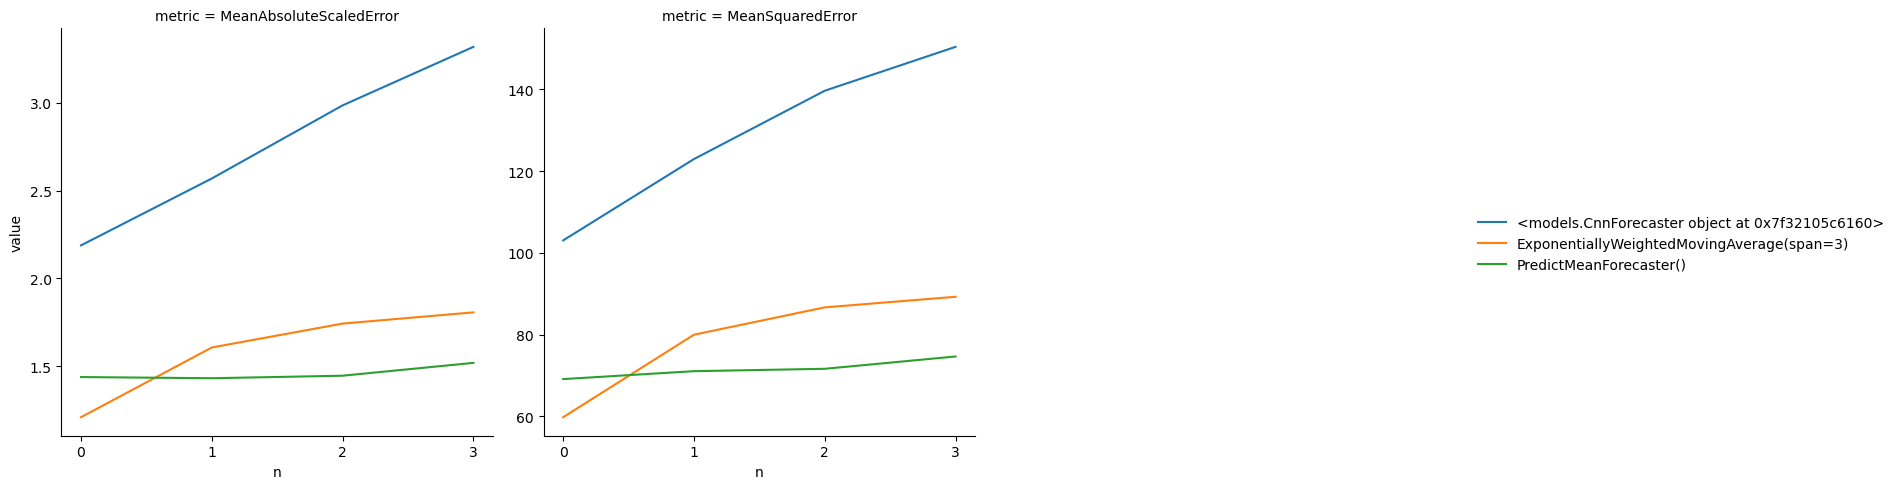

In [63]:
 metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))

Predictions Processed:   0%|          | 0/3 [00:00<?, ?it/s]

Predictions Processed:   0%|          | 0/12 [00:00<?, ?it/s]

,MeanAbsoluteScaledError,MeanSquaredError
<models.CnnForecaster object at 0x7f321920dee0>,2.692771,132.380248
PredictMeanForecaster(),1.459343,74.146892
ExponentiallyWeightedMovingAverage(span=3),1.591927,81.234780


MeanAbsoluteScaledError  \
model                                           n                            
<models.CnnForecaster object at 0x7f321920dee0> 0                 2.522212   
                                                1                 2.354849   
                                                2                 2.553031   
                                                3                 3.340993   
ExponentiallyWeightedMovingAverage(span=3)      0                 1.210449   
                                                1                 1.607165   
                                                2                 1.743103   
                                                3                 1.806993   
PredictMeanForecaster()                         0                 1.438947   
                                                1                 1.432186   
                                                2                 1.446583   
                                                3                 1.519656   

                                                   MeanSquaredError  
model                                           n                    
<models.CnnForecaster object at 0x7f321920dee0> 0        119.249551  
                                                1        113.855722  
                                                2        122.735625  
                                                3        153.200160  
ExponentiallyWeightedMovingAverage(span=3)      0         59.782868  
                                                1         79.974515  
                                                2         86.659919  
                                                3         89.252260  
PredictMeanForecaster()                         0         69.110252  
                                                1         71.046277  
                                                2         71.629932  
                                                3         74.645810

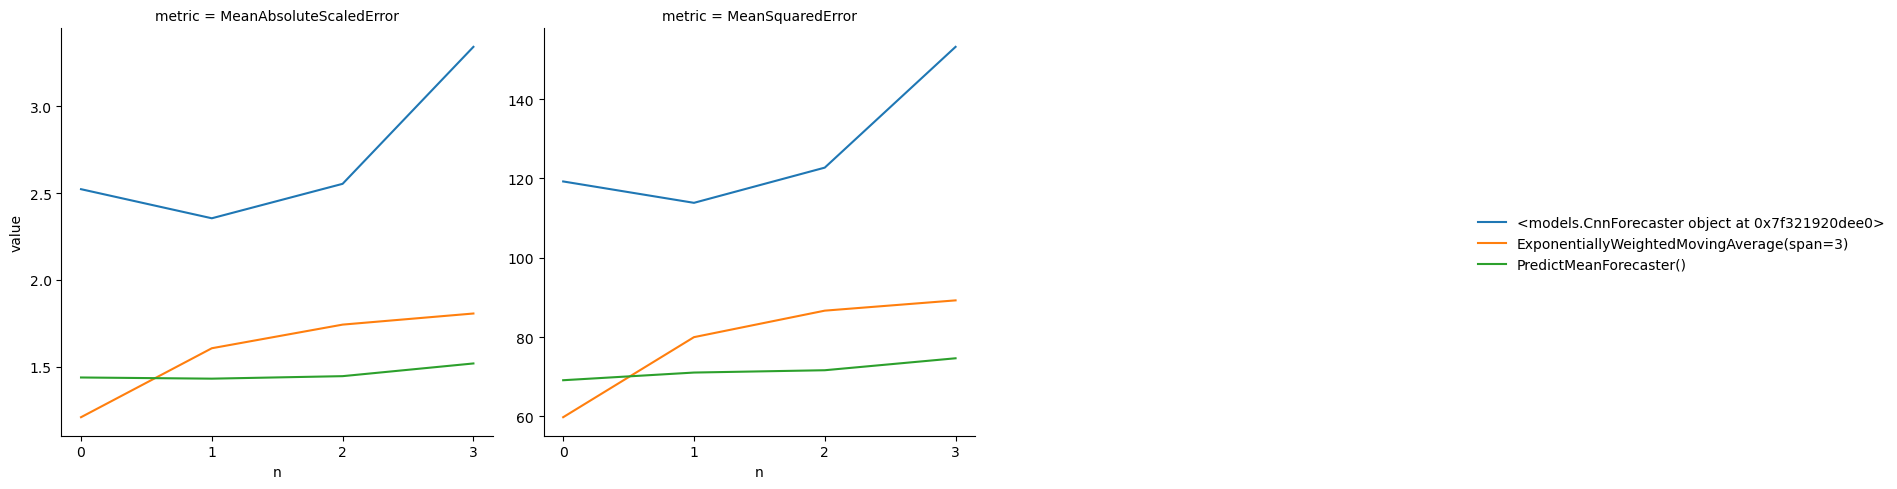

In [45]:
#epoch=40
#batch_size=20
#d_model=2048
metric_functions = [
    MeanAbsoluteScaledError(),
    MeanSquaredError(square_root=True),
]

metrics_df = atd2022.metrics.compute_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)

metrics_n = atd2022.metrics.compute_nstep_metrics(
    truth,
    predictions,
    metric_functions,
    models=models,
    train=truth,
    verbose=True,
)
display(metrics_df)
display(metrics_n)
display(atd2022.viz.plot_nstep_metrics(metrics_n))